In [1]:
import pandas as pd
import numpy as np

mypf = pd.read_csv('data/Nifty100Scrips.csv')

mypf = mypf[mypf['InScope'] == 1]

stock_n100 = mypf['Symbol'].unique()

exclude = ['CADILAHC','MMTC']

stock_n100 = mypf[~mypf['Symbol'].isin(exclude) ]['Symbol']

#stock_ids

stock_ids = stock_n100

In [2]:
# import necessary libraries 

%matplotlib inline
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import datetime
from tabulate import tabulate
import warnings
warnings.filterwarnings('ignore')
import pandas_datareader.data as web
import yfinance as yfin
import talib 
yfin.pdr_override()

In [3]:
def stock_prec_dev(stock_symbol):
    #stock_symbol = 'ULTRACEMCO.NS'
    start_date = (datetime.date.today() + datetime.timedelta(days=-365)).strftime('%Y-%m-%d')
    #end_date = '2020-01-01'
    end_date = (datetime.date.today() + datetime.timedelta(days=1)).strftime('%Y-%m-%d')
    short_window = 20 
    mid_window = 50
    long_window = 200
    moving_avg = 'EMA'


    # import the closing price data of the stock for the aforementioned period of time in Pandas dataframe
    start = datetime.datetime(*map(int, start_date.split('-')))
    end = datetime.datetime(*map(int, end_date.split('-'))) 
    stock_df = web.DataReader(stock_symbol,  data_source='yahoo', start = start, end = end)['Close']
    stock_df = pd.DataFrame(stock_df) # convert Series object to dataframe 
    stock_df.columns = {'Close Price'} # assign new colun name
    stock_df.dropna(axis = 0, inplace = True) # remove any null rows 

    # column names for long and short moving average columns
    short_window_col = str(short_window) + '_' + moving_avg
    mid_window_col = str(mid_window) + '_' + moving_avg
    long_window_col = str(long_window) + '_' + moving_avg  

    # Create short exponential moving average column
    stock_df[short_window_col] = round(stock_df['Close Price'].ewm(span = short_window, adjust = False).mean(),0)

    stock_df[mid_window_col] = round(stock_df['Close Price'].ewm(span = mid_window, adjust = False).mean(),0)     

    stock_df['RSI'] = talib.RSI(stock_df['Close Price'], timeperiod=14)

    # Create a long exponential moving average column
    stock_df[long_window_col] = round(stock_df['Close Price'].ewm(span = long_window, adjust = False).mean(),0)
    stock_df['Stock'] = stock_symbol
    stock_df['Dev%_200'] = round((stock_df['Close Price'] - stock_df['200_EMA'])*100/stock_df['200_EMA'],2)
    stock_df['Max'] = round(max(stock_df['Close Price']),0)
    stock_df['Min'] = round(min(stock_df['Close Price']),0)    
    #stock_df['Dev%_Max'] = round((stock_df['Close Price'] - stock_df['Max'])*100/stock_df['Max'],2)
    #stock_df['Dev%_Min'] = round((stock_df['Close Price'] - stock_df['Min'])*100/stock_df['Min'],2)
    stock_df['Premium%'] = round((stock_df['Close Price']-stock_df['Min'])*100/(stock_df['Max']-stock_df['Min']),2)
    stock_df['Discount%'] = round((stock_df['Max']-stock_df['Close Price'])*100/(stock_df['Max']-stock_df['Min']),2)
    stock_df['Close Price'] = round(stock_df['Close Price'],0) 
    
    
    return stock_df

df_prec_dev = pd.DataFrame()

#tmp = stock_prec_dev('ULTRACEMCO.NS')
#df_perform = df_perform.append(tmp)
for stock_id in stock_ids:
    stock_id = stock_id.upper() + '.NS'
    print(stock_id)
    tmp = stock_prec_dev(stock_id)
    tmp = tmp.reset_index()
    tmp = tmp.tail(1)
    tmp['Forecast'] = mypf[(mypf['Symbol']+'.NS') == stock_id.upper()]['Forecast'].values[0]
    df_prec_dev = df_prec_dev.append(tmp)

ASIANPAINT.NS
[*********************100%***********************]  1 of 1 completed
AXISBANK.NS
[*********************100%***********************]  1 of 1 completed
BAJFINANCE.NS
[*********************100%***********************]  1 of 1 completed
BERGEPAINT.NS
[*********************100%***********************]  1 of 1 completed
BHARTIARTL.NS
[*********************100%***********************]  1 of 1 completed
BRITANNIA.NS
[*********************100%***********************]  1 of 1 completed
CANBK.NS
[*********************100%***********************]  1 of 1 completed
CIPLA.NS
[*********************100%***********************]  1 of 1 completed
COLPAL.NS
[*********************100%***********************]  1 of 1 completed
DABUR.NS
[*********************100%***********************]  1 of 1 completed
DEEPAKNTR.NS
[*********************100%***********************]  1 of 1 completed
DIVISLAB.NS
[*********************100%***********************]  1 of 1 completed
DMART.NS
[*******************

In [4]:
stock_prec_dev('^NSEI').tail(1)

[*********************100%***********************]  1 of 1 completed


Close Price   20_EMA   50_EMA        RSI  200_EMA  Stock  \
Date                                                                   
2022-09-28      16859.0  17471.0  17314.0  33.406978  17086.0  ^NSEI   

            Dev%_200      Max      Min  Premium%  Discount%  
Date                                                         
2022-09-28     -1.33  18477.0  15294.0     49.15      50.85

In [5]:
df_prec_dev['Upside%'] = round((df_prec_dev['Forecast']-df_prec_dev['Close Price'])*100/(df_prec_dev['Close Price']),2)
df_prec_dev = df_prec_dev.sort_values(by = 'Upside%', ascending=False)
stock_ids = df_prec_dev['Stock'].values
df_prec_dev.reset_index(drop=True, inplace=True)
df_prec_dev.head(60)

Date  Close Price  20_EMA  50_EMA        RSI  200_EMA          Stock  \
0  2022-09-28        733.0   760.0   770.0  34.332676    818.0  MOTILALOFS.NS   
1  2022-09-28         67.0    75.0    78.0  27.698615     90.0  NATIONALUM.NS   
2  2022-09-28        514.0   550.0   556.0  29.708140    586.0    HDFCLIFE.NS   
3  2022-09-28        399.0   432.0   442.0  29.650623    436.0  TATAMOTORS.NS   
4  2022-09-28        716.0   766.0   749.0  34.354861    730.0    AXISBANK.NS   
5  2022-09-28         72.0    79.0    78.0  37.032294     96.0   IBREALEST.NS   
6  2022-09-28         95.0   104.0   104.0  31.256639    111.0   TATASTEEL.NS   
7  2022-09-28        210.0   235.0   231.0  29.615332    217.0       CANBK.NS   
8  2022-09-28       2244.0  2388.0  2375.0  31.846564   2404.0        HDFC.NS   
9  2022-09-28       1390.0  1469.0  1455.0  31.463307   1451.0    HDFCBANK.NS   
10 2022-09-28       1395.0  1431.0  1474.0  39.164424   1578.0        INFY.NS   
11 2022-09-28       3879.0  4074.0  4127.0  39.014763   4512.0      NAUKRI.NS   
12 2022-09-28       2332.0  2497.0  2532.0  26.920387   2532.0    RELIANCE.NS   
13 2022-09-28        533.0   560.0   559.0  30.445392    555.0  ICICIPRULI.NS   
14 2022-09-28       6173.0  6437.0  6418.0  35.982260   6538.0  ULTRACEMCO.NS   
15 2022-09-28       1049.0  1030.0  1049.0  52.716321   1190.0  MUTHOOTFIN.NS   
16 2022-09-28        525.0   548.0   532.0  39.097516    501.0        SBIN.NS   
17 2022-09-28       1239.0  1282.0  1259.0  39.279529   1191.0     SBILIFE.NS   
18 2022-09-28        921.0   921.0   939.0  48.143179   1044.0     HCLTECH.NS   
19 2022-09-28       1030.0  1058.0  1066.0  42.311957   1211.0       TECHM.NS   
20 2022-09-28        850.0   883.0   855.0  38.689524    783.0   ICICIBANK.NS   
21 2022-09-28        398.0   406.0   417.0  38.938371    492.0       WIPRO.NS   
22 2022-09-28       2077.0  2095.0  2034.0  49.802928   2085.0   DEEPAKNTR.NS   
23 2022-09-28        257.0   262.0   255.0  47.499014    262.0        ZEEL.NS   
24 2022-09-28        761.0   763.0   739.0  52.523798    712.0  BHARTIARTL.NS   
25 2022-09-28       2591.0  2758.0  2771.0  29.851194   2690.0  HEROMOTOCO.NS   
26 2022-09-28        918.0   897.0   890.0  58.681677    868.0   SUNPHARMA.NS   
27 2022-09-28       3036.0  3089.0  3172.0  39.903045   3392.0         TCS.NS   
28 2022-09-28       1793.0  1880.0  1862.0  33.268246   1851.0   KOTAKBANK.NS   
29 2022-09-28       1820.0  1894.0  1895.0  35.567168   1891.0      INDIGO.NS   
30 2022-09-28       4270.0  4195.0  4224.0  56.129511   4334.0     DRREDDY.NS   
31 2022-09-28       1242.0  1275.0  1238.0  43.144420   1049.0         M&M.NS   
32 2022-09-28       3703.0  3640.0  3677.0  57.098130   4017.0    DIVISLAB.NS   
33 2022-09-28       1835.0  1894.0  1851.0  38.962693   1773.0          LT.NS   
34 2022-09-28        564.0   566.0   563.0  48.581313    559.0       DABUR.NS   
35 2022-09-28        112.0   117.0   113.0  41.244243    100.0  FEDERALBNK.NS   
36 2022-09-28       1141.0  1160.0  1090.0  49.652928   1002.0  INDUSINDBK.NS   
37 2022-09-28        794.0   805.0   798.0  45.698314    779.0  TATACONSUM.NS   
38 2022-09-28        325.0   331.0   318.0  46.892966    279.0         ITC.NS   
39 2022-09-28        214.0   230.0   231.0  32.193634    224.0   TATAPOWER.NS   
40 2022-09-28       8727.0  9005.0  8842.0  40.864857   8244.0      MARUTI.NS   
41 2022-09-28       7202.0  7340.0  7071.0  47.016542   6831.0  BAJFINANCE.NS   
42 2022-09-28       3192.0  3219.0  3236.0  46.973948   3527.0    MINDTREE.NS   
43 2022-09-28        885.0   904.0   887.0  44.844311    865.0    GODREJCP.NS   
44 2022-09-28       2577.0  2619.0  2511.0  47.972954   2373.0       TITAN.NS   
45 2022-09-28        603.0   612.0   595.0  47.828690    608.0    JUBLFOOD.NS   
46 2022-09-28        849.0   843.0   824.0  54.694424    830.0  MCDOWELL-N.NS   
47 2022-09-28        629.0   643.0   643.0  39.104634    672.0  BERGEPAINT.NS   
48 2022-09-28       2702.0  2625.0  2574

In [6]:
def MovingAverageCrossStrategy(stock_symbol = 'ULTRACEMCO.NS', start_date = '2018-01-01', end_date = '2020-01-01', 
                               short_window = 20, mid_window = 50, long_window = 200, moving_avg = 'SMA', display_table = True):
    '''
    The function takes the stock symbol, time-duration of analysis, 
    look-back periods and the moving-average type(SMA or EMA) as input 
    and returns the respective MA Crossover chart along with the buy/sell signals for the given period.
    '''
    # stock_symbol - (str)stock ticker as on Yahoo finance. Eg: 'ULTRACEMCO.NS' 
    # start_date - (str)start analysis from this date (format: 'YYYY-MM-DD') Eg: '2018-01-01'
    # end_date - (str)end analysis on this date (format: 'YYYY-MM-DD') Eg: '2020-01-01'
    # short_window - (int)lookback period for short-term moving average. Eg: 5, 10, 20 
    # long_window - (int)lookback period for long-term moving average. Eg: 50, 100, 200
    # moving_avg - (str)the type of moving average to use ('SMA' or 'EMA')
    # display_table - (bool)whether to display the date and price table at buy/sell positions(True/False)

    # import the closing price data of the stock for the aforementioned period of time in Pandas dataframe
    start = datetime.datetime(*map(int, start_date.split('-')))
    end = datetime.datetime(*map(int, end_date.split('-'))) 
    stock_df = web.DataReader(stock_symbol,  data_source='yahoo', start = start, end = end)['Close']
    stock_df = pd.DataFrame(stock_df) # convert Series object to dataframe 
    stock_df.columns = {'Close Price'} # assign new colun name
    stock_df.dropna(axis = 0, inplace = True) # remove any null rows 
                        
    # column names for long and short moving average columns
    short_window_col = str(short_window) + '_' + moving_avg
    mid_window_col = str(mid_window) + '_' + moving_avg
    long_window_col = str(long_window) + '_' + moving_avg  
  
    if moving_avg == 'SMA':
        # Create a short simple moving average column
        stock_df[short_window_col] = stock_df['Close Price'].rolling(window = short_window, min_periods = 1).mean()
        
        stock_df[mid_window_col] = stock_df['Close Price'].rolling(window = mid_window, min_periods = 1).mean()

        # Create a long simple moving average column
        stock_df[long_window_col] = stock_df['Close Price'].rolling(window = long_window, min_periods = 1).mean()

    elif moving_avg == 'EMA':
        # Create short exponential moving average column
        stock_df[short_window_col] = stock_df['Close Price'].ewm(span = short_window, adjust = False).mean()
        
        stock_df[mid_window_col] = stock_df['Close Price'].ewm(span = mid_window, adjust = False).mean()

        # Create a long exponential moving average column
        stock_df[long_window_col] = stock_df['Close Price'].ewm(span = long_window, adjust = False).mean()

    # create a new column 'Signal' such that if faster moving average is greater than slower moving average 
    # then set Signal as 1 else 0.
    stock_df['Signal'] = 0.0  
    stock_df['Signal'] = np.where((stock_df[long_window_col] > stock_df[mid_window_col])
                                , 1.0, stock_df['Signal']) 
    
    stock_df['Signal'] = np.where( (stock_df[long_window_col] < stock_df[mid_window_col])
                                  , -1.0, stock_df['Signal']) 

    # create a new column 'Position' which is a day-to-day difference of the 'Signal' column. 
    stock_df['Position'] = stock_df['Signal'].diff()

    # plot close price, short-term and long-term moving averages
    plt.figure(figsize = (20,10))
    plt.tick_params(axis = 'both', labelsize = 14)
    stock_df['Close Price'].plot(color = 'k', lw = 1, label = 'Close Price')  
    stock_df[short_window_col].plot(color = 'g', lw = 1, label = short_window_col)
    stock_df[mid_window_col].plot(color = 'm', lw = 1, label = mid_window_col)
    stock_df[long_window_col].plot(color = 'b', lw = 1, label = long_window_col) 
    
    # plot 'buy' signals
    plt.plot(stock_df[stock_df['Position'] >= 1].index, 
            stock_df['Close Price'][stock_df['Position'] >= 1], 
            '^', markersize = 15, color = 'g', alpha = 0.7, label = 'buy')

    # plot 'sell' signals
    plt.plot(stock_df[stock_df['Position'] <= -1].index, 
            stock_df['Close Price'][stock_df['Position'] <= -1], 
            'v', markersize = 15, color = 'r', alpha = 0.7, label = 'sell')
    
    plt.ylabel('Price in ₹', fontsize = 16 )
    plt.xlabel('Date', fontsize = 16 )
    plt.title(str(stock_symbol) + ' - ' + str(moving_avg) + ' Crossover', fontsize = 20)
    plt.legend()
    plt.grid()
    plt.show()
    
    if display_table == True:
        print(stock_symbol)
        df_pos = stock_df[(stock_df['Position'] >= 1) | (stock_df['Position'] <= -1)]
        df_pos['Position'] = df_pos['Position'].apply(lambda x: 'Buy' if x >= 1 else 'Sell')
        df_pos = df_pos[df_pos['Signal'] != 0]
        df_pos['Prev_Signal'] = df_pos['Signal'].shift(1)
        df_pos = df_pos[df_pos['Signal'] != df_pos['Prev_Signal']]
        df_pos.drop('Prev_Signal', axis=1, inplace=True)
        print(tabulate(df_pos, headers = 'keys', tablefmt = 'psql'))
        
def plot_buy_sell(stock_id, start_date, table):
    
    #start_date = '2011-01-01'
    #end_date = '2020-03-01'
    end_date = (datetime.date.today() + datetime.timedelta(days=1)).strftime('%Y-%m-%d')
    strategy = 'EMA'
    short_window = 20
    mid_window = 50
    long_window = 200
    MovingAverageCrossStrategy(stock_id, start_date, end_date, short_window, mid_window, long_window, strategy, display_table = table)
 

In [7]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

[*********************100%***********************]  1 of 1 completed


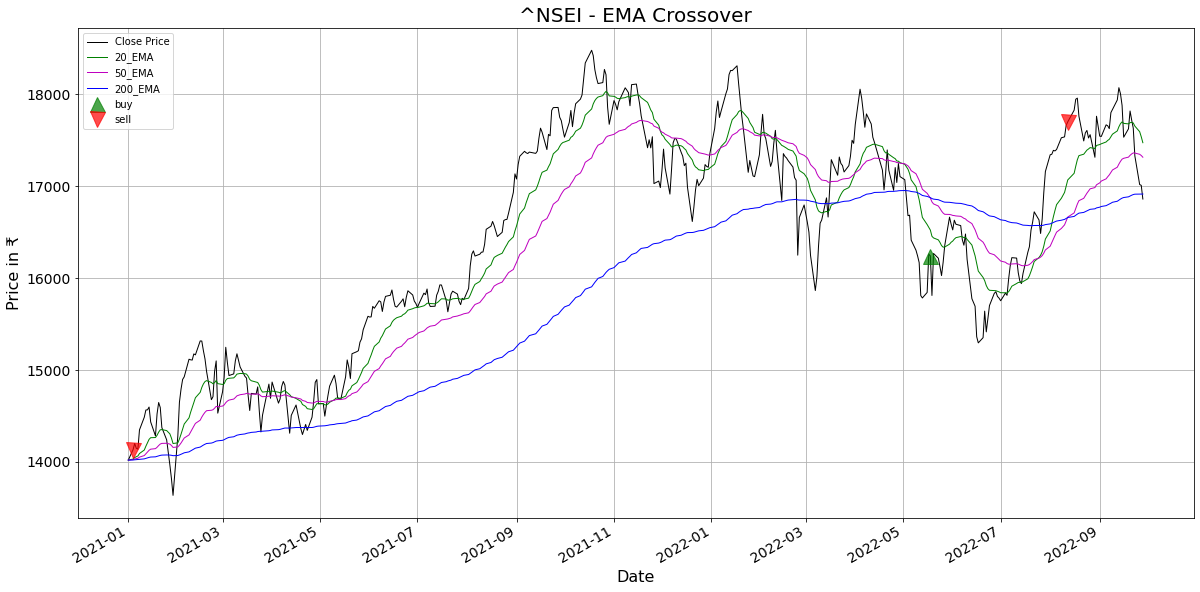

^NSEI
+---------------------+---------------+----------+----------+-----------+----------+------------+
| Date                |   Close Price |   20_EMA |   50_EMA |   200_EMA |   Signal | Position   |
|---------------------+---------------+----------+----------+-----------+----------+------------|
| 2021-01-04 00:00:00 |       14132.9 |  14029.4 |  14023   |   14019.6 |       -1 | Sell       |
| 2022-05-18 00:00:00 |       16240.3 |  16520.8 |  16869.1 |   16874.2 |        1 | Buy        |
| 2022-08-12 00:00:00 |       17698.2 |  17066.3 |  16662.3 |   16657.6 |       -1 | Sell       |
+---------------------+---------------+----------+----------+-----------+----------+------------+


In [8]:
plot_buy_sell('^NSEI', '2021-01-01', True)

[*********************100%***********************]  1 of 1 completed


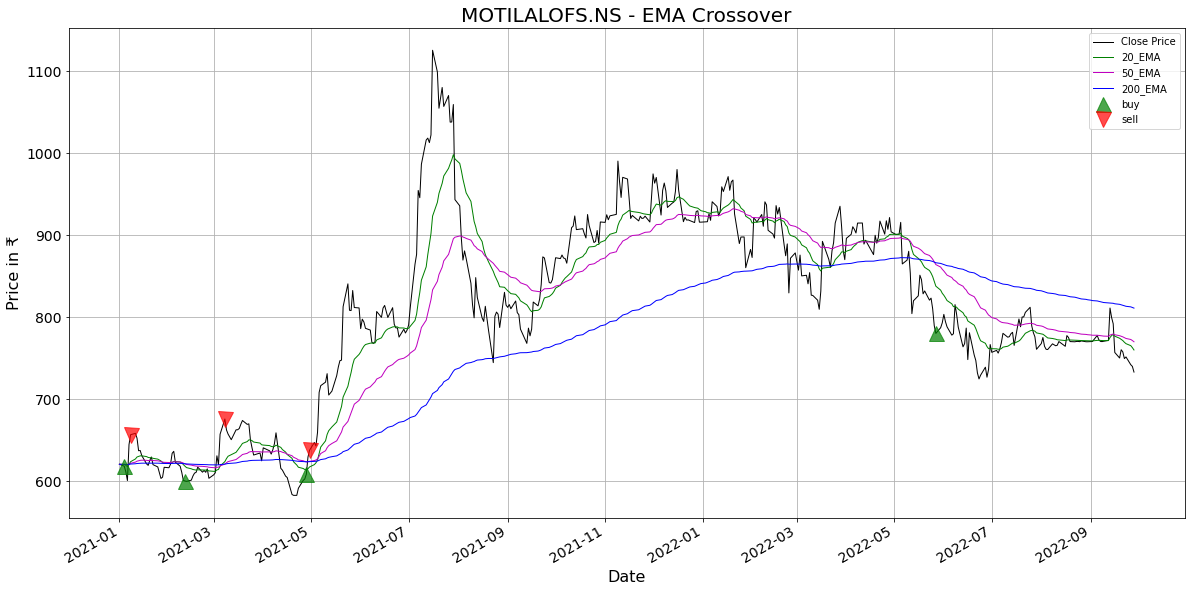

MOTILALOFS.NS
+---------------------+---------------+----------+----------+-----------+----------+------------+
| Date                |   Close Price |   20_EMA |   50_EMA |   200_EMA |   Signal | Position   |
|---------------------+---------------+----------+----------+-----------+----------+------------|
| 2021-01-04 00:00:00 |        618.3  |  620.336 |  620.462 |   620.528 |        1 | Buy        |
| 2021-01-08 00:00:00 |        656.65 |  623.731 |  621.763 |   620.844 |       -1 | Sell       |
| 2021-02-11 00:00:00 |        600.25 |  618.282 |  621.168 |   621.205 |        1 | Buy        |
| 2021-03-08 00:00:00 |        675.75 |  623.843 |  620.83  |   620.757 |       -1 | Sell       |
| 2021-04-28 00:00:00 |        608.5  |  613.681 |  623.424 |   623.602 |        1 | Buy        |
| 2021-04-30 00:00:00 |        637.7  |  617.314 |  624.205 |   623.799 |       -1 | Sell       |
| 2022-05-27 00:00:00 |        780.05 |  837.604 |  863.915 |   866.149 |        1 | Buy        |
+-----

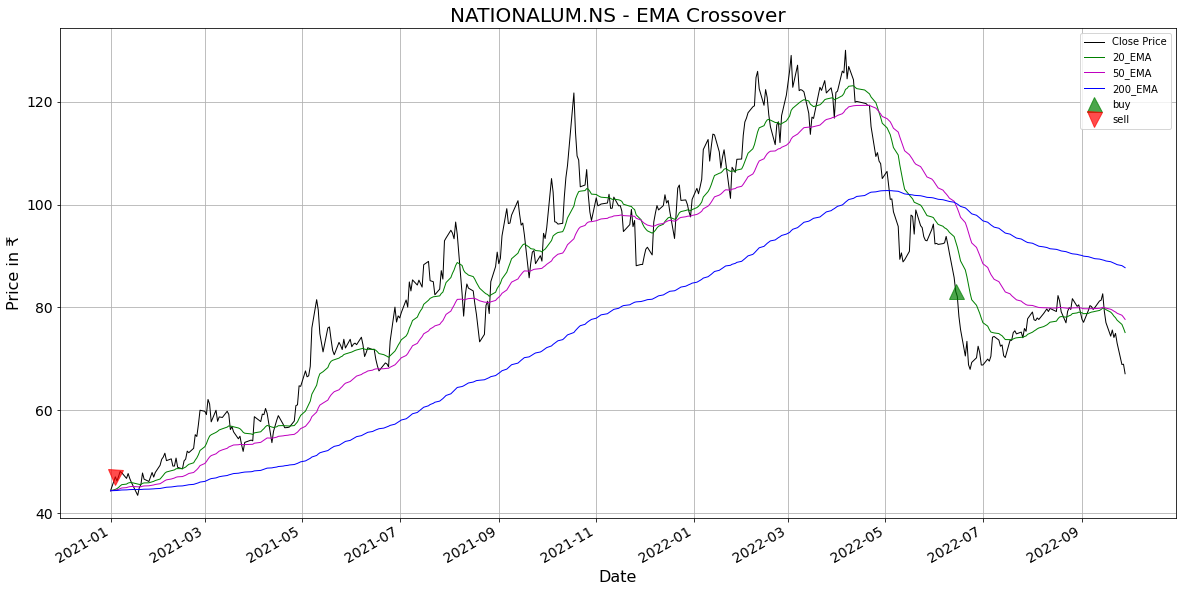

NATIONALUM.NS
+---------------------+---------------+----------+----------+-----------+----------+------------+
| Date                |   Close Price |   20_EMA |   50_EMA |   200_EMA |   Signal | Position   |
|---------------------+---------------+----------+----------+-----------+----------+------------|
| 2021-01-04 00:00:00 |         47.05 |  44.6071 |  44.4559 |   44.3769 |       -1 | Sell       |
| 2022-06-14 00:00:00 |         83.1  |  92.7496 |  99.9568 |  100.279  |        1 | Buy        |
+---------------------+---------------+----------+----------+-----------+----------+------------+
[*********************100%***********************]  1 of 1 completed


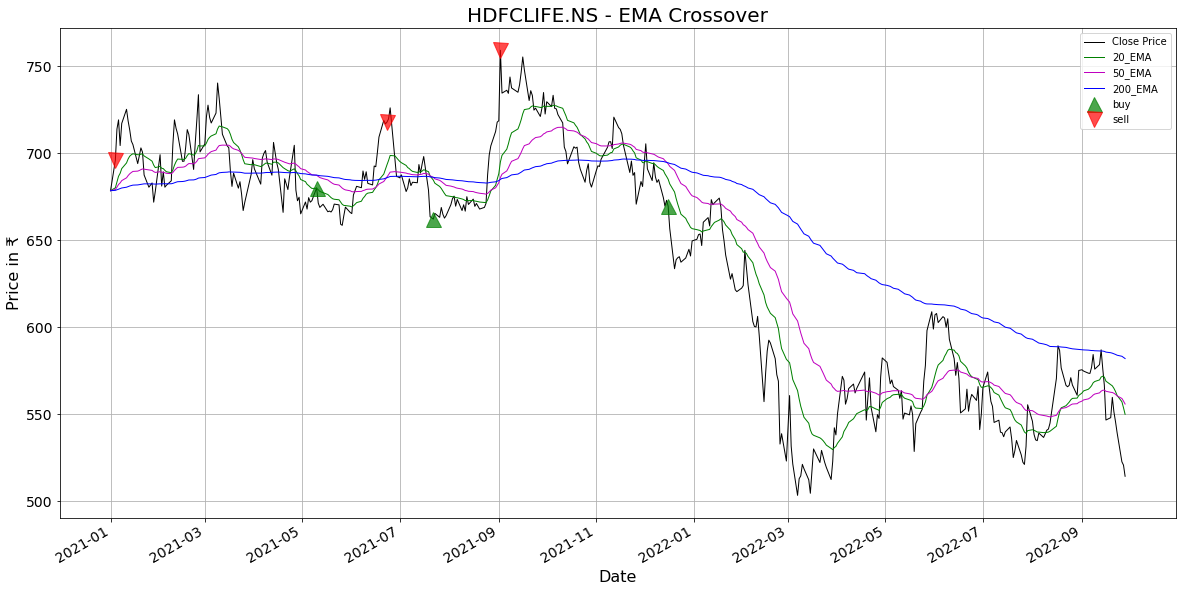

HDFCLIFE.NS
+---------------------+---------------+----------+----------+-----------+----------+------------+
| Date                |   Close Price |   20_EMA |   50_EMA |   200_EMA |   Signal | Position   |
|---------------------+---------------+----------+----------+-----------+----------+------------|
| 2021-01-04 00:00:00 |        695.85 |  680.062 |  679.084 |   678.574 |       -1 | Sell       |
| 2021-05-10 00:00:00 |        680.05 |  679.729 |  687.237 |   687.337 |        1 | Buy        |
| 2021-06-23 00:00:00 |        717.75 |  693.223 |  686.245 |   685.829 |       -1 | Sell       |
| 2021-07-22 00:00:00 |        662.1  |  684.493 |  686.003 |   686.095 |        1 | Buy        |
| 2021-09-02 00:00:00 |        759    |  694.895 |  685.952 |   684.916 |       -1 | Sell       |
| 2021-12-16 00:00:00 |        669.5  |  684.967 |  693.79  |   694.419 |        1 | Buy        |
+---------------------+---------------+----------+----------+-----------+----------+------------+
[*******

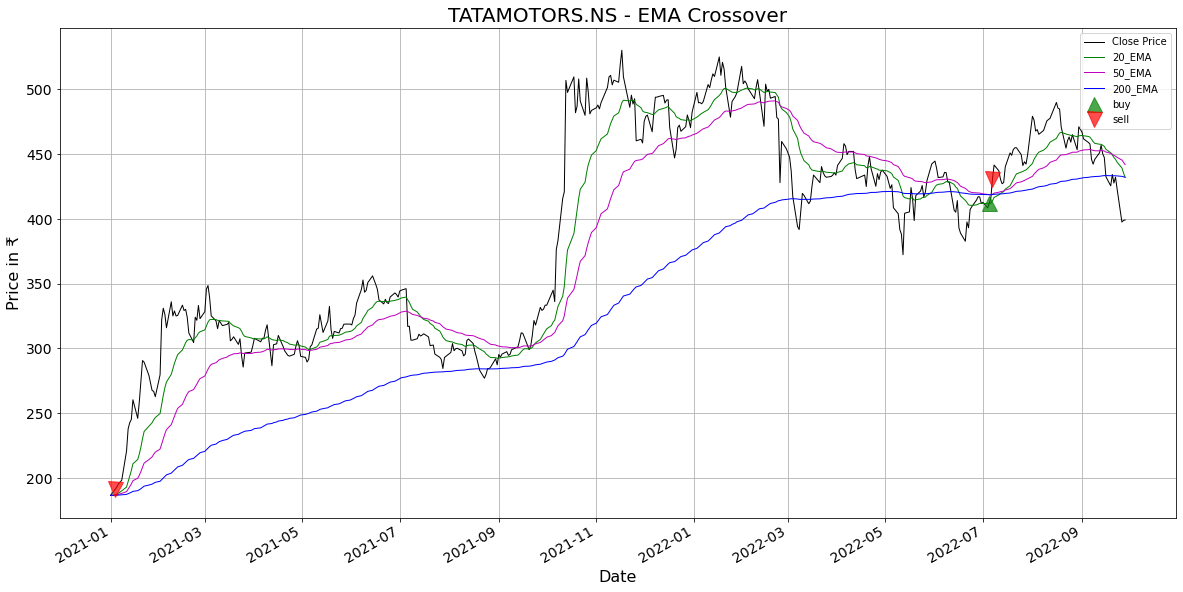

TATAMOTORS.NS
+---------------------+---------------+----------+----------+-----------+----------+------------+
| Date                |   Close Price |   20_EMA |   50_EMA |   200_EMA |   Signal | Position   |
|---------------------+---------------+----------+----------+-----------+----------+------------|
| 2021-01-04 00:00:00 |        191.3  |  186.957 |  186.688 |   186.548 |       -1 | Sell       |
| 2022-07-05 00:00:00 |        412    |  411.662 |  418.602 |   418.626 |        1 | Buy        |
| 2022-07-07 00:00:00 |        430.85 |  413.893 |  418.998 |   418.726 |       -1 | Sell       |
+---------------------+---------------+----------+----------+-----------+----------+------------+
[*********************100%***********************]  1 of 1 completed


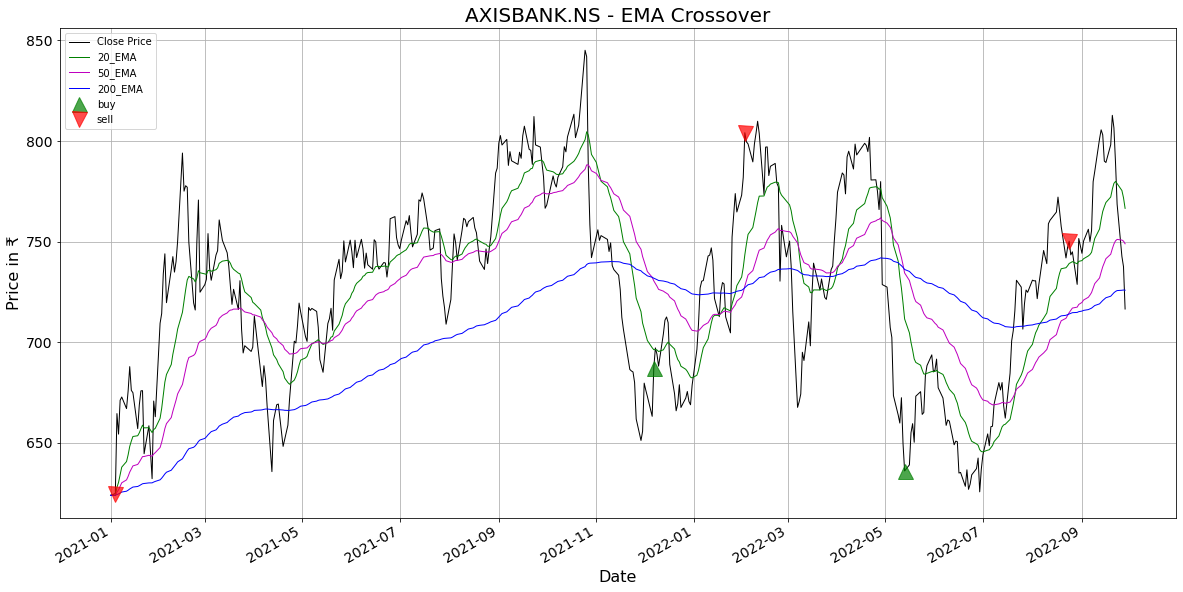

AXISBANK.NS
+---------------------+---------------+----------+----------+-----------+----------+------------+
| Date                |   Close Price |   20_EMA |   50_EMA |   200_EMA |   Signal | Position   |
|---------------------+---------------+----------+----------+-----------+----------+------------|
| 2021-01-04 00:00:00 |        624.7  |  623.886 |  623.835 |   623.809 |       -1 | Sell       |
| 2021-12-07 00:00:00 |        687    |  696.223 |  730.463 |   731.779 |        1 | Buy        |
| 2022-02-02 00:00:00 |        804.1  |  743.464 |  727.874 |   727.089 |       -1 | Sell       |
| 2022-05-13 00:00:00 |        635.95 |  711.513 |  734.377 |   736.107 |        1 | Buy        |
| 2022-08-24 00:00:00 |        750.15 |  739.103 |  714.656 |   714.026 |       -1 | Sell       |
+---------------------+---------------+----------+----------+-----------+----------+------------+
[*********************100%***********************]  1 of 1 completed


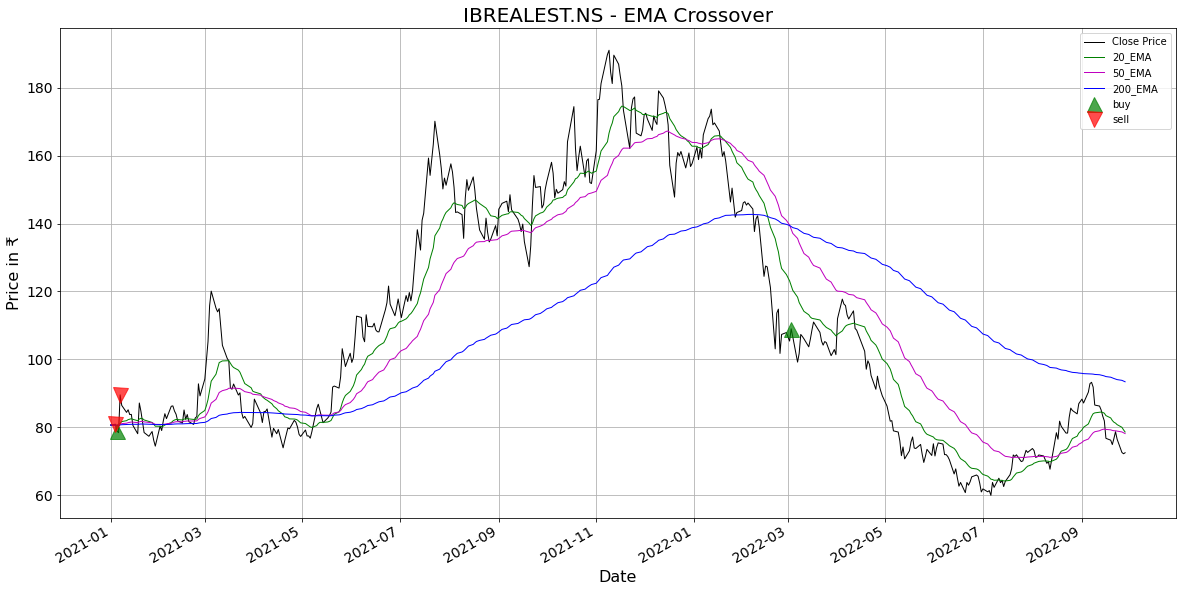

IBREALEST.NS
+---------------------+---------------+----------+----------+-----------+----------+------------+
| Date                |   Close Price |   20_EMA |   50_EMA |   200_EMA |   Signal | Position   |
|---------------------+---------------+----------+----------+-----------+----------+------------|
| 2021-01-04 00:00:00 |         80.9  |  80.6738 |  80.6598 |   80.6525 |       -1 | Sell       |
| 2021-01-05 00:00:00 |         78.9  |  80.5049 |  80.5908 |   80.6351 |        1 | Buy        |
| 2021-01-07 00:00:00 |         89.55 |  81.1849 |  80.8596 |   80.7017 |       -1 | Sell       |
| 2022-03-03 00:00:00 |        109    | 121.786  | 138.363  |  139.138  |        1 | Buy        |
+---------------------+---------------+----------+----------+-----------+----------+------------+
[*********************100%***********************]  1 of 1 completed


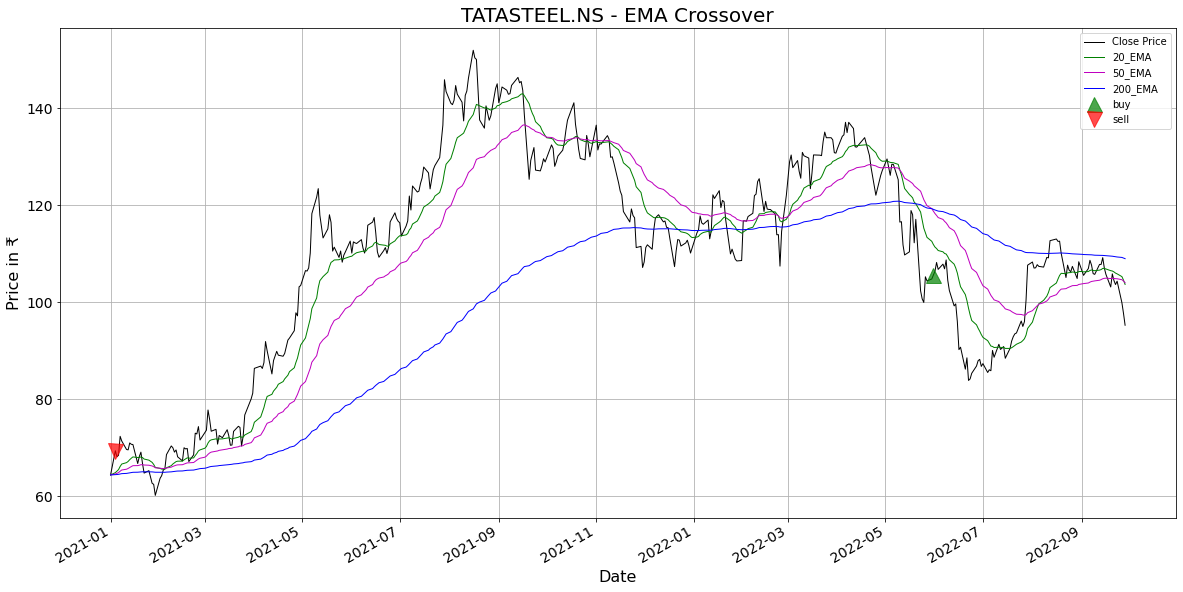

TATASTEEL.NS
+---------------------+---------------+----------+----------+-----------+----------+------------+
| Date                |   Close Price |   20_EMA |   50_EMA |   200_EMA |   Signal | Position   |
|---------------------+---------------+----------+----------+-----------+----------+------------|
| 2021-01-04 00:00:00 |        69.3   |  64.7852 |  64.5057 |   64.3596 |       -1 | Sell       |
| 2022-05-31 00:00:00 |       105.565 | 111.858  | 118.737  |  119.114  |        1 | Buy        |
+---------------------+---------------+----------+----------+-----------+----------+------------+
[*********************100%***********************]  1 of 1 completed


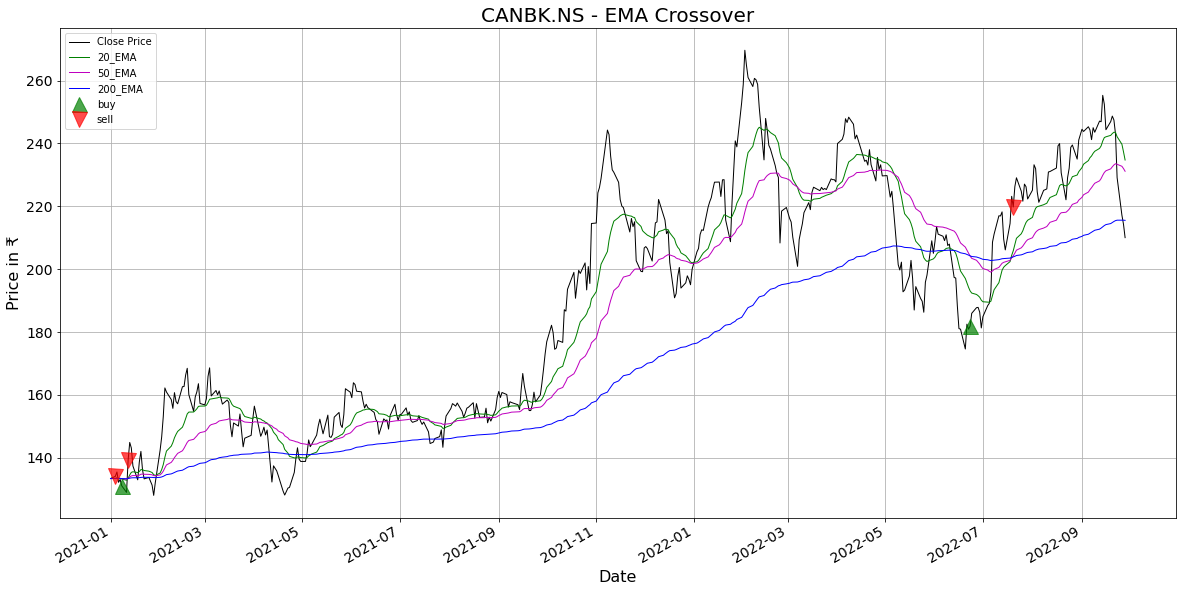

CANBK.NS
+---------------------+---------------+----------+----------+-----------+----------+------------+
| Date                |   Close Price |   20_EMA |   50_EMA |   200_EMA |   Signal | Position   |
|---------------------+---------------+----------+----------+-----------+----------+------------|
| 2021-01-04 00:00:00 |        134    |  133.367 |  133.327 |   133.307 |       -1 | Sell       |
| 2021-01-08 00:00:00 |        131    |  133.154 |  133.251 |   133.289 |        1 | Buy        |
| 2021-01-12 00:00:00 |        139.15 |  133.359 |  133.319 |   133.305 |       -1 | Sell       |
| 2022-06-23 00:00:00 |        181.85 |  193.031 |  204.121 |   204.18  |        1 | Buy        |
| 2022-07-20 00:00:00 |        219.75 |  205.819 |  204.205 |   203.839 |       -1 | Sell       |
+---------------------+---------------+----------+----------+-----------+----------+------------+
[*********************100%***********************]  1 of 1 completed


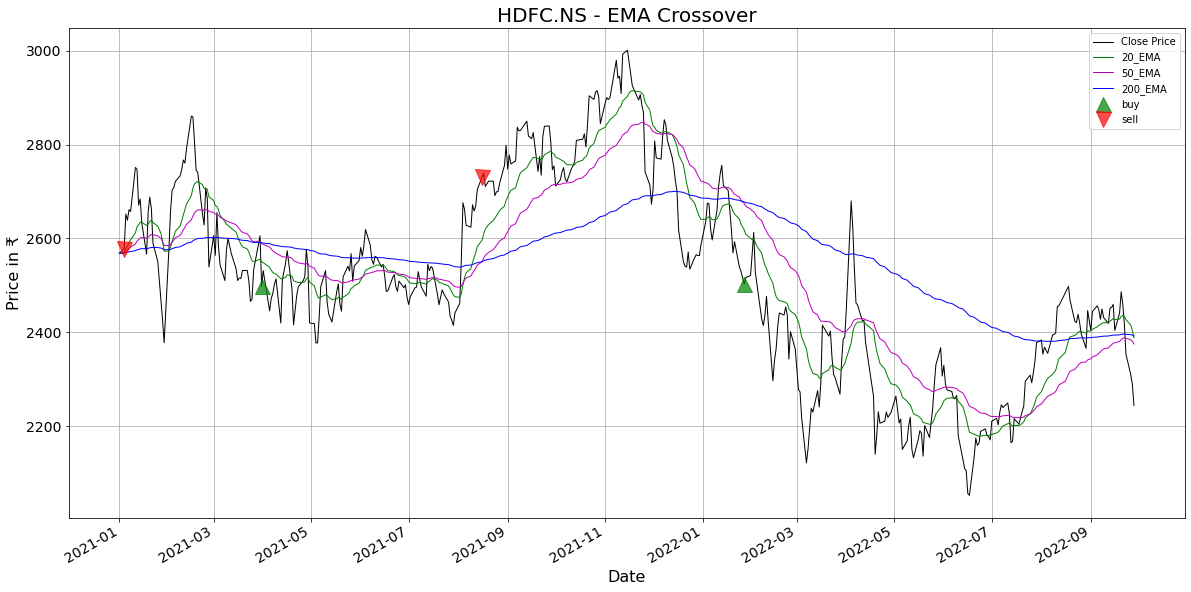

HDFC.NS
+---------------------+---------------+----------+----------+-----------+----------+------------+
| Date                |   Close Price |   20_EMA |   50_EMA |   200_EMA |   Signal | Position   |
|---------------------+---------------+----------+----------+-----------+----------+------------|
| 2021-01-04 00:00:00 |       2578.5  |  2569.68 |  2569.13 |   2568.85 |       -1 | Sell       |
| 2021-03-31 00:00:00 |       2498.1  |  2550.31 |  2589.6  |   2590.68 |        1 | Buy        |
| 2021-08-16 00:00:00 |       2731.15 |  2596.69 |  2550.59 |   2550.35 |       -1 | Sell       |
| 2022-01-27 00:00:00 |       2503.35 |  2618.59 |  2674.84 |   2677.97 |        1 | Buy        |
+---------------------+---------------+----------+----------+-----------+----------+------------+
[*********************100%***********************]  1 of 1 completed


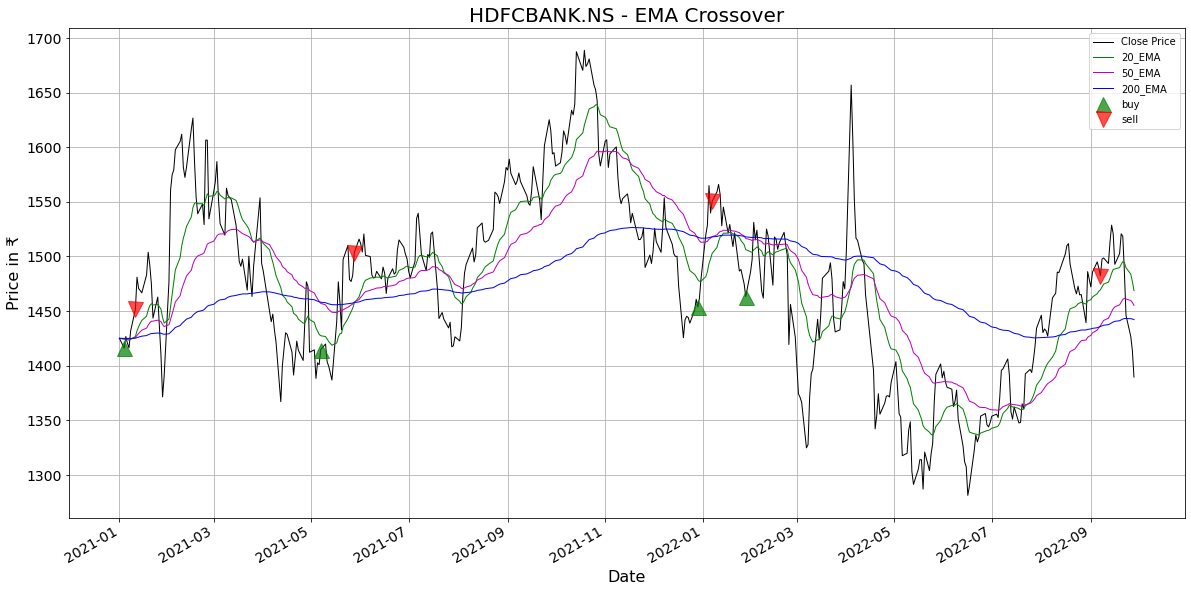

HDFCBANK.NS
+---------------------+---------------+----------+----------+-----------+----------+------------+
| Date                |   Close Price |   20_EMA |   50_EMA |   200_EMA |   Signal | Position   |
|---------------------+---------------+----------+----------+-----------+----------+------------|
| 2021-01-04 00:00:00 |       1416    |  1424.19 |  1424.7  |   1424.96 |        1 | Buy        |
| 2021-01-11 00:00:00 |       1451.45 |  1426.71 |  1425.62 |   1425.18 |       -1 | Sell       |
| 2021-05-07 00:00:00 |       1414.75 |  1427.39 |  1457.06 |   1458.05 |        1 | Buy        |
| 2021-05-28 00:00:00 |       1503.45 |  1457.37 |  1458.31 |   1457.8  |       -1 | Sell       |
| 2021-12-29 00:00:00 |       1453.85 |  1478.81 |  1516.46 |   1517.63 |        1 | Buy        |
| 2022-01-07 00:00:00 |       1550.55 |  1502.85 |  1518.07 |   1517.87 |       -1 | Sell       |
| 2022-01-28 00:00:00 |       1463.25 |  1506.28 |  1516.48 |   1517.88 |        1 | Buy        |
| 2022-0

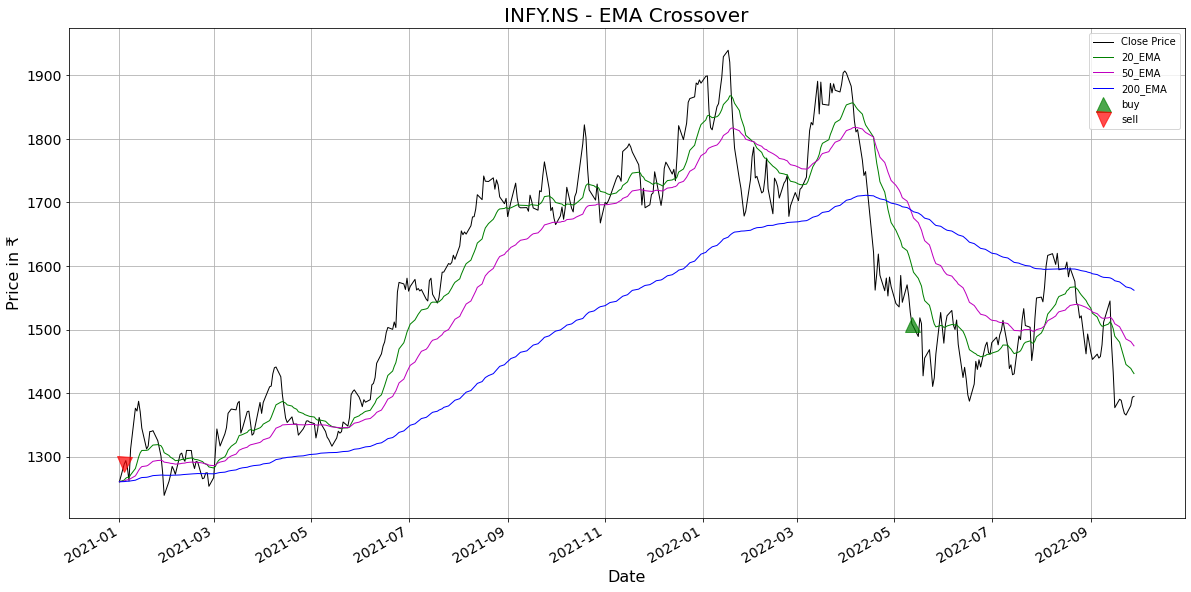

INFY.NS
+---------------------+---------------+----------+----------+-----------+----------+------------+
| Date                |   Close Price |   20_EMA |   50_EMA |   200_EMA |   Signal | Position   |
|---------------------+---------------+----------+----------+-----------+----------+------------|
| 2021-01-04 00:00:00 |       1288.25 |  1263.1  |  1261.54 |   1260.73 |       -1 | Sell       |
| 2022-05-12 00:00:00 |       1508.8  |  1599.26 |  1682.52 |   1687.16 |        1 | Buy        |
+---------------------+---------------+----------+----------+-----------+----------+------------+
[*********************100%***********************]  1 of 1 completed


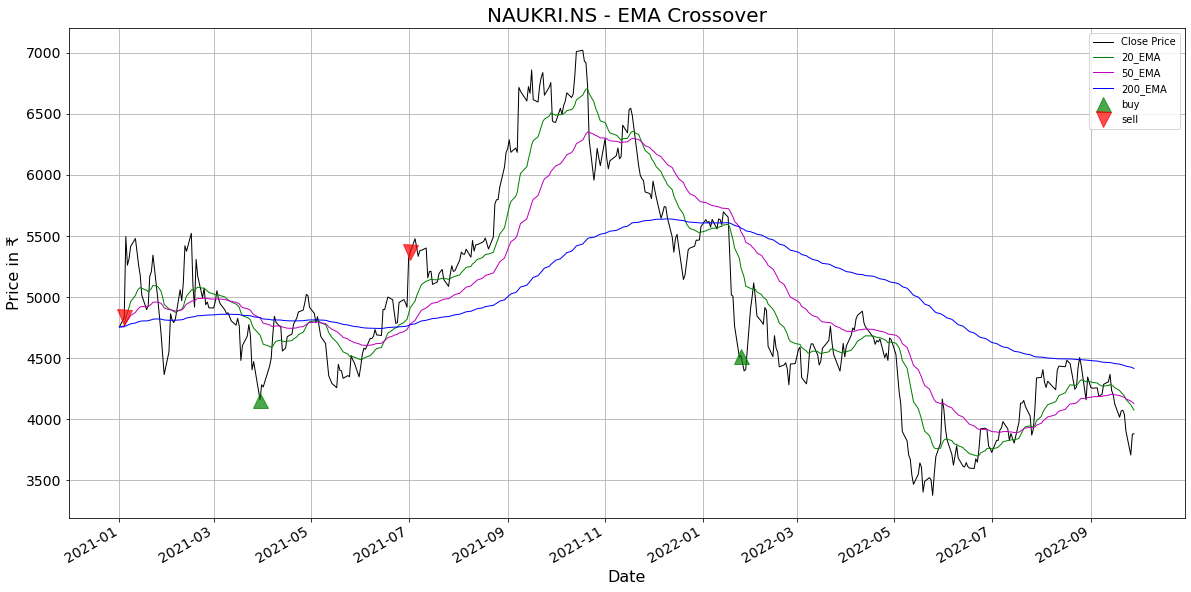

NAUKRI.NS
+---------------------+---------------+----------+----------+-----------+----------+------------+
| Date                |   Close Price |   20_EMA |   50_EMA |   200_EMA |   Signal | Position   |
|---------------------+---------------+----------+----------+-----------+----------+------------|
| 2021-01-04 00:00:00 |       4832.65 |  4762.12 |  4757.76 |   4755.48 |       -1 | Sell       |
| 2021-03-30 00:00:00 |       4158.45 |  4688.35 |  4827.8  |   4830.52 |        1 | Buy        |
| 2021-07-02 00:00:00 |       5365.1  |  4911.44 |  4779.04 |   4772.61 |       -1 | Sell       |
| 2022-01-25 00:00:00 |       4518.6  |  5240.87 |  5534.63 |   5563.69 |        1 | Buy        |
+---------------------+---------------+----------+----------+-----------+----------+------------+
[*********************100%***********************]  1 of 1 completed


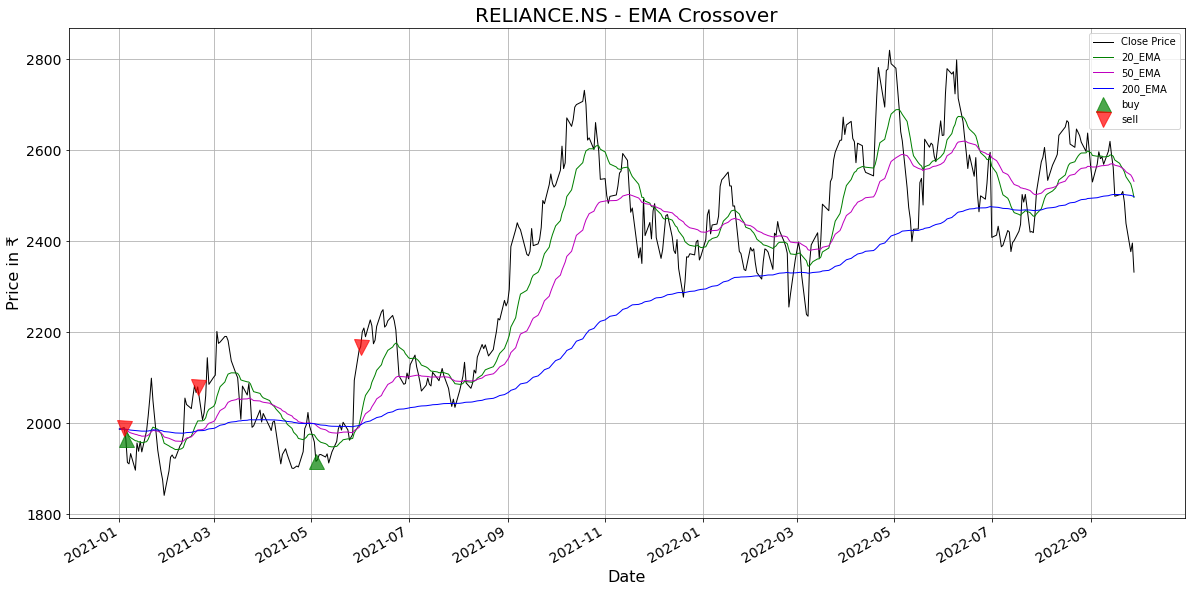

RELIANCE.NS
+---------------------+---------------+----------+----------+-----------+----------+------------+
| Date                |   Close Price |   20_EMA |   50_EMA |   200_EMA |   Signal | Position   |
|---------------------+---------------+----------+----------+-----------+----------+------------|
| 2021-01-04 00:00:00 |       1990.85 |  1987.82 |  1987.63 |   1987.53 |       -1 | Sell       |
| 2021-01-05 00:00:00 |       1966.1  |  1985.75 |  1986.79 |   1987.32 |        1 | Buy        |
| 2021-02-19 00:00:00 |       2080.3  |  2005.46 |  1985.6  |   1984.02 |       -1 | Sell       |
| 2021-05-04 00:00:00 |       1916.6  |  1969.36 |  1996.27 |   1998.61 |        1 | Buy        |
| 2021-06-01 00:00:00 |       2168.9  |  2013    |  1998.21 |   1997.09 |       -1 | Sell       |
+---------------------+---------------+----------+----------+-----------+----------+------------+
[*********************100%***********************]  1 of 1 completed


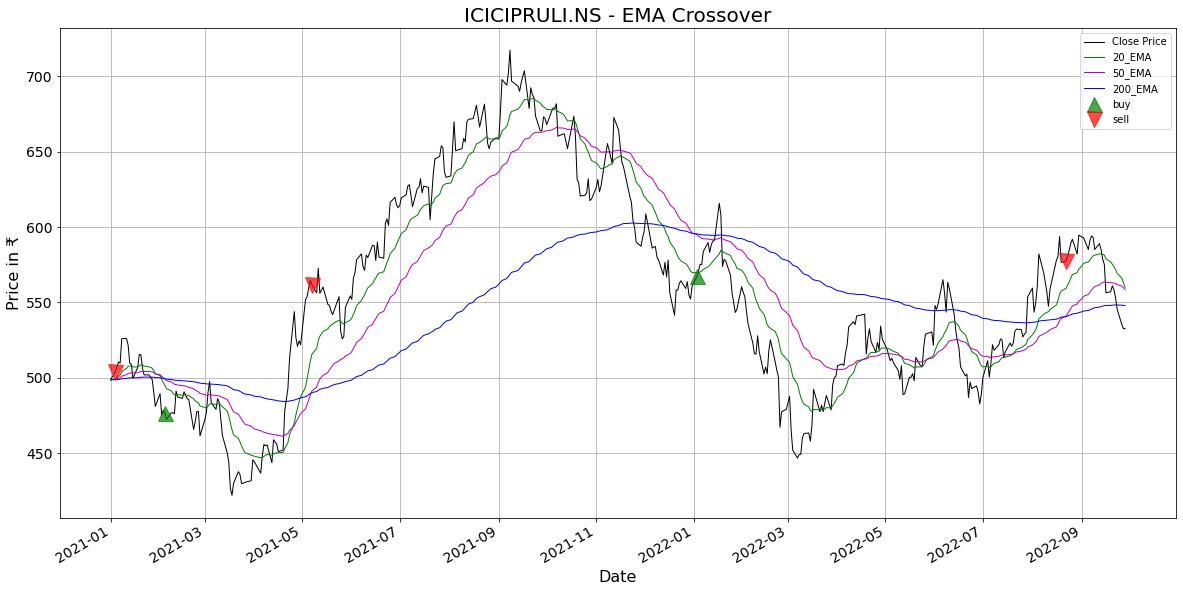

ICICIPRULI.NS
+---------------------+---------------+----------+----------+-----------+----------+------------+
| Date                |   Close Price |   20_EMA |   50_EMA |   200_EMA |   Signal | Position   |
|---------------------+---------------+----------+----------+-----------+----------+------------|
| 2021-01-04 00:00:00 |        503.9  |  499.195 |  498.904 |   498.752 |       -1 | Sell       |
| 2021-02-04 00:00:00 |        476.6  |  495.024 |  499.179 |   499.36  |        1 | Buy        |
| 2021-05-07 00:00:00 |        561.75 |  515.634 |  491.24  |   490.217 |       -1 | Sell       |
| 2022-01-03 00:00:00 |        567.2  |  569.539 |  594.88  |   595.442 |        1 | Buy        |
| 2022-08-22 00:00:00 |        577.25 |  559.32  |  540.857 |   540.539 |       -1 | Sell       |
+---------------------+---------------+----------+----------+-----------+----------+------------+
[*********************100%***********************]  1 of 1 completed


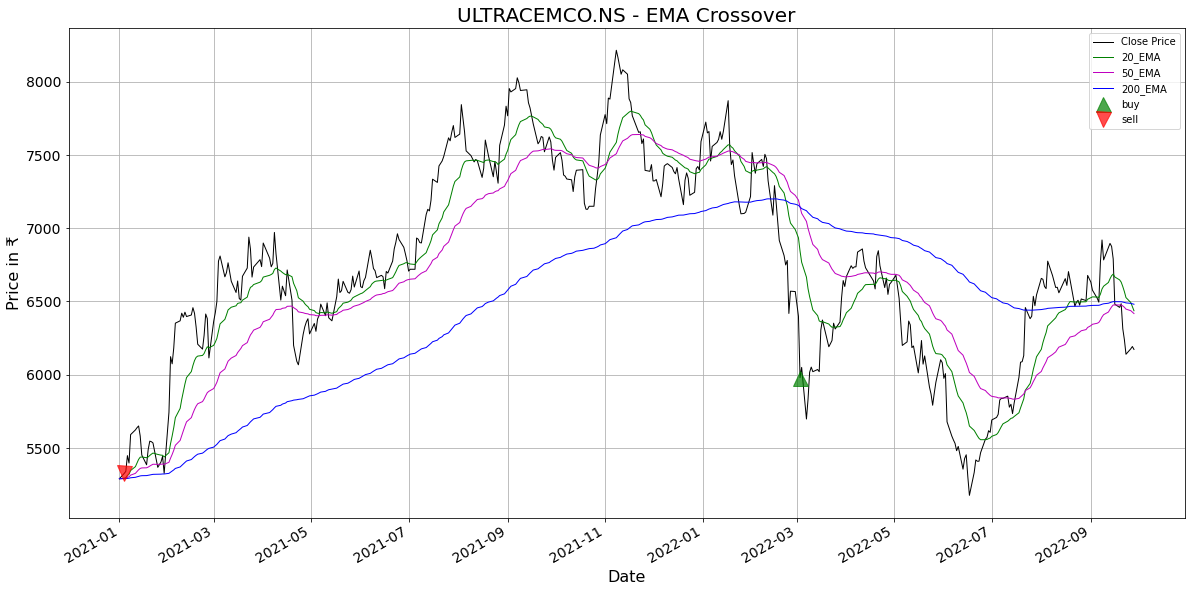

ULTRACEMCO.NS
+---------------------+---------------+----------+----------+-----------+----------+------------+
| Date                |   Close Price |   20_EMA |   50_EMA |   200_EMA |   Signal | Position   |
|---------------------+---------------+----------+----------+-----------+----------+------------|
| 2021-01-04 00:00:00 |        5327.2 |  5294.27 |  5292.23 |   5291.16 |       -1 | Sell       |
| 2022-03-03 00:00:00 |        5980.7 |  6843.58 |  7144.21 |   7144.5  |        1 | Buy        |
+---------------------+---------------+----------+----------+-----------+----------+------------+
[*********************100%***********************]  1 of 1 completed


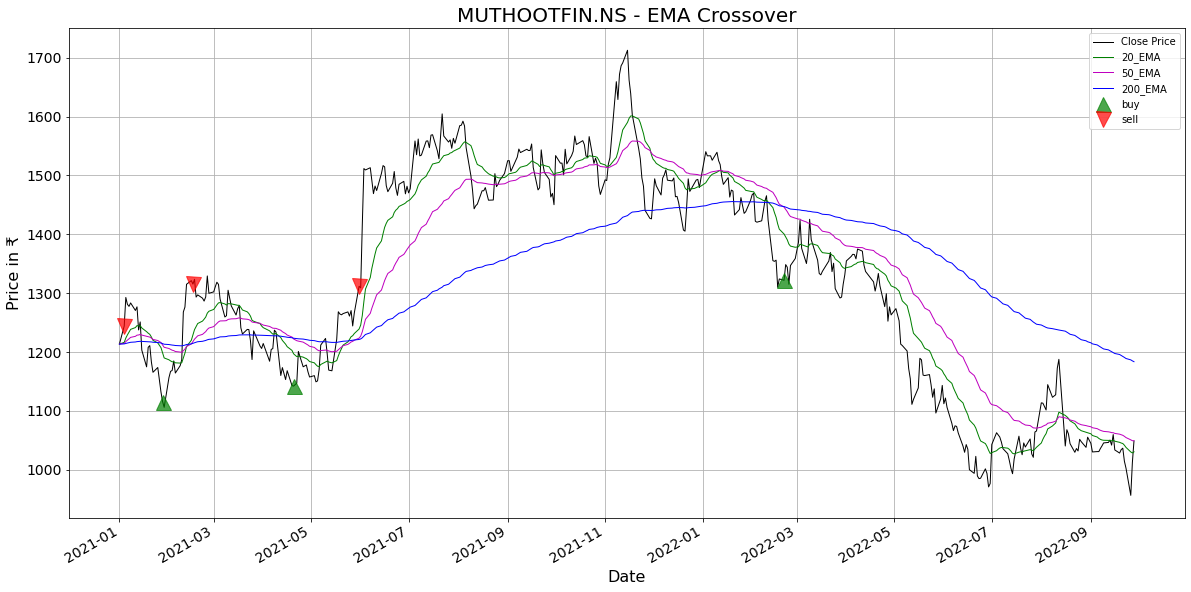

MUTHOOTFIN.NS
+---------------------+---------------+----------+----------+-----------+----------+------------+
| Date                |   Close Price |   20_EMA |   50_EMA |   200_EMA |   Signal | Position   |
|---------------------+---------------+----------+----------+-----------+----------+------------|
| 2021-01-04 00:00:00 |       1244.15 |  1216.28 |  1214.56 |   1213.66 |       -1 | Sell       |
| 2021-01-28 00:00:00 |       1115.7  |  1198.64 |  1212.05 |   1214.21 |        1 | Buy        |
| 2021-02-16 00:00:00 |       1315.3  |  1228.93 |  1217.57 |   1214.7  |       -1 | Sell       |
| 2021-04-20 00:00:00 |       1141.95 |  1196.83 |  1222.06 |   1223.32 |        1 | Buy        |
| 2021-05-31 00:00:00 |       1311.6  |  1238.93 |  1223.48 |   1221.22 |       -1 | Sell       |
| 2022-02-21 00:00:00 |       1321.85 |  1400.43 |  1446.14 |   1447.17 |        1 | Buy        |
+---------------------+---------------+----------+----------+-----------+----------+------------+
[*****

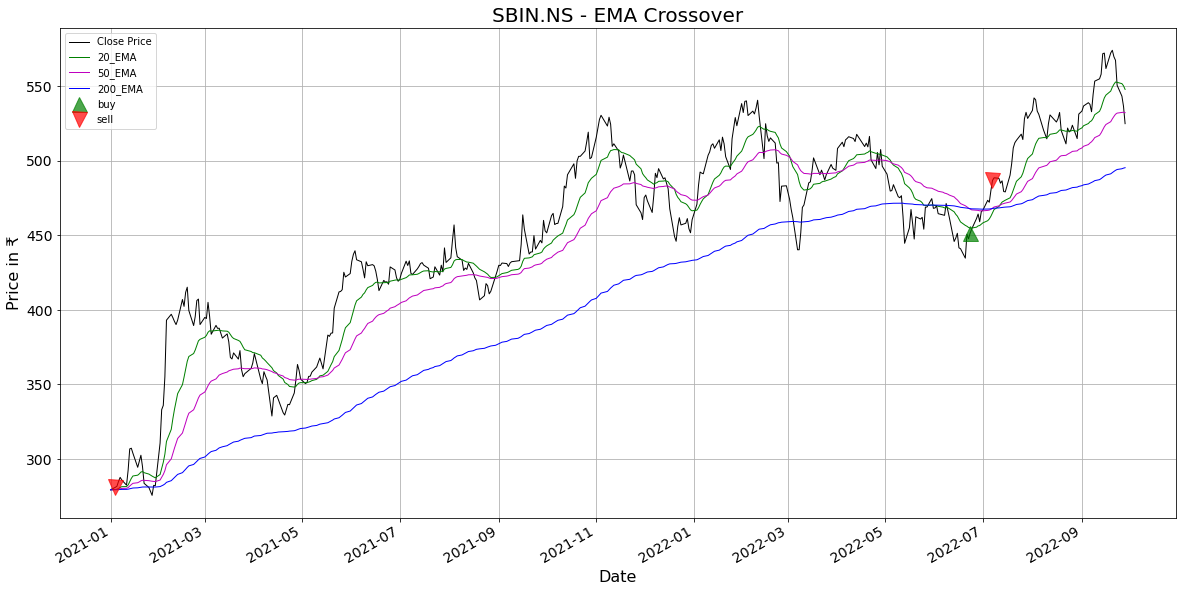

SBIN.NS
+---------------------+---------------+----------+----------+-----------+----------+------------+
| Date                |   Close Price |   20_EMA |   50_EMA |   200_EMA |   Signal | Position   |
|---------------------+---------------+----------+----------+-----------+----------+------------|
| 2021-01-04 00:00:00 |        281.05 |  279.557 |  279.465 |   279.416 |       -1 | Sell       |
| 2022-06-23 00:00:00 |        451.4  |  454.908 |  467.568 |   467.878 |        1 | Buy        |
| 2022-07-07 00:00:00 |        486.75 |  465.052 |  468.174 |   467.95  |       -1 | Sell       |
+---------------------+---------------+----------+----------+-----------+----------+------------+
[*********************100%***********************]  1 of 1 completed


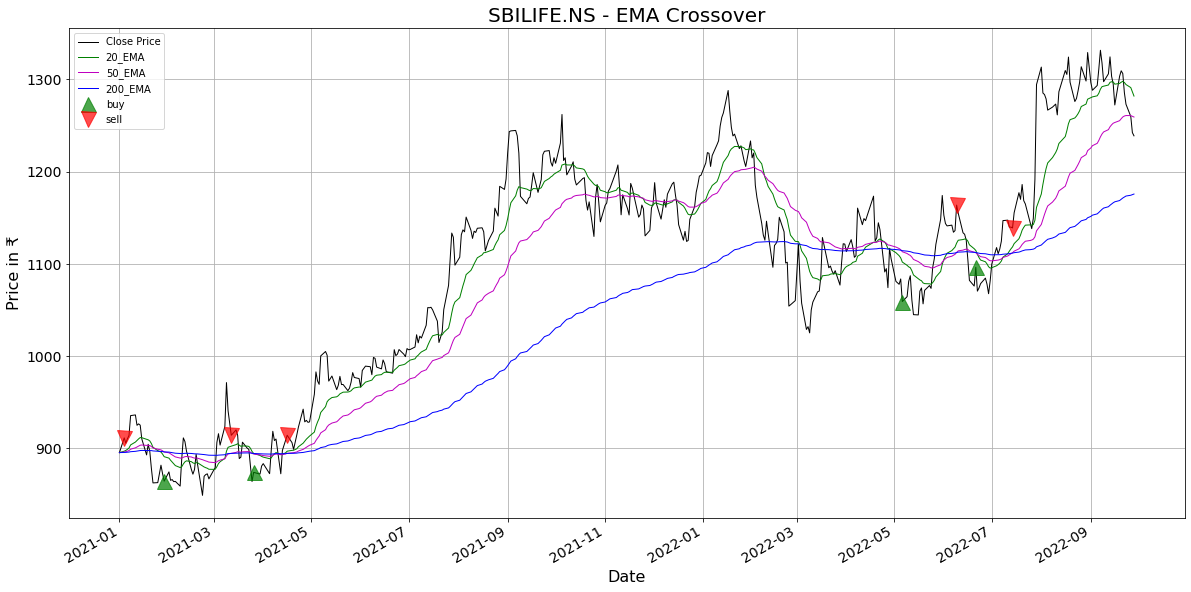

SBILIFE.NS
+---------------------+---------------+----------+----------+-----------+----------+------------+
| Date                |   Close Price |   20_EMA |   50_EMA |   200_EMA |   Signal | Position   |
|---------------------+---------------+----------+----------+-----------+----------+------------|
| 2021-01-04 00:00:00 |        911.4  |  896.924 |  896.027 |   895.559 |       -1 | Sell       |
| 2021-01-29 00:00:00 |        864.45 |  890.991 |  896.052 |   896.167 |        1 | Buy        |
| 2021-03-12 00:00:00 |        914.2  |  902.38  |  894.64  |   894.523 |       -1 | Sell       |
| 2021-03-26 00:00:00 |        873.95 |  894.471 |  893.843 |   894.417 |        1 | Buy        |
| 2021-04-16 00:00:00 |        914.2  |  896.943 |  894.704 |   894.492 |       -1 | Sell       |
| 2022-05-06 00:00:00 |       1059.15 | 1101.97  | 1113.15  |  1114.28  |        1 | Buy        |
| 2022-06-09 00:00:00 |       1163.7  | 1122.52  | 1112.46  |  1112.3   |       -1 | Sell       |
| 2022-06

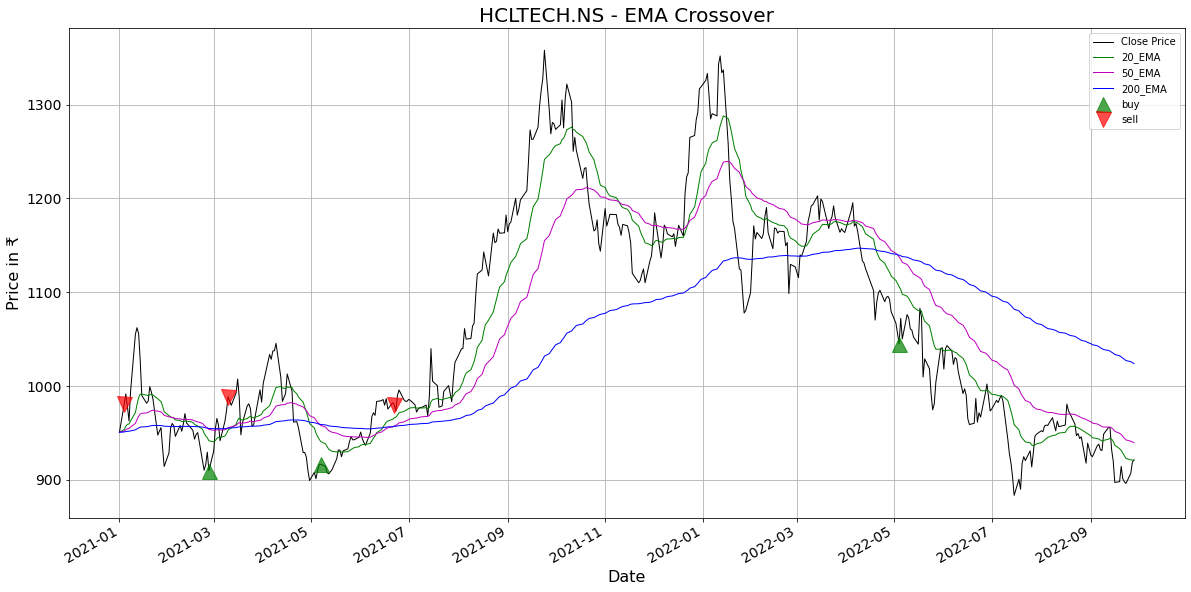

HCLTECH.NS
+---------------------+---------------+----------+----------+-----------+----------+------------+
| Date                |   Close Price |   20_EMA |   50_EMA |   200_EMA |   Signal | Position   |
|---------------------+---------------+----------+----------+-----------+----------+------------|
| 2021-01-04 00:00:00 |        980.4  |  953.348 |  951.673 |   950.798 |       -1 | Sell       |
| 2021-02-26 00:00:00 |        909.45 |  941.372 |  953.479 |   954.51  |        1 | Buy        |
| 2021-03-10 00:00:00 |        988.5  |  952.774 |  955.333 |   954.882 |       -1 | Sell       |
| 2021-05-07 00:00:00 |        916.4  |  940.575 |  957.744 |   958.802 |        1 | Buy        |
| 2021-06-22 00:00:00 |        980.1  |  965.868 |  957.215 |   956.681 |       -1 | Sell       |
| 2022-05-04 00:00:00 |       1044.95 | 1106.06  | 1137.68  |  1139.55  |        1 | Buy        |
+---------------------+---------------+----------+----------+-----------+----------+------------+
[********

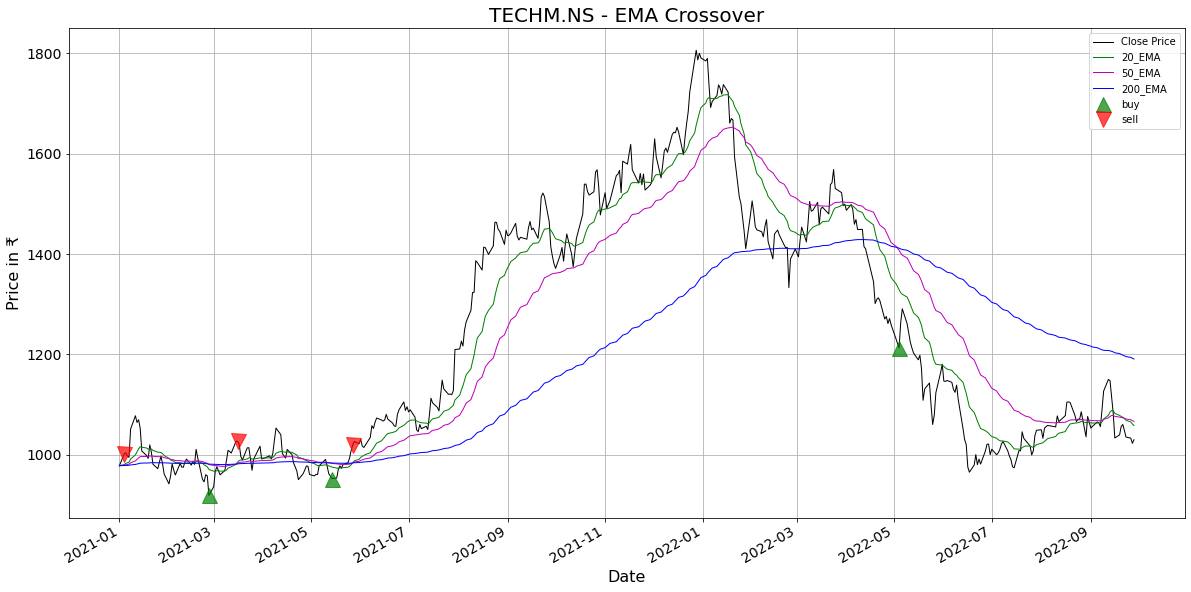

TECHM.NS
+---------------------+---------------+----------+----------+-----------+----------+------------+
| Date                |   Close Price |   20_EMA |   50_EMA |   200_EMA |   Signal | Position   |
|---------------------+---------------+----------+----------+-----------+----------+------------|
| 2021-01-04 00:00:00 |       1001.95 |  980.236 |  978.891 |   978.189 |       -1 | Sell       |
| 2021-02-26 00:00:00 |        918.85 |  970.4   |  980.238 |   981.189 |        1 | Buy        |
| 2021-03-16 00:00:00 |       1026.55 |  985.121 |  982.877 |   981.61  |       -1 | Sell       |
| 2021-05-14 00:00:00 |        952.2  |  975.292 |  982.561 |   983.362 |        1 | Buy        |
| 2021-05-27 00:00:00 |       1019.8  |  983.454 |  983.672 |   983.488 |       -1 | Sell       |
| 2022-05-04 00:00:00 |       1212.8  | 1328.94  | 1407.46  |  1411.58  |        1 | Buy        |
+---------------------+---------------+----------+----------+-----------+----------+------------+
[**********

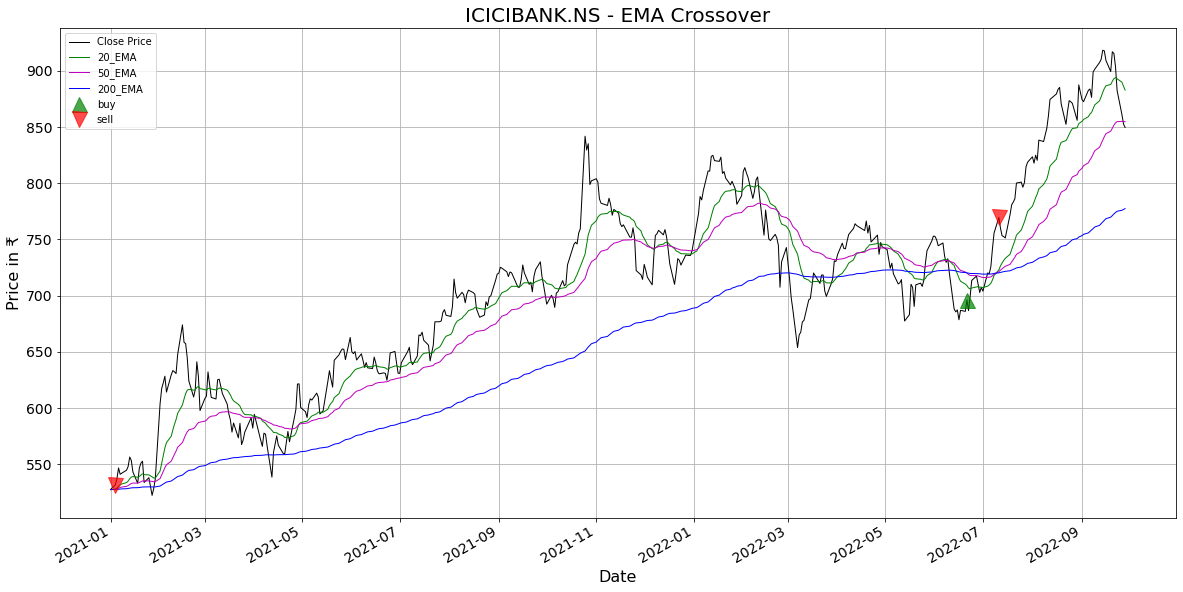

ICICIBANK.NS
+---------------------+---------------+----------+----------+-----------+----------+------------+
| Date                |   Close Price |   20_EMA |   50_EMA |   200_EMA |   Signal | Position   |
|---------------------+---------------+----------+----------+-----------+----------+------------|
| 2021-01-04 00:00:00 |         531.7 |  527.9   |  527.665 |   527.542 |       -1 | Sell       |
| 2022-06-21 00:00:00 |         696.1 |  708.856 |  720.01  |   720.202 |        1 | Buy        |
| 2022-07-11 00:00:00 |         769.5 |  722.828 |  721.128 |   720.213 |       -1 | Sell       |
+---------------------+---------------+----------+----------+-----------+----------+------------+
[*********************100%***********************]  1 of 1 completed


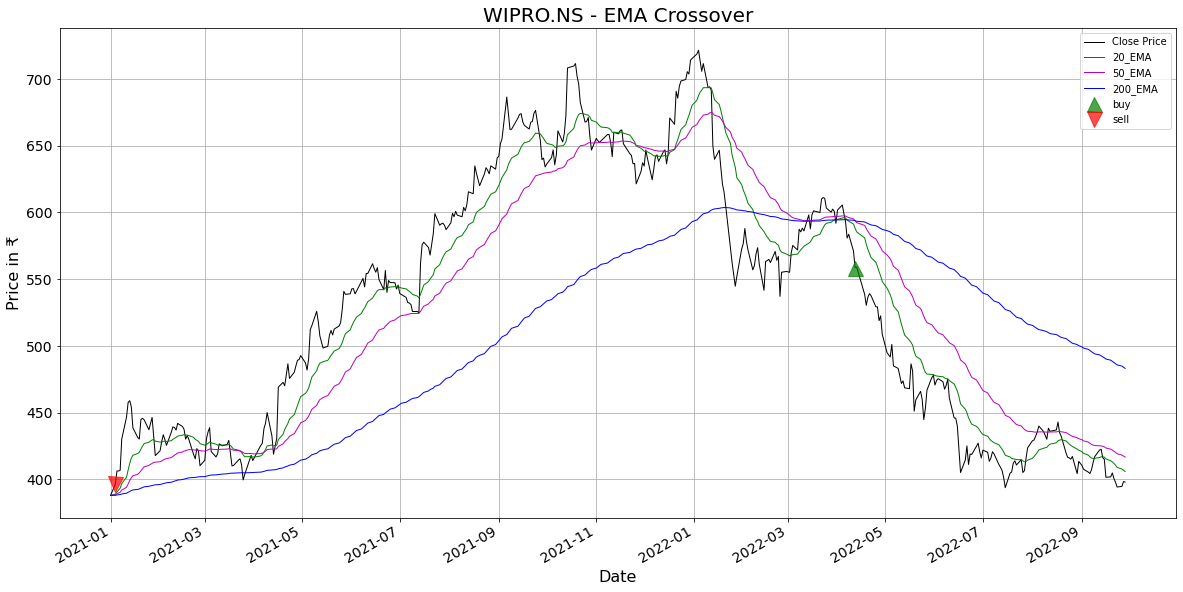

WIPRO.NS
+---------------------+---------------+----------+----------+-----------+----------+------------+
| Date                |   Close Price |   20_EMA |   50_EMA |   200_EMA |   Signal | Position   |
|---------------------+---------------+----------+----------+-----------+----------+------------|
| 2021-01-04 00:00:00 |         396.4 |   388.89 |  388.425 |   388.183 |       -1 | Sell       |
| 2022-04-12 00:00:00 |         558.7 |   588.2  |  593.759 |   593.783 |        1 | Buy        |
+---------------------+---------------+----------+----------+-----------+----------+------------+
[*********************100%***********************]  1 of 1 completed


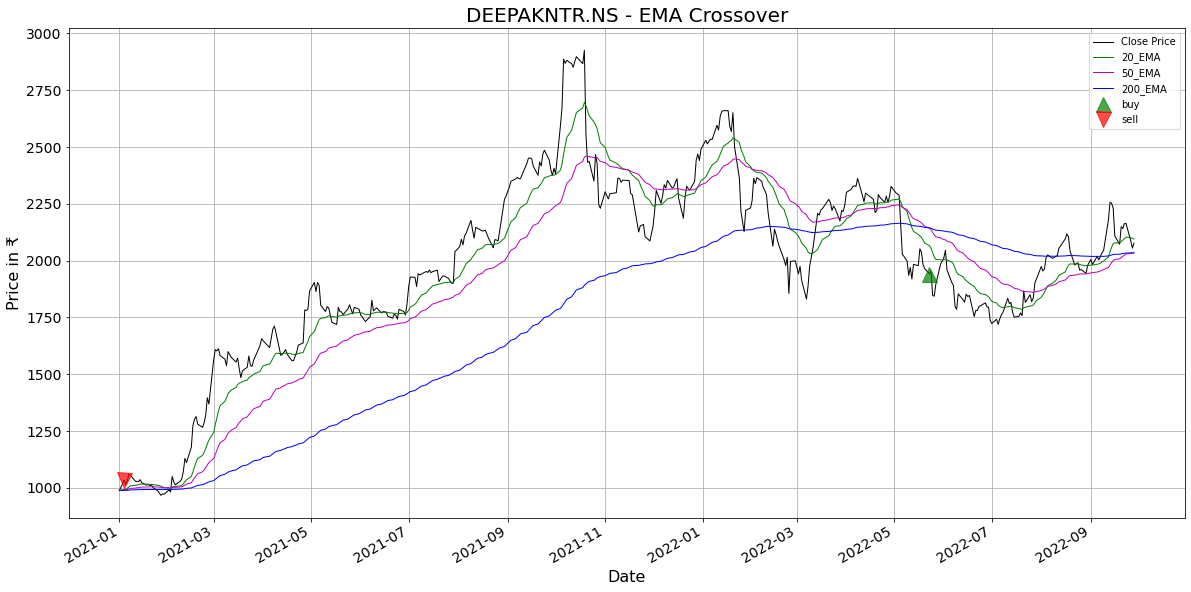

DEEPAKNTR.NS
+---------------------+---------------+----------+----------+-----------+----------+------------+
| Date                |   Close Price |   20_EMA |   50_EMA |   200_EMA |   Signal | Position   |
|---------------------+---------------+----------+----------+-----------+----------+------------|
| 2021-01-04 00:00:00 |       1034.05 |   992.25 |  989.662 |    988.31 |       -1 | Sell       |
| 2022-05-23 00:00:00 |       1941.4  |  2065.23 | 2143     |   2143.98 |        1 | Buy        |
+---------------------+---------------+----------+----------+-----------+----------+------------+
[*********************100%***********************]  1 of 1 completed


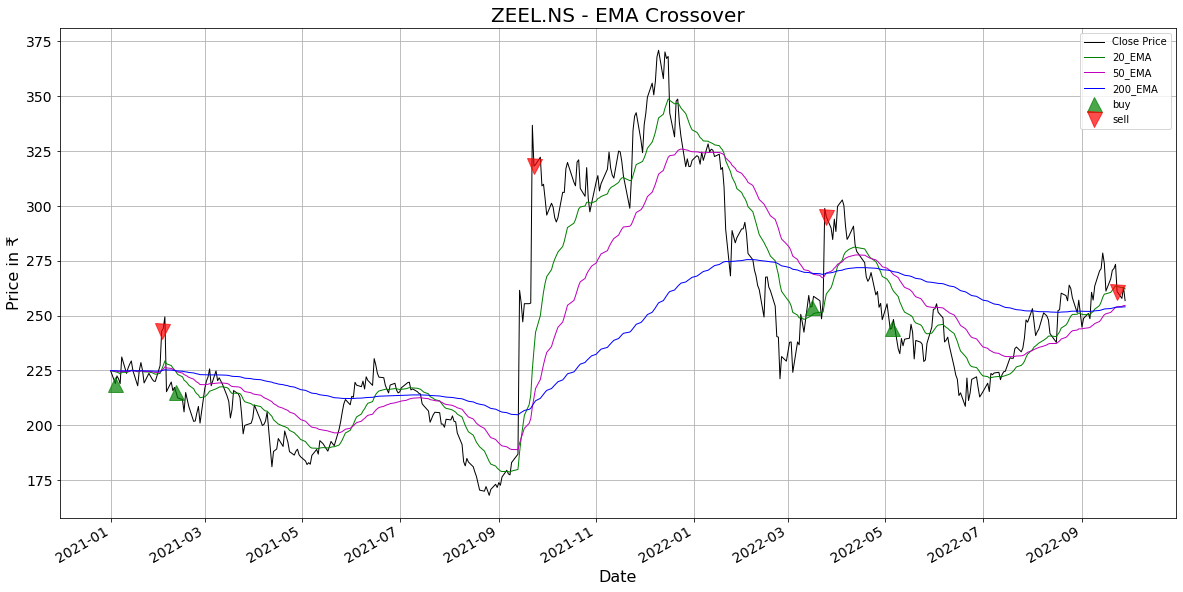

ZEEL.NS
+---------------------+---------------+----------+----------+-----------+----------+------------+
| Date                |   Close Price |   20_EMA |   50_EMA |   200_EMA |   Signal | Position   |
|---------------------+---------------+----------+----------+-----------+----------+------------|
| 2021-01-04 00:00:00 |        219.05 |  224.388 |  224.719 |   224.891 |        1 | Buy        |
| 2021-02-02 00:00:00 |        242.9  |  225.484 |  224.938 |   224.894 |       -1 | Sell       |
| 2021-02-11 00:00:00 |        215.1  |  224.334 |  224.809 |   224.904 |        1 | Buy        |
| 2021-09-23 00:00:00 |        318.2  |  234.347 |  212.584 |   210.107 |       -1 | Sell       |
| 2022-03-16 00:00:00 |        254.15 |  250.163 |  269.22  |   269.346 |        1 | Buy        |
| 2022-03-25 00:00:00 |        295.1  |  259.91  |  269.408 |   269.343 |       -1 | Sell       |
| 2022-05-05 00:00:00 |        244.35 |  262.573 |  269.529 |   270.259 |        1 | Buy        |
| 2022-09-23

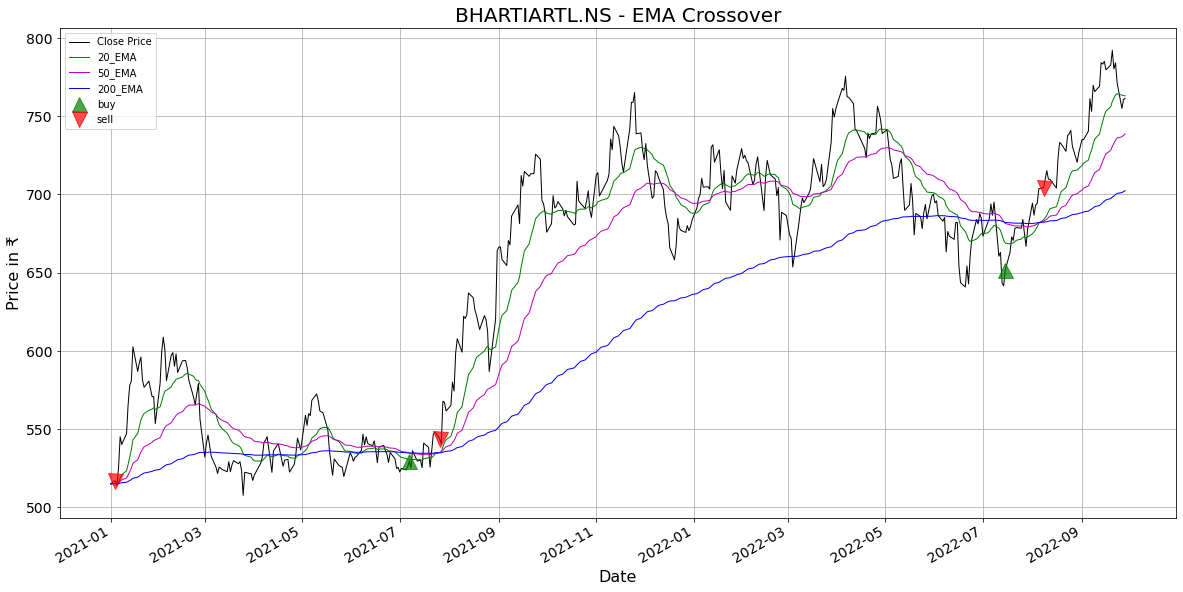

BHARTIARTL.NS
+---------------------+---------------+----------+----------+-----------+----------+------------+
| Date                |   Close Price |   20_EMA |   50_EMA |   200_EMA |   Signal | Position   |
|---------------------+---------------+----------+----------+-----------+----------+------------|
| 2021-01-04 00:00:00 |        517.1  |  515.336 |  515.226 |   515.169 |       -1 | Sell       |
| 2021-07-07 00:00:00 |        529.6  |  530.639 |  534.768 |   534.895 |        1 | Buy        |
| 2021-07-26 00:00:00 |        544.05 |  535.116 |  535.186 |   534.939 |       -1 | Sell       |
| 2022-07-15 00:00:00 |        651.8  |  668.973 |  681.43  |   682.135 |        1 | Buy        |
| 2022-08-08 00:00:00 |        704.35 |  683.748 |  682.927 |   682.284 |       -1 | Sell       |
+---------------------+---------------+----------+----------+-----------+----------+------------+
[*********************100%***********************]  1 of 1 completed


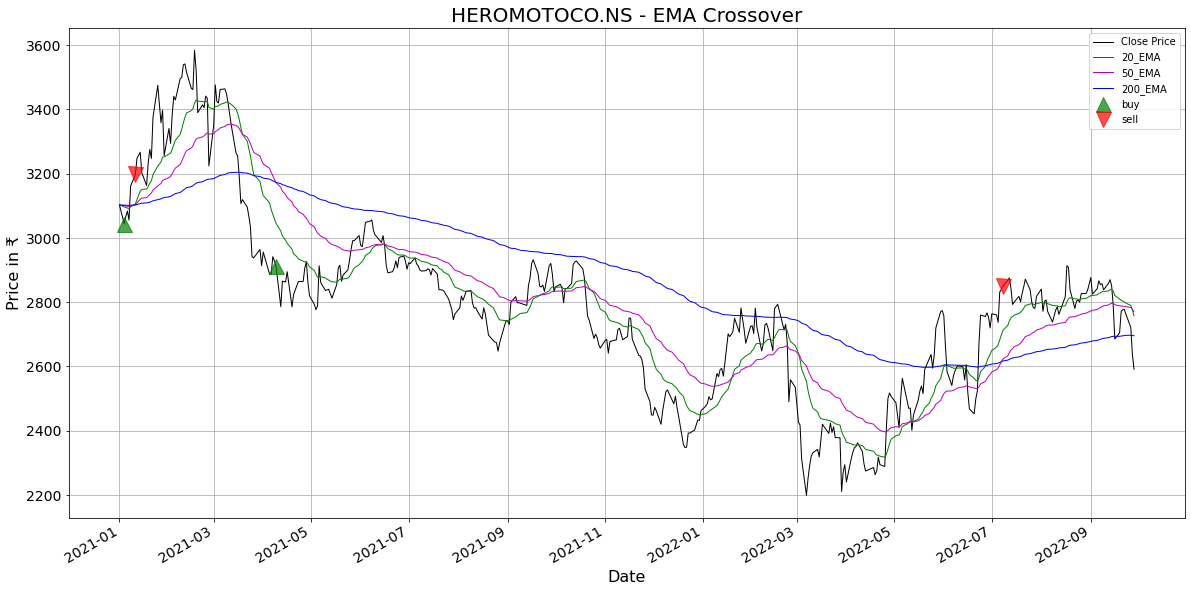

HEROMOTOCO.NS
+---------------------+---------------+----------+----------+-----------+----------+------------+
| Date                |   Close Price |   20_EMA |   50_EMA |   200_EMA |   Signal | Position   |
|---------------------+---------------+----------+----------+-----------+----------+------------|
| 2021-01-04 00:00:00 |       3043.85 |  3097.05 |  3100.34 |   3102.06 |        1 | Buy        |
| 2021-01-11 00:00:00 |       3197.7  |  3106.04 |  3103.13 |   3102.63 |       -1 | Sell       |
| 2021-04-09 00:00:00 |       2912.9  |  3045.96 |  3172.34 |   3172.69 |        1 | Buy        |
| 2022-07-08 00:00:00 |       2849.3  |  2712.5  |  2623.32 |   2617.01 |       -1 | Sell       |
+---------------------+---------------+----------+----------+-----------+----------+------------+
[*********************100%***********************]  1 of 1 completed


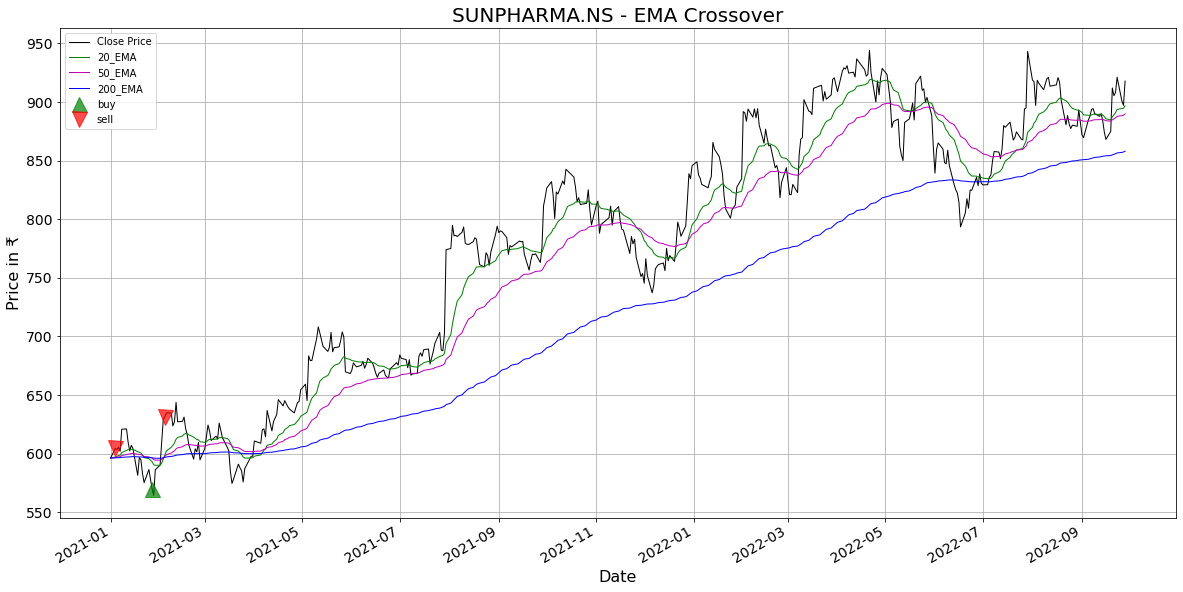

SUNPHARMA.NS
+---------------------+---------------+----------+----------+-----------+----------+------------+
| Date                |   Close Price |   20_EMA |   50_EMA |   200_EMA |   Signal | Position   |
|---------------------+---------------+----------+----------+-----------+----------+------------|
| 2021-01-04 00:00:00 |         604.4 |  597.026 |  596.57  |   596.331 |       -1 | Sell       |
| 2021-01-27 00:00:00 |         569.8 |  593.146 |  596.059 |   596.45  |        1 | Buy        |
| 2021-02-04 00:00:00 |         631.5 |  598.859 |  597.629 |   596.786 |       -1 | Sell       |
+---------------------+---------------+----------+----------+-----------+----------+------------+
[*********************100%***********************]  1 of 1 completed


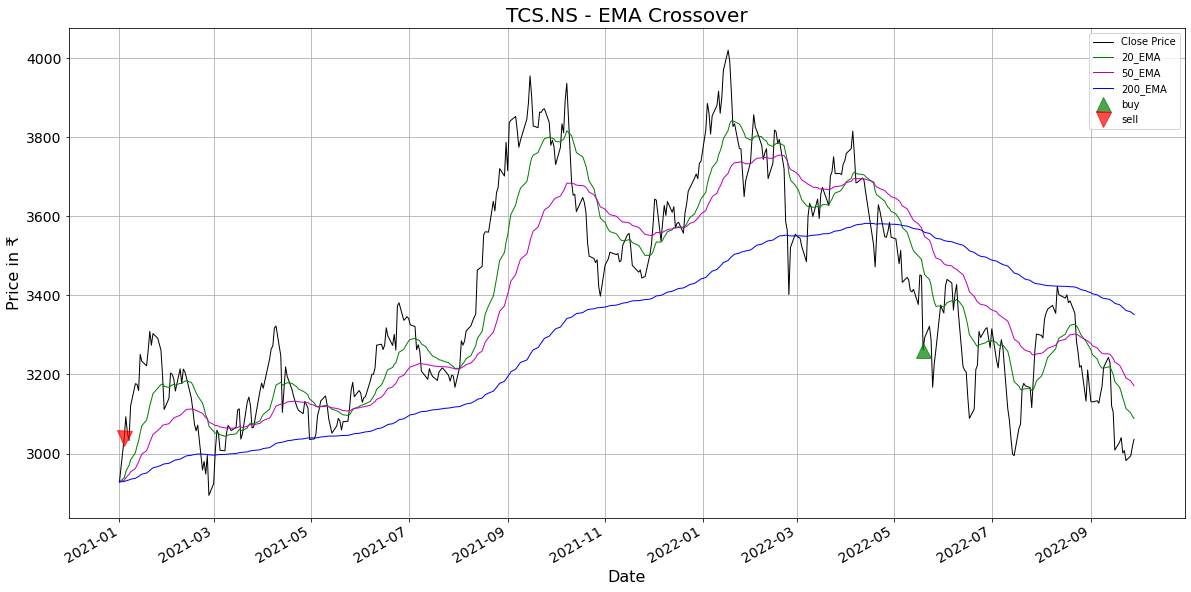

TCS.NS
+---------------------+---------------+----------+----------+-----------+----------+------------+
| Date                |   Close Price |   20_EMA |   50_EMA |   200_EMA |   Signal | Position   |
|---------------------+---------------+----------+----------+-----------+----------+------------|
| 2021-01-04 00:00:00 |       3039.45 |  2938.84 |  2932.61 |   2929.36 |       -1 | Sell       |
| 2022-05-19 00:00:00 |       3261.95 |  3468.87 |  3558.55 |   3561.46 |        1 | Buy        |
+---------------------+---------------+----------+----------+-----------+----------+------------+
[*********************100%***********************]  1 of 1 completed


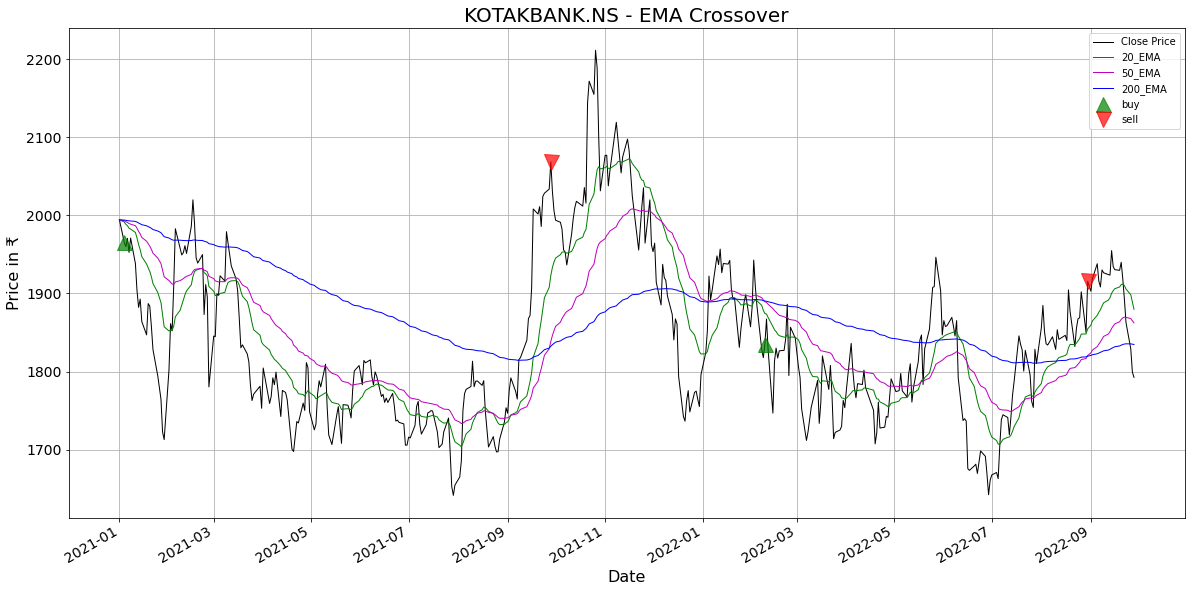

KOTAKBANK.NS
+---------------------+---------------+----------+----------+-----------+----------+------------+
| Date                |   Close Price |   20_EMA |   50_EMA |   200_EMA |   Signal | Position   |
|---------------------+---------------+----------+----------+-----------+----------+------------|
| 2021-01-04 00:00:00 |       1965.55 |  1991.34 |  1992.93 |   1993.77 |        1 | Buy        |
| 2021-09-28 00:00:00 |       2068.2  |  1922.95 |  1838.54 |   1832.41 |       -1 | Sell       |
| 2022-02-09 00:00:00 |       1835    |  1874.21 |  1889.31 |   1890.17 |        1 | Buy        |
| 2022-08-30 00:00:00 |       1915.45 |  1854.53 |  1820.57 |   1819.75 |       -1 | Sell       |
+---------------------+---------------+----------+----------+-----------+----------+------------+
[*********************100%***********************]  1 of 1 completed


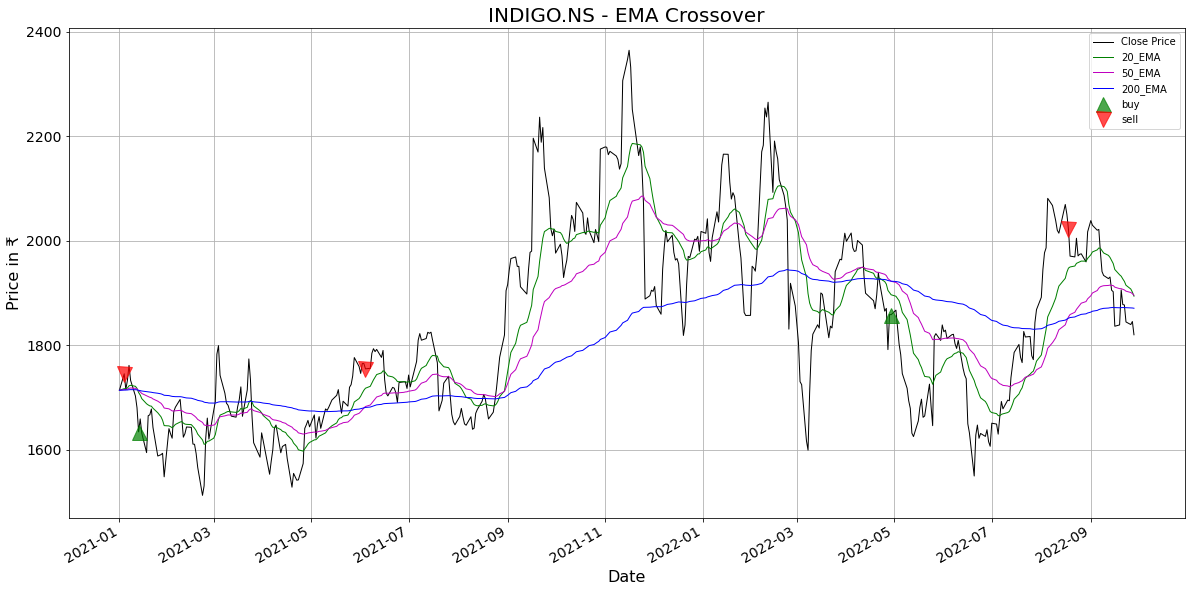

INDIGO.NS
+---------------------+---------------+----------+----------+-----------+----------+------------+
| Date                |   Close Price |   20_EMA |   50_EMA |   200_EMA |   Signal | Position   |
|---------------------+---------------+----------+----------+-----------+----------+------------|
| 2021-01-04 00:00:00 |       1744.95 |  1716.5  |  1714.73 |   1713.81 |       -1 | Sell       |
| 2021-01-13 00:00:00 |       1633.8  |  1709.19 |  1712.54 |   1713.39 |        1 | Buy        |
| 2021-06-04 00:00:00 |       1754.45 |  1717.39 |  1682.37 |   1680.58 |       -1 | Sell       |
| 2022-04-29 00:00:00 |       1858.1  |  1896.29 |  1922.09 |   1922.27 |        1 | Buy        |
| 2022-08-18 00:00:00 |       2022    |  1947.34 |  1853.89 |   1851.47 |       -1 | Sell       |
+---------------------+---------------+----------+----------+-----------+----------+------------+
[*********************100%***********************]  1 of 1 completed


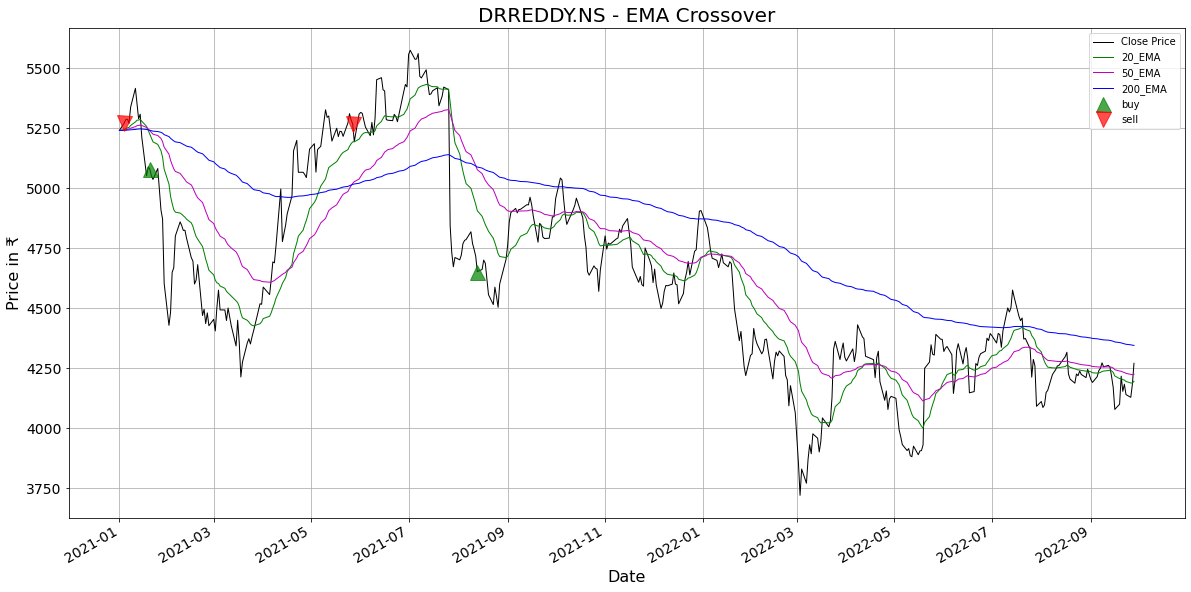

DRREDDY.NS
+---------------------+---------------+----------+----------+-----------+----------+------------+
| Date                |   Close Price |   20_EMA |   50_EMA |   200_EMA |   Signal | Position   |
|---------------------+---------------+----------+----------+-----------+----------+------------|
| 2021-01-04 00:00:00 |       5272.25 |  5244.29 |  5242.56 |   5241.66 |       -1 | Sell       |
| 2021-01-20 00:00:00 |       5080.65 |  5226.69 |  5240.65 |   5242.18 |        1 | Buy        |
| 2021-05-27 00:00:00 |       5268.85 |  5193.73 |  5020.56 |   5016.09 |       -1 | Sell       |
| 2021-08-13 00:00:00 |       4652.2  |  4906.28 |  5077.26 |   5088.53 |        1 | Buy        |
+---------------------+---------------+----------+----------+-----------+----------+------------+
[*********************100%***********************]  1 of 1 completed


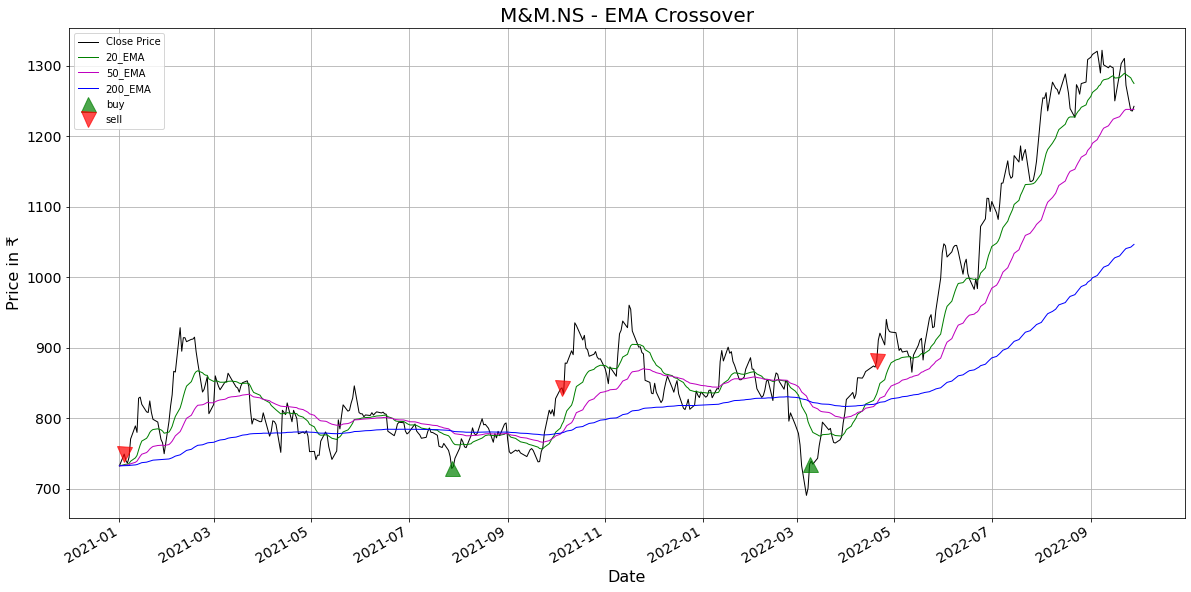

M&M.NS
+---------------------+---------------+----------+----------+-----------+----------+------------+
| Date                |   Close Price |   20_EMA |   50_EMA |   200_EMA |   Signal | Position   |
|---------------------+---------------+----------+----------+-----------+----------+------------|
| 2021-01-04 00:00:00 |        749.1  |  734.036 |  733.103 |   732.616 |       -1 | Sell       |
| 2021-07-28 00:00:00 |        728.7  |  768.119 |  781.263 |   781.892 |        1 | Buy        |
| 2021-10-05 00:00:00 |        843.05 |  791.35  |  779.94  |   779.308 |       -1 | Sell       |
| 2022-03-09 00:00:00 |        734.85 |  789.352 |  822.737 |   823.926 |        1 | Buy        |
| 2022-04-20 00:00:00 |        881.25 |  834.616 |  821.128 |   820.721 |       -1 | Sell       |
+---------------------+---------------+----------+----------+-----------+----------+------------+
[*********************100%***********************]  1 of 1 completed


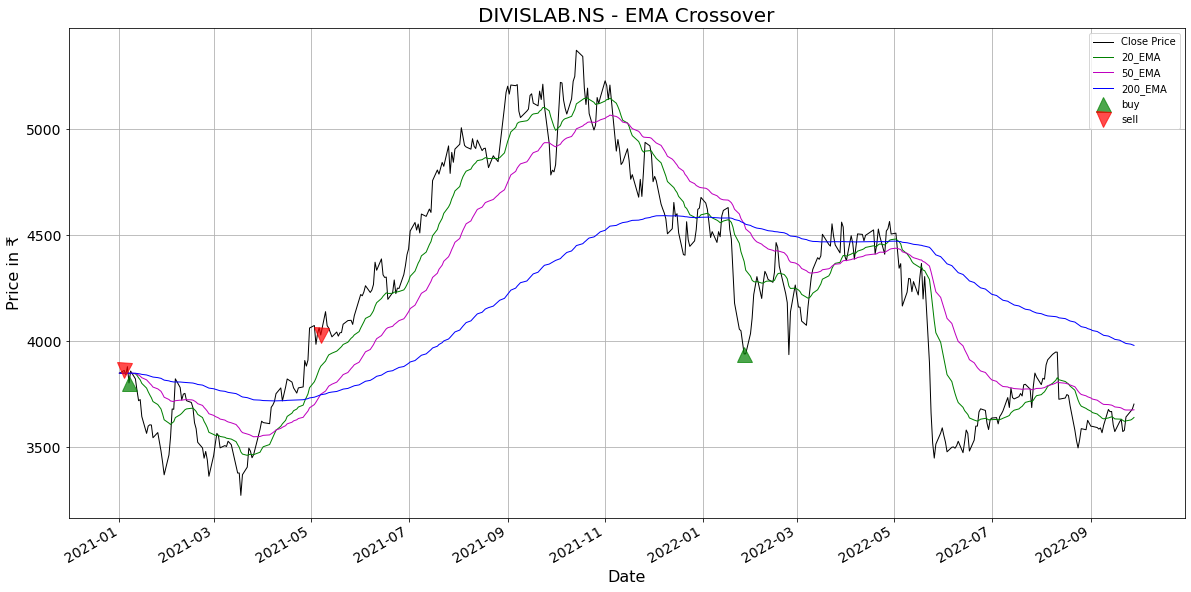

DIVISLAB.NS
+---------------------+---------------+----------+----------+-----------+----------+------------+
| Date                |   Close Price |   20_EMA |   50_EMA |   200_EMA |   Signal | Position   |
|---------------------+---------------+----------+----------+-----------+----------+------------|
| 2021-01-04 00:00:00 |       3862.25 |  3850.31 |  3849.57 |   3849.18 |       -1 | Sell       |
| 2021-01-07 00:00:00 |       3803.05 |  3847.71 |  3848.61 |   3848.96 |        1 | Buy        |
| 2021-05-07 00:00:00 |       4029.1  |  3881.67 |  3749.55 |   3747.35 |       -1 | Sell       |
| 2022-01-27 00:00:00 |       3939.85 |  4376.28 |  4553.45 |   4557.27 |        1 | Buy        |
+---------------------+---------------+----------+----------+-----------+----------+------------+
[*********************100%***********************]  1 of 1 completed


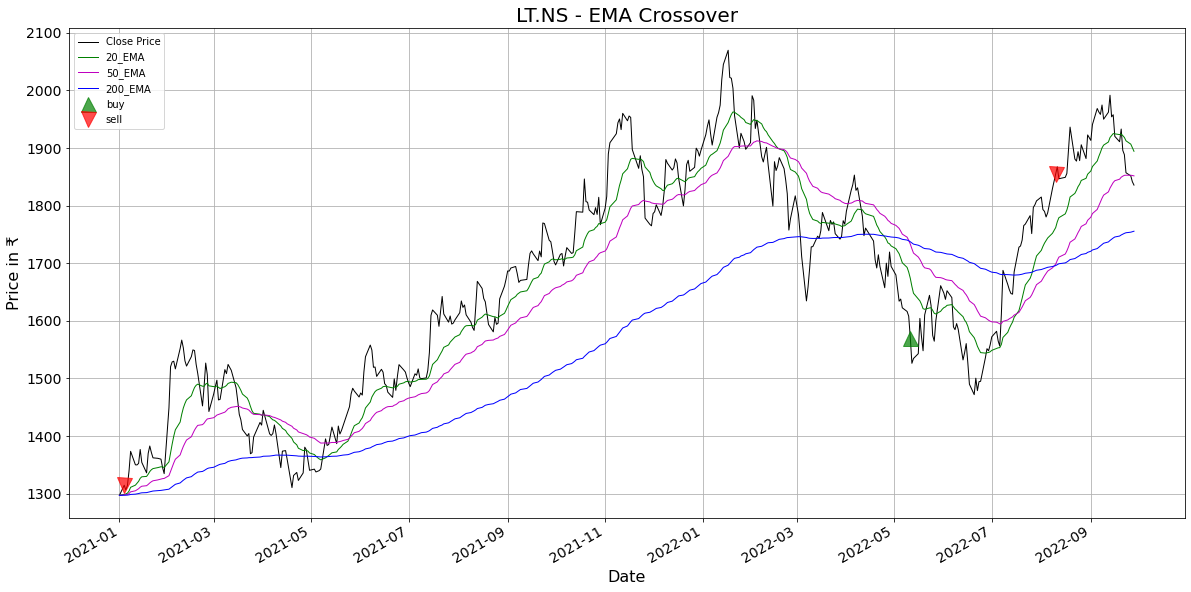

LT.NS
+---------------------+---------------+----------+----------+-----------+----------+------------+
| Date                |   Close Price |   20_EMA |   50_EMA |   200_EMA |   Signal | Position   |
|---------------------+---------------+----------+----------+-----------+----------+------------|
| 2021-01-04 00:00:00 |       1314.6  |  1298.68 |  1297.69 |   1297.18 |       -1 | Sell       |
| 2022-05-11 00:00:00 |       1570.8  |  1673.71 |  1733.05 |   1737.07 |        1 | Buy        |
| 2022-08-10 00:00:00 |       1855.15 |  1761.68 |  1698.22 |   1695.73 |       -1 | Sell       |
+---------------------+---------------+----------+----------+-----------+----------+------------+
[*********************100%***********************]  1 of 1 completed


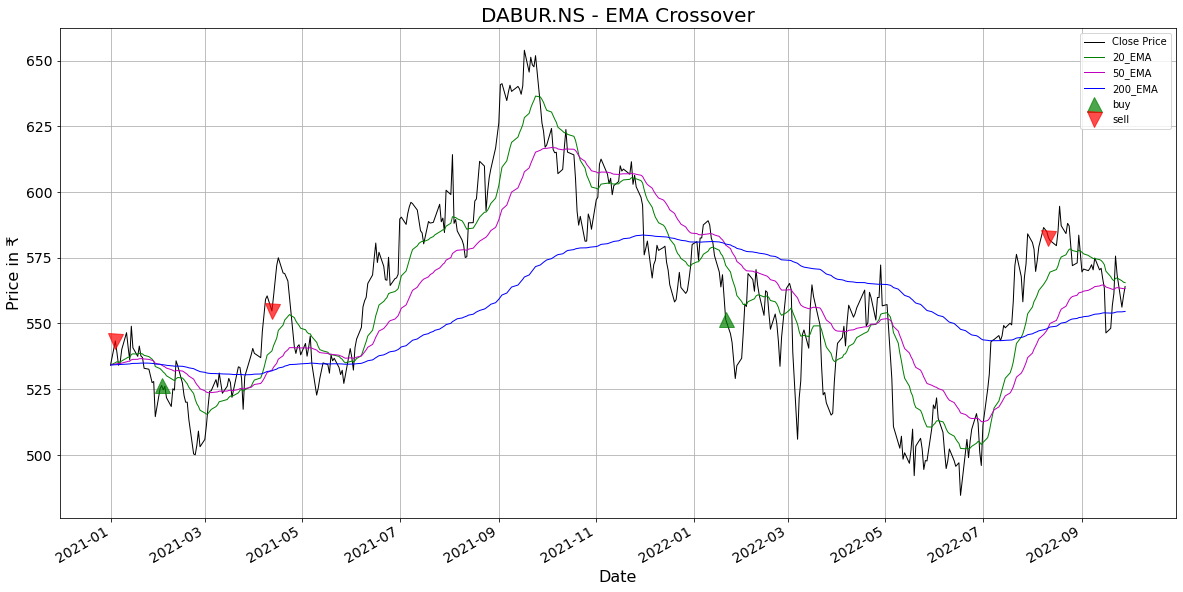

DABUR.NS
+---------------------+---------------+----------+----------+-----------+----------+------------+
| Date                |   Close Price |   20_EMA |   50_EMA |   200_EMA |   Signal | Position   |
|---------------------+---------------+----------+----------+-----------+----------+------------|
| 2021-01-04 00:00:00 |        543.35 |  535.071 |  534.559 |   534.291 |       -1 | Sell       |
| 2021-02-02 00:00:00 |        526.4  |  532.21  |  534.149 |   534.384 |        1 | Buy        |
| 2021-04-12 00:00:00 |        554.75 |  539.543 |  532.242 |   531.961 |       -1 | Sell       |
| 2022-01-21 00:00:00 |        551.55 |  572.089 |  579.817 |   580.225 |        1 | Buy        |
| 2022-08-11 00:00:00 |        582.7  |  568.285 |  548.72  |   548.319 |       -1 | Sell       |
+---------------------+---------------+----------+----------+-----------+----------+------------+
[*********************100%***********************]  1 of 1 completed


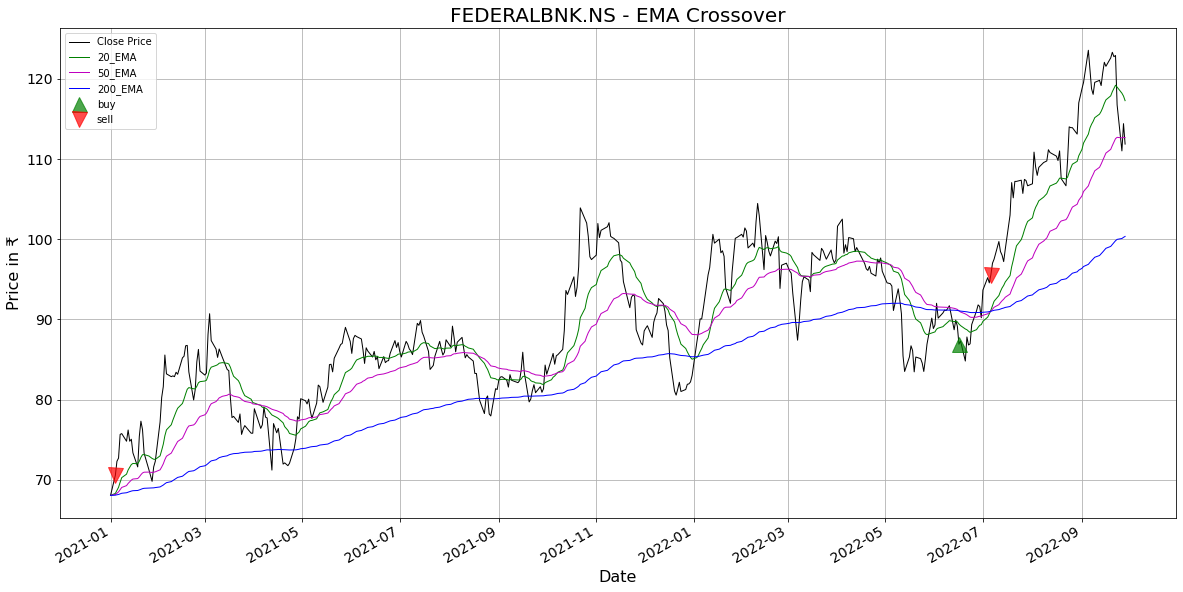

FEDERALBNK.NS
+---------------------+---------------+----------+----------+-----------+----------+------------+
| Date                |   Close Price |   20_EMA |   50_EMA |   200_EMA |   Signal | Position   |
|---------------------+---------------+----------+----------+-----------+----------+------------|
| 2021-01-04 00:00:00 |         70.55 |  68.2881 |  68.148  |   68.0749 |       -1 | Sell       |
| 2022-06-16 00:00:00 |         86.9  |  89.4193 |  91.0618 |   91.066  |        1 | Buy        |
| 2022-07-06 00:00:00 |         95.55 |  91.1427 |  91.0247 |   91.0048 |       -1 | Sell       |
+---------------------+---------------+----------+----------+-----------+----------+------------+
[*********************100%***********************]  1 of 1 completed


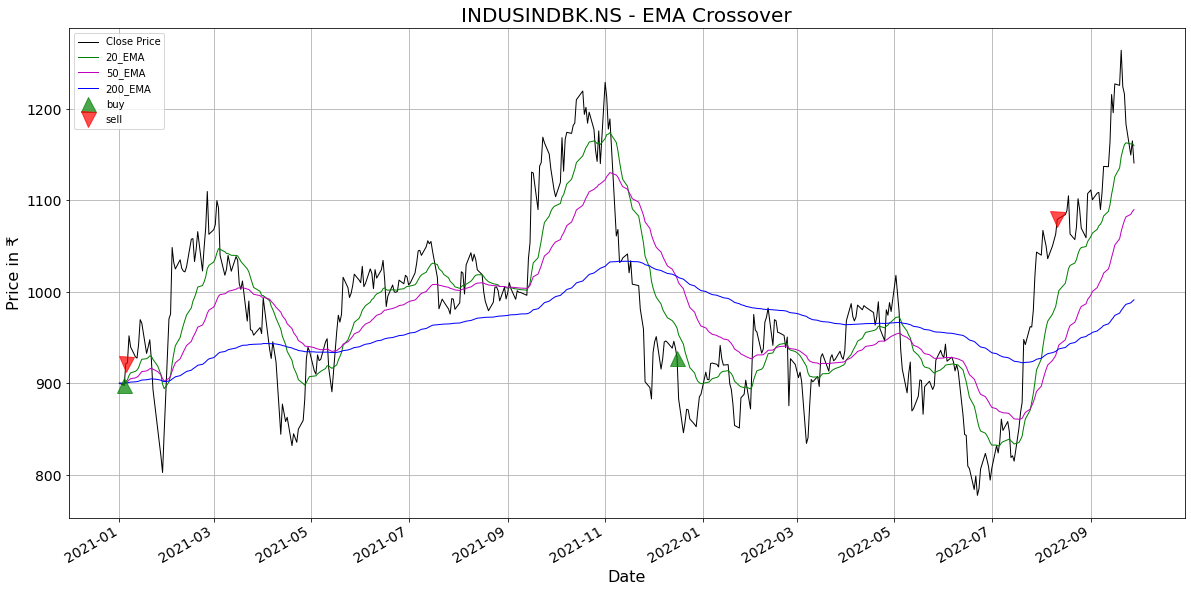

INDUSINDBK.NS
+---------------------+---------------+----------+----------+-----------+----------+------------+
| Date                |   Close Price |   20_EMA |   50_EMA |   200_EMA |   Signal | Position   |
|---------------------+---------------+----------+----------+-----------+----------+------------|
| 2021-01-04 00:00:00 |        897.85 |  899.931 |  900.06  |   900.127 |        1 | Buy        |
| 2021-01-05 00:00:00 |        921.65 |  901.999 |  900.907 |   900.341 |       -1 | Sell       |
| 2021-12-16 00:00:00 |        928.3  |  960.432 | 1014.95  |  1016.96  |        1 | Buy        |
| 2022-08-11 00:00:00 |       1079.2  |  993.136 |  936.358 |   936.339 |       -1 | Sell       |
+---------------------+---------------+----------+----------+-----------+----------+------------+
[*********************100%***********************]  1 of 1 completed


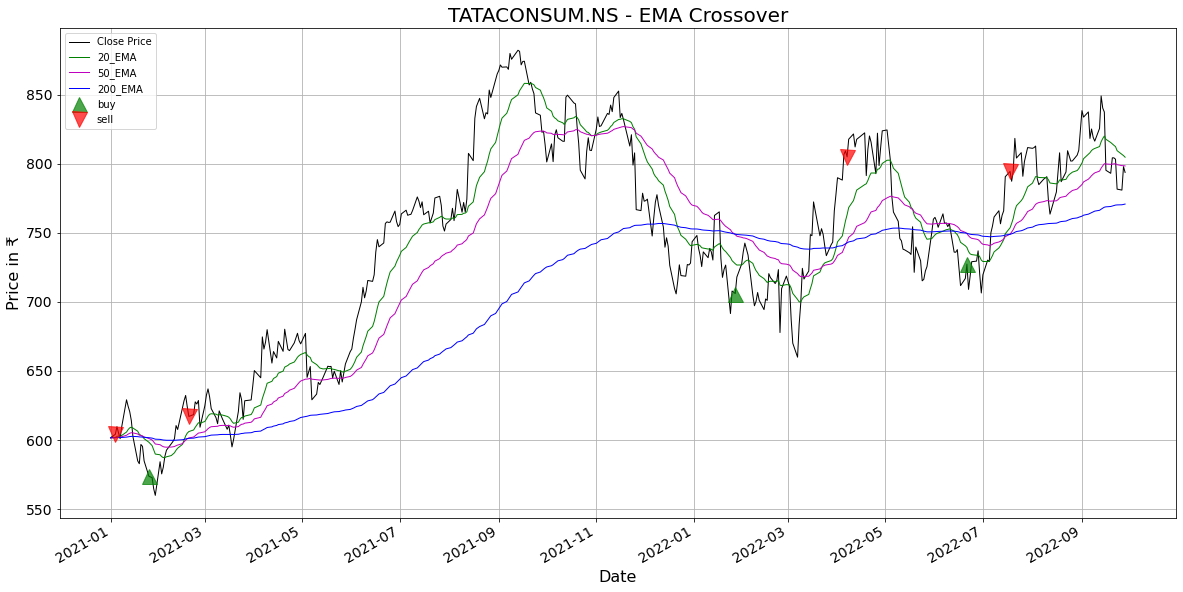

TATACONSUM.NS
+---------------------+---------------+----------+----------+-----------+----------+------------+
| Date                |   Close Price |   20_EMA |   50_EMA |   200_EMA |   Signal | Position   |
|---------------------+---------------+----------+----------+-----------+----------+------------|
| 2021-01-04 00:00:00 |        604    |  601.738 |  601.598 |   601.525 |       -1 | Sell       |
| 2021-01-25 00:00:00 |        573.6  |  598.262 |  600.999 |   601.551 |        1 | Buy        |
| 2021-02-19 00:00:00 |        616.95 |  605.988 |  601.392 |   601.07  |       -1 | Sell       |
| 2022-01-27 00:00:00 |        705.95 |  727.49  |  748.639 |   748.987 |        1 | Buy        |
| 2022-04-07 00:00:00 |        804.9  |  763.004 |  743.756 |   742.556 |       -1 | Sell       |
| 2022-06-21 00:00:00 |        727.25 |  739.259 |  749.357 |   749.6   |        1 | Buy        |
| 2022-07-18 00:00:00 |        794.35 |  753.546 |  748.992 |   748.787 |       -1 | Sell       |
+-----

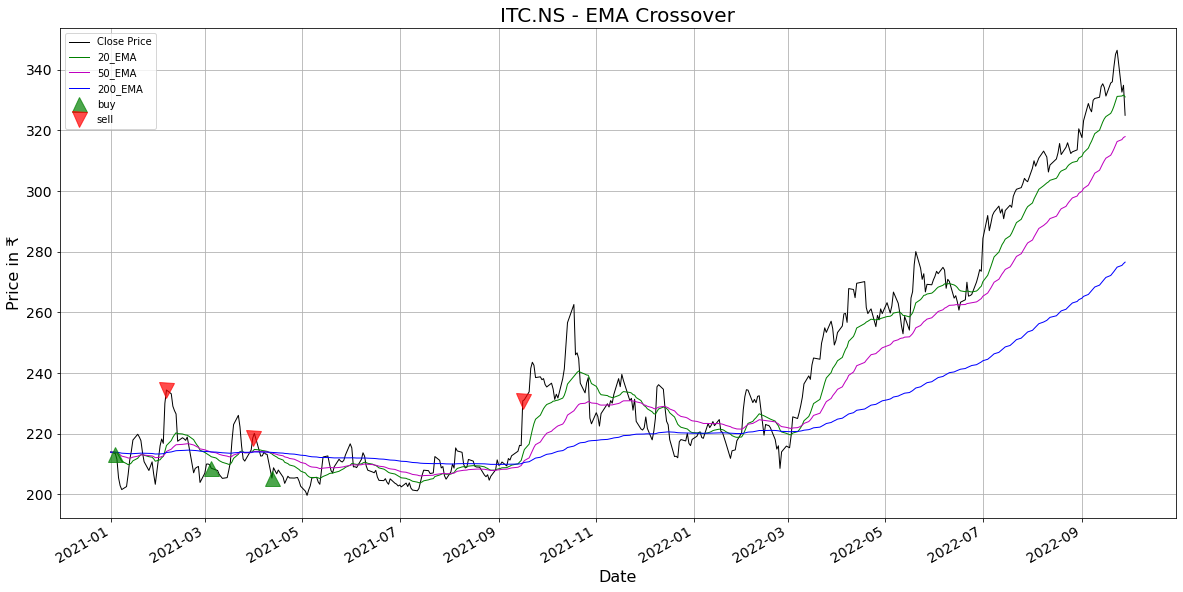

ITC.NS
+---------------------+---------------+----------+----------+-----------+----------+------------+
| Date                |   Close Price |   20_EMA |   50_EMA |   200_EMA |   Signal | Position   |
|---------------------+---------------+----------+----------+-----------+----------+------------|
| 2021-01-04 00:00:00 |        213.4  |  213.807 |  213.832 |   213.846 |        1 | Buy        |
| 2021-02-05 00:00:00 |        234.35 |  216.043 |  214.089 |   213.725 |       -1 | Sell       |
| 2021-03-05 00:00:00 |        208.55 |  212.344 |  213.867 |   213.93  |        1 | Buy        |
| 2021-03-31 00:00:00 |        218.5  |  214.198 |  213.872 |   213.852 |       -1 | Sell       |
| 2021-04-12 00:00:00 |        205.3  |  213.266 |  213.589 |   213.787 |        1 | Buy        |
| 2021-09-16 00:00:00 |        230.75 |  212.973 |  210.256 |   210.252 |       -1 | Sell       |
+---------------------+---------------+----------+----------+-----------+----------+------------+
[************

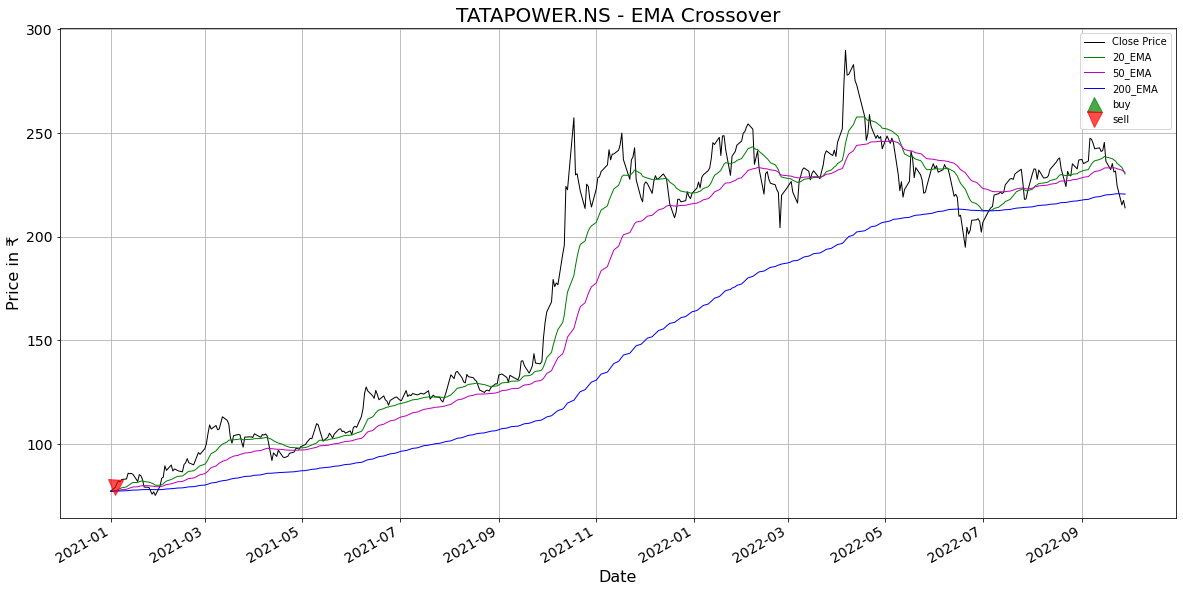

TATAPOWER.NS
+---------------------+---------------+----------+----------+-----------+----------+------------+
| Date                |   Close Price |   20_EMA |   50_EMA |   200_EMA |   Signal | Position   |
|---------------------+---------------+----------+----------+-----------+----------+------------|
| 2021-01-04 00:00:00 |         79.25 |   77.531 |  77.4245 |   77.3689 |       -1 | Sell       |
+---------------------+---------------+----------+----------+-----------+----------+------------+
[*********************100%***********************]  1 of 1 completed


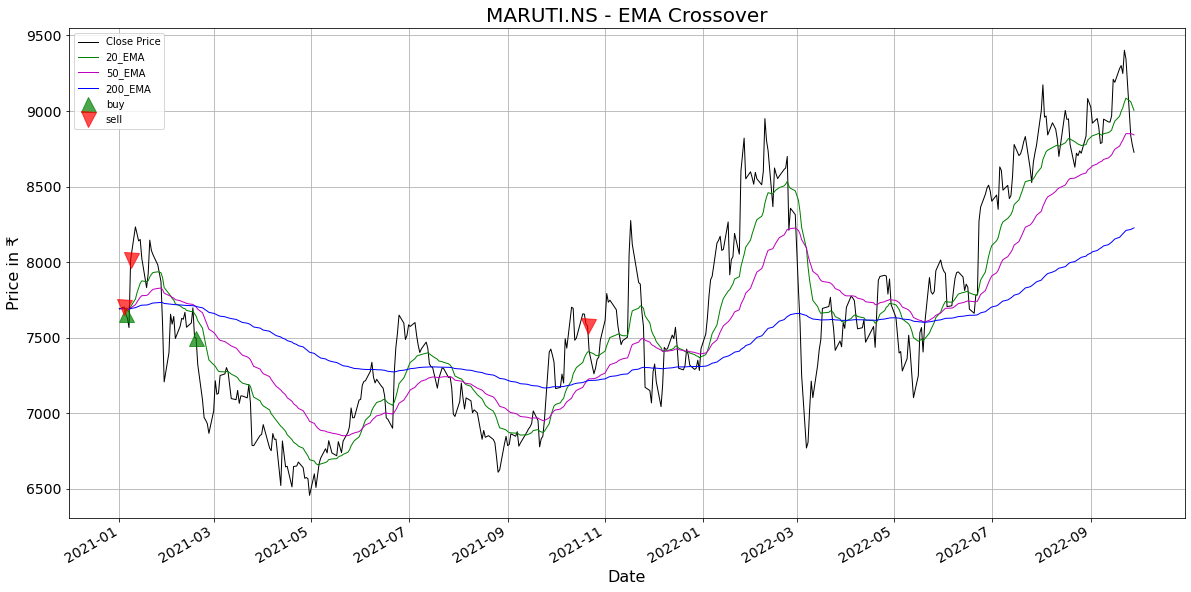

MARUTI.NS
+---------------------+---------------+----------+----------+-----------+----------+------------+
| Date                |   Close Price |   20_EMA |   50_EMA |   200_EMA |   Signal | Position   |
|---------------------+---------------+----------+----------+-----------+----------+------------|
| 2021-01-04 00:00:00 |       7702.3  |  7692.35 |  7691.73 |   7691.41 |       -1 | Sell       |
| 2021-01-05 00:00:00 |       7655.45 |  7688.83 |  7690.31 |   7691.05 |        1 | Buy        |
| 2021-01-08 00:00:00 |       8014.9  |  7704.61 |  7696.12 |   7692.43 |       -1 | Sell       |
| 2021-02-18 00:00:00 |       7497.55 |  7642.7  |  7702.98 |   7707.09 |        1 | Buy        |
| 2021-10-21 00:00:00 |       7575.25 |  7405.22 |  7219.71 |   7214.19 |       -1 | Sell       |
+---------------------+---------------+----------+----------+-----------+----------+------------+
[*********************100%***********************]  1 of 1 completed


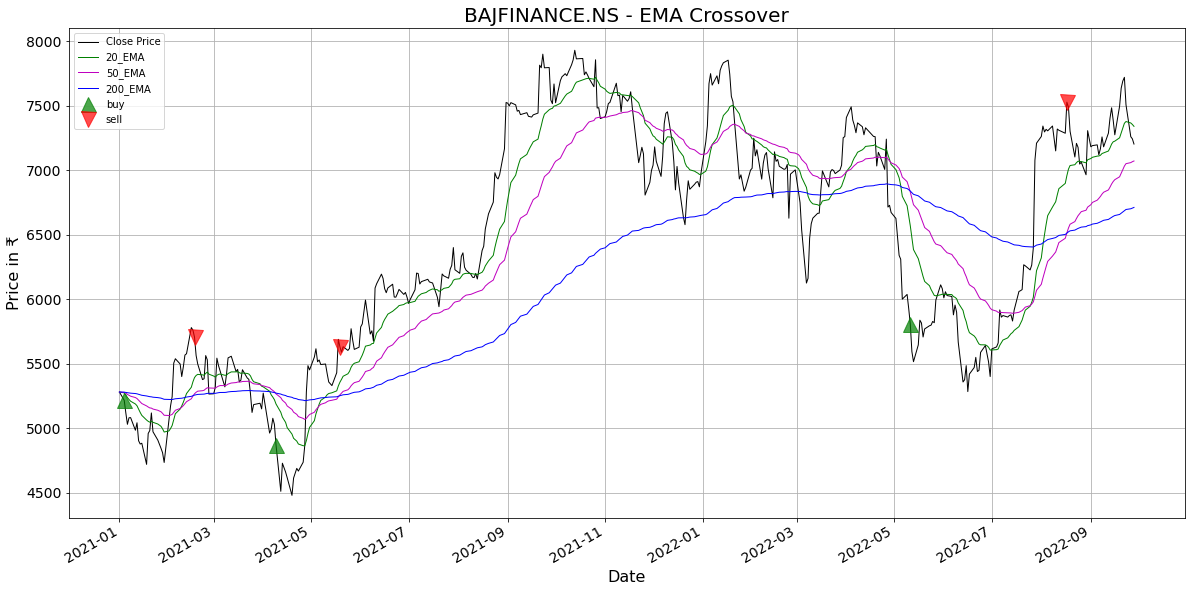

BAJFINANCE.NS
+---------------------+---------------+----------+----------+-----------+----------+------------+
| Date                |   Close Price |   20_EMA |   50_EMA |   200_EMA |   Signal | Position   |
|---------------------+---------------+----------+----------+-----------+----------+------------|
| 2021-01-04 00:00:00 |       5216.2  |  5274.06 |  5277.64 |   5279.51 |        1 | Buy        |
| 2021-02-17 00:00:00 |       5705.15 |  5392.58 |  5266.94 |   5256.63 |       -1 | Sell       |
| 2021-04-09 00:00:00 |       4872.3  |  5187.9  |  5266.45 |   5272.25 |        1 | Buy        |
| 2021-05-19 00:00:00 |       5631.2  |  5356.46 |  5258.44 |   5251.86 |       -1 | Sell       |
| 2022-05-11 00:00:00 |       5807    |  6568.73 |  6830.54 |   6838.14 |        1 | Buy        |
| 2022-08-17 00:00:00 |       7527.1  |  6957.48 |  6513.48 |   6512.33 |       -1 | Sell       |
+---------------------+---------------+----------+----------+-----------+----------+------------+
[*****

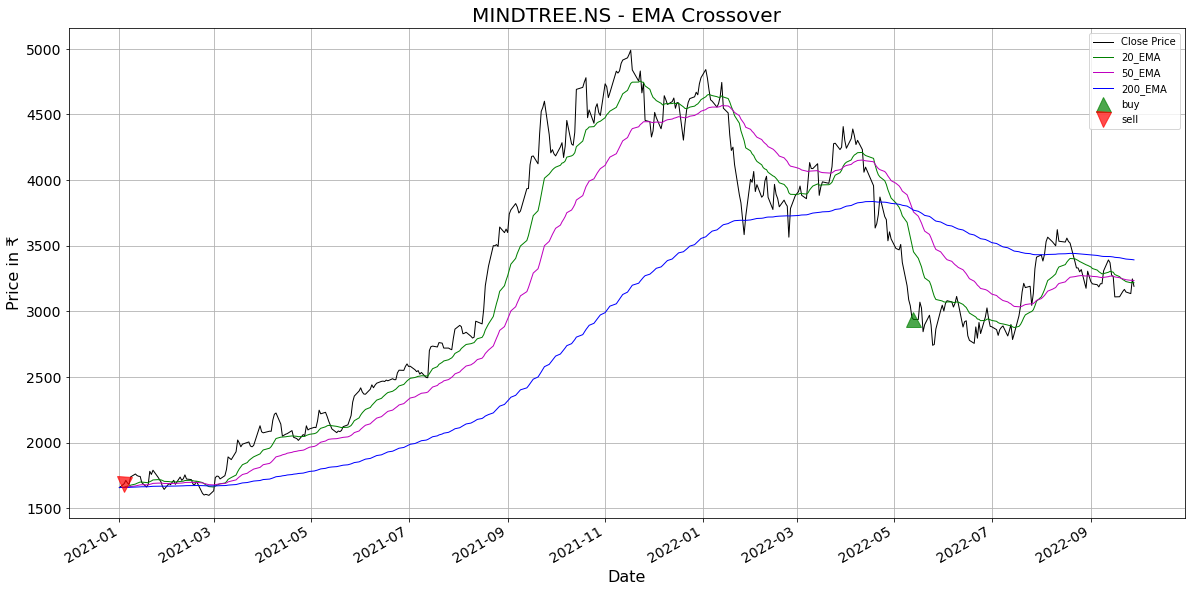

MINDTREE.NS
+---------------------+---------------+----------+----------+-----------+----------+------------+
| Date                |   Close Price |   20_EMA |   50_EMA |   200_EMA |   Signal | Position   |
|---------------------+---------------+----------+----------+-----------+----------+------------|
| 2021-01-04 00:00:00 |       1689.2  |  1662.1  |  1660.42 |   1659.55 |       -1 | Sell       |
| 2022-05-13 00:00:00 |       2938.95 |  3454.16 |  3757.59 |   3771.3  |        1 | Buy        |
+---------------------+---------------+----------+----------+-----------+----------+------------+
[*********************100%***********************]  1 of 1 completed


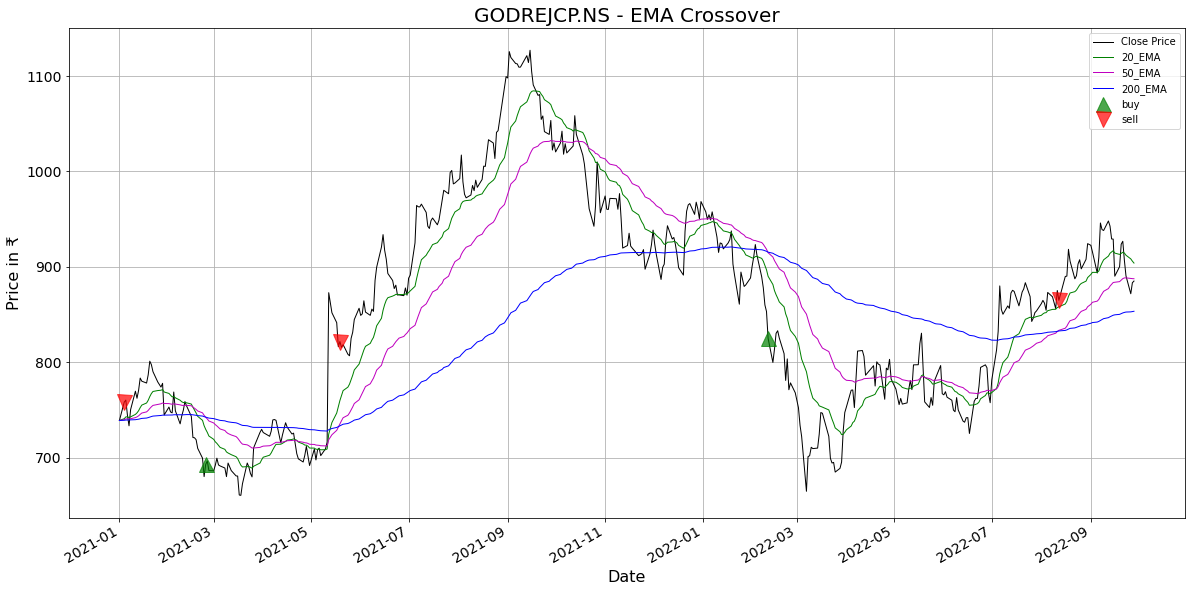

GODREJCP.NS
+---------------------+---------------+----------+----------+-----------+----------+------------+
| Date                |   Close Price |   20_EMA |   50_EMA |   200_EMA |   Signal | Position   |
|---------------------+---------------+----------+----------+-----------+----------+------------|
| 2021-01-04 00:00:00 |        758.1  |  740.774 |  739.701 |   739.141 |       -1 | Sell       |
| 2021-02-24 00:00:00 |        692.9  |  729.6   |  742.297 |   742.436 |        1 | Buy        |
| 2021-05-19 00:00:00 |        821.65 |  759.857 |  735.524 |   733.354 |       -1 | Sell       |
| 2022-02-11 00:00:00 |        825    |  890.027 |  914.737 |   915.328 |        1 | Buy        |
| 2022-08-12 00:00:00 |        864.8  |  858.016 |  833.401 |   832.747 |       -1 | Sell       |
+---------------------+---------------+----------+----------+-----------+----------+------------+
[*********************100%***********************]  1 of 1 completed


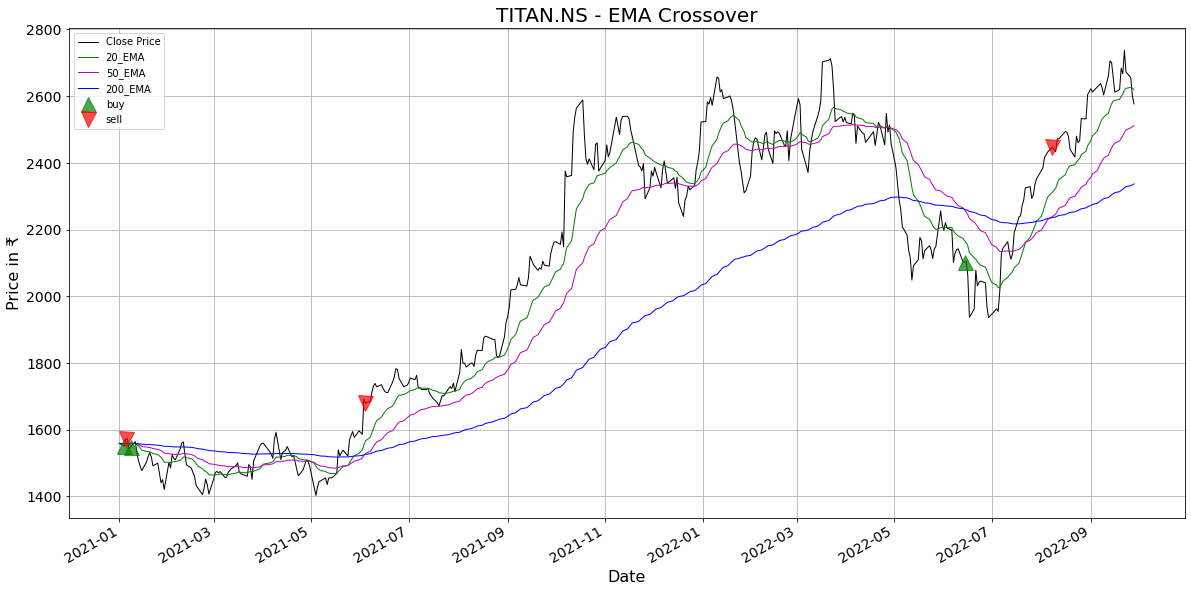

TITAN.NS
+---------------------+---------------+----------+----------+-----------+----------+------------+
| Date                |   Close Price |   20_EMA |   50_EMA |   200_EMA |   Signal | Position   |
|---------------------+---------------+----------+----------+-----------+----------+------------|
| 2021-01-04 00:00:00 |       1550.9  |  1557.87 |  1558.3  |   1558.52 |        1 | Buy        |
| 2021-01-05 00:00:00 |       1570.95 |  1559.11 |  1558.79 |   1558.65 |       -1 | Sell       |
| 2021-01-08 00:00:00 |       1548.6  |  1557.72 |  1558.27 |   1558.52 |        1 | Buy        |
| 2021-06-04 00:00:00 |       1679.5  |  1566.04 |  1528.37 |   1526.03 |       -1 | Sell       |
| 2022-06-14 00:00:00 |       2102    |  2166.47 |  2258.51 |   2260.97 |        1 | Buy        |
| 2022-08-08 00:00:00 |       2446.95 |  2311.98 |  2238.69 |   2235.75 |       -1 | Sell       |
+---------------------+---------------+----------+----------+-----------+----------+------------+
[**********

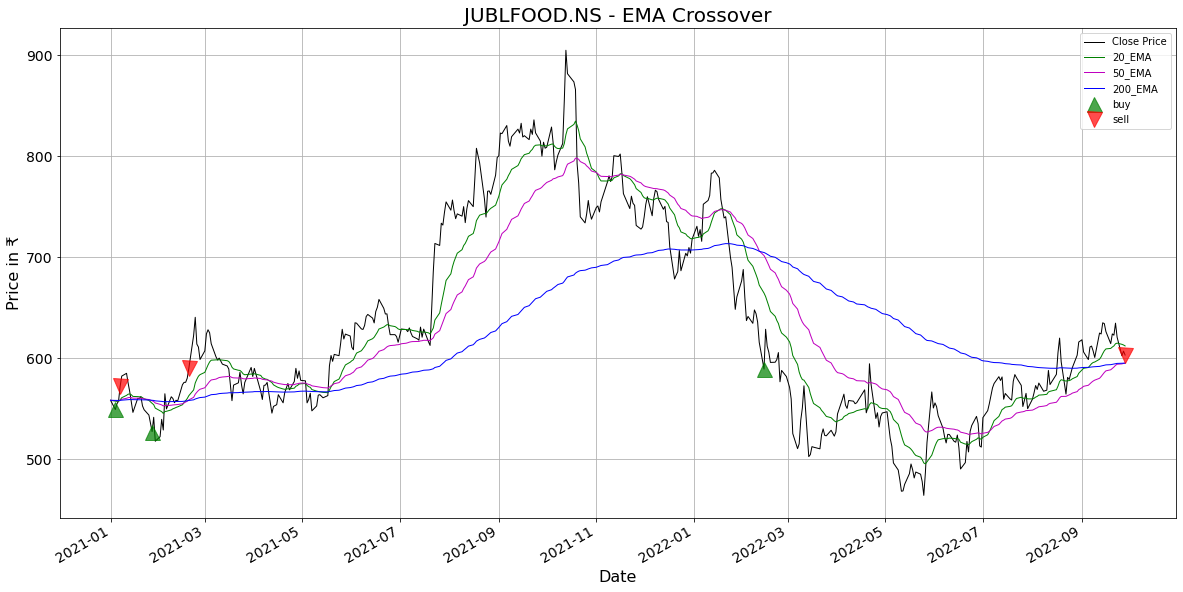

JUBLFOOD.NS
+---------------------+---------------+----------+----------+-----------+----------+------------+
| Date                |   Close Price |   20_EMA |   50_EMA |   200_EMA |   Signal | Position   |
|---------------------+---------------+----------+----------+-----------+----------+------------|
| 2021-01-04 00:00:00 |        549.46 |  557.693 |  558.203 |   558.469 |        1 | Buy        |
| 2021-01-07 00:00:00 |        572.41 |  558.897 |  558.631 |   558.568 |       -1 | Sell       |
| 2021-01-27 00:00:00 |        527.63 |  555.58  |  558.077 |   558.594 |        1 | Buy        |
| 2021-02-19 00:00:00 |        590.25 |  563.166 |  558.982 |   558.389 |       -1 | Sell       |
| 2022-02-14 00:00:00 |        589.54 |  664.724 |  701.898 |   704.899 |        1 | Buy        |
| 2022-09-28 00:00:00 |        603.4  |  612.405 |  595.419 |   595.379 |       -1 | Sell       |
+---------------------+---------------+----------+----------+-----------+----------+------------+
[*******

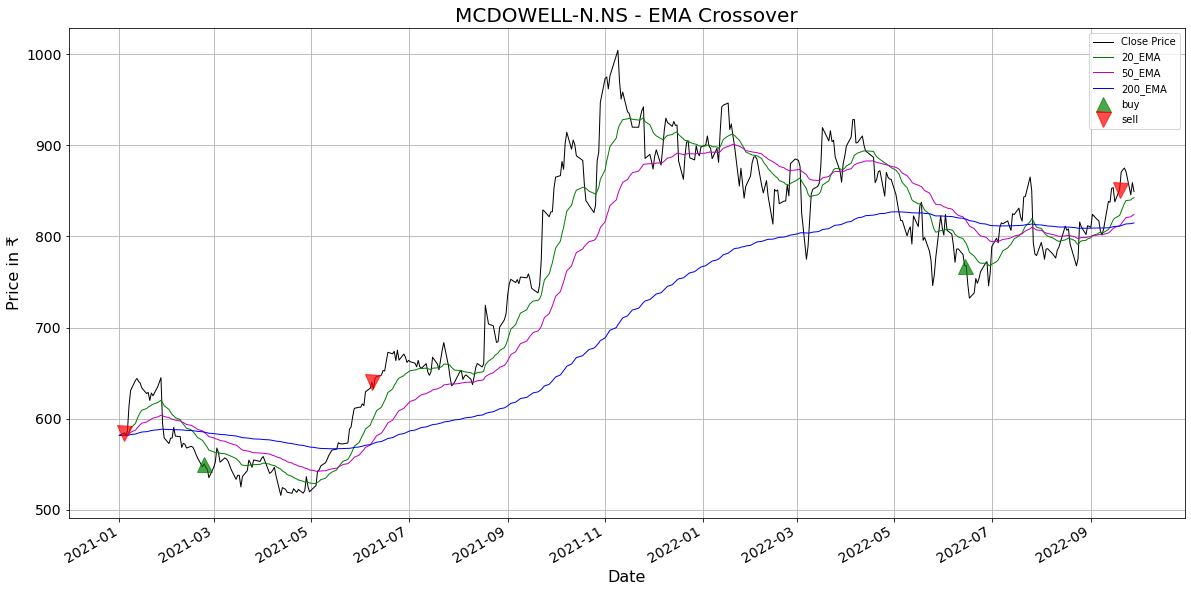

MCDOWELL-N.NS
+---------------------+---------------+----------+----------+-----------+----------+------------+
| Date                |   Close Price |   20_EMA |   50_EMA |   200_EMA |   Signal | Position   |
|---------------------+---------------+----------+----------+-----------+----------+------------|
| 2021-01-04 00:00:00 |        584.35 |  581.771 |  581.612 |   581.528 |       -1 | Sell       |
| 2021-02-23 00:00:00 |        550.4  |  573.595 |  585.049 |   585.164 |        1 | Buy        |
| 2021-06-08 00:00:00 |        639.95 |  597.276 |  573.648 |   572.006 |       -1 | Sell       |
| 2022-06-14 00:00:00 |        767.95 |  794.796 |  819.42  |   819.462 |        1 | Buy        |
| 2022-09-19 00:00:00 |        851.35 |  823.099 |  811.644 |   811.368 |       -1 | Sell       |
+---------------------+---------------+----------+----------+-----------+----------+------------+
[*********************100%***********************]  1 of 1 completed


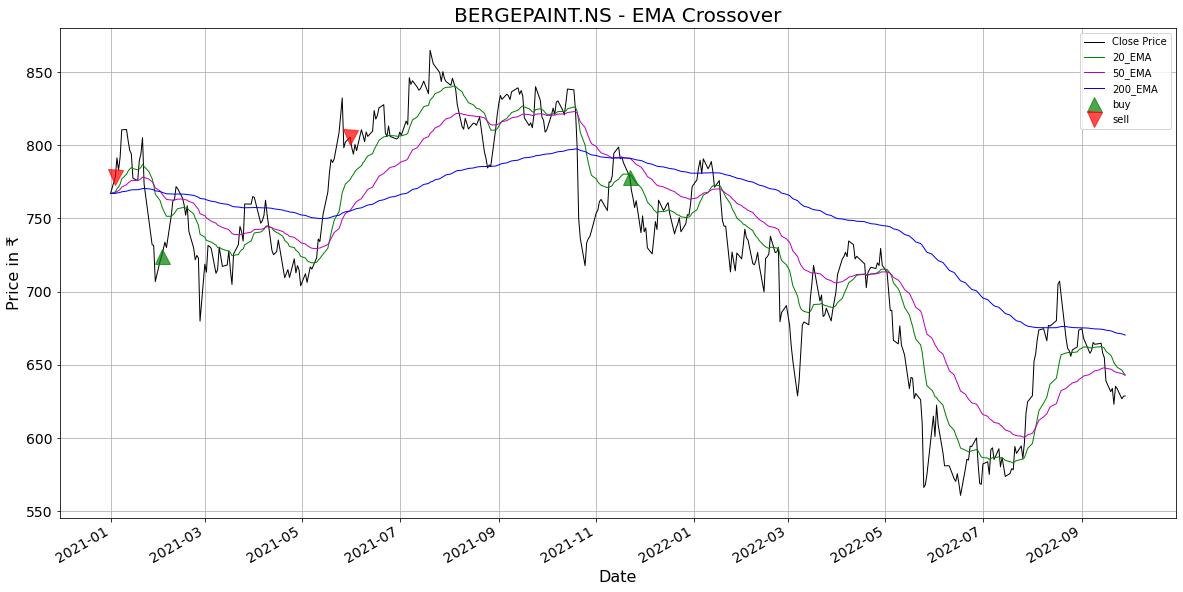

BERGEPAINT.NS
+---------------------+---------------+----------+----------+-----------+----------+------------+
| Date                |   Close Price |   20_EMA |   50_EMA |   200_EMA |   Signal | Position   |
|---------------------+---------------+----------+----------+-----------+----------+------------|
| 2021-01-04 00:00:00 |        778.5  |  768.14  |  767.499 |   767.164 |       -1 | Sell       |
| 2021-02-02 00:00:00 |        724.45 |  758.642 |  767.111 |   767.959 |        1 | Buy        |
| 2021-05-31 00:00:00 |        805.55 |  776.596 |  755.428 |   755.082 |       -1 | Sell       |
| 2021-11-22 00:00:00 |        778.4  |  780.157 |  791.102 |   791.174 |        1 | Buy        |
+---------------------+---------------+----------+----------+-----------+----------+------------+
[*********************100%***********************]  1 of 1 completed


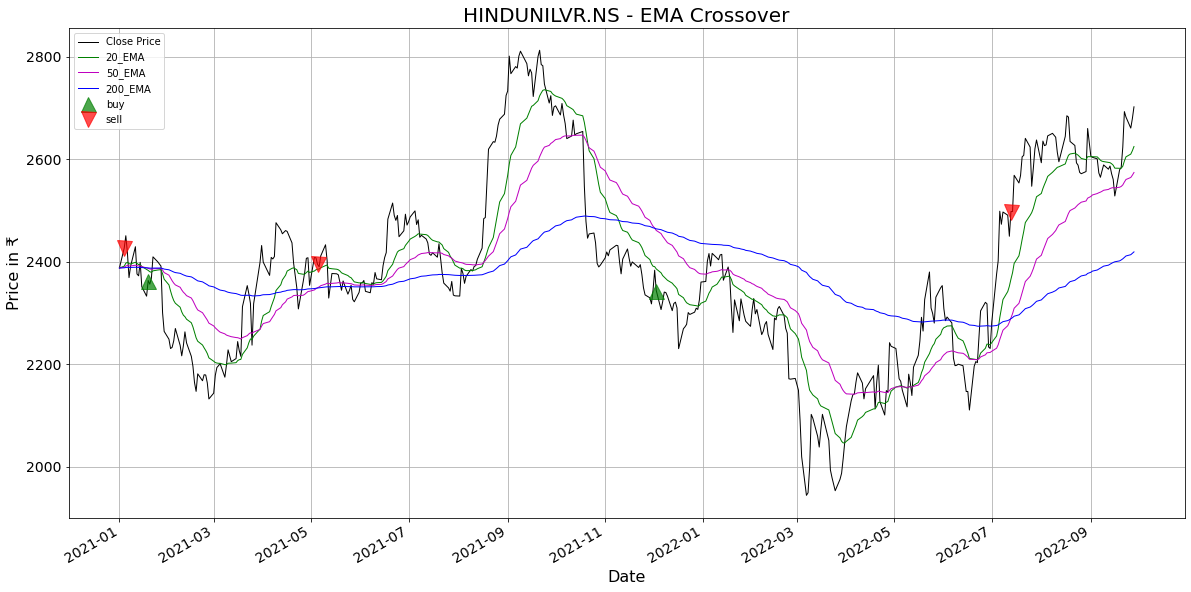

HINDUNILVR.NS
+---------------------+---------------+----------+----------+-----------+----------+------------+
| Date                |   Close Price |   20_EMA |   50_EMA |   200_EMA |   Signal | Position   |
|---------------------+---------------+----------+----------+-----------+----------+------------|
| 2021-01-04 00:00:00 |       2426.5  |  2391.26 |  2389.08 |   2387.94 |       -1 | Sell       |
| 2021-01-19 00:00:00 |       2363.15 |  2382.92 |  2387.02 |   2387.7  |        1 | Buy        |
| 2021-05-05 00:00:00 |       2394.65 |  2385.12 |  2349.06 |   2348.54 |       -1 | Sell       |
| 2021-12-03 00:00:00 |       2343.65 |  2385.79 |  2460.86 |   2463.97 |        1 | Buy        |
| 2022-07-13 00:00:00 |       2497.75 |  2365.82 |  2290.32 |   2288.69 |       -1 | Sell       |
+---------------------+---------------+----------+----------+-----------+----------+------------+
[*********************100%***********************]  1 of 1 completed


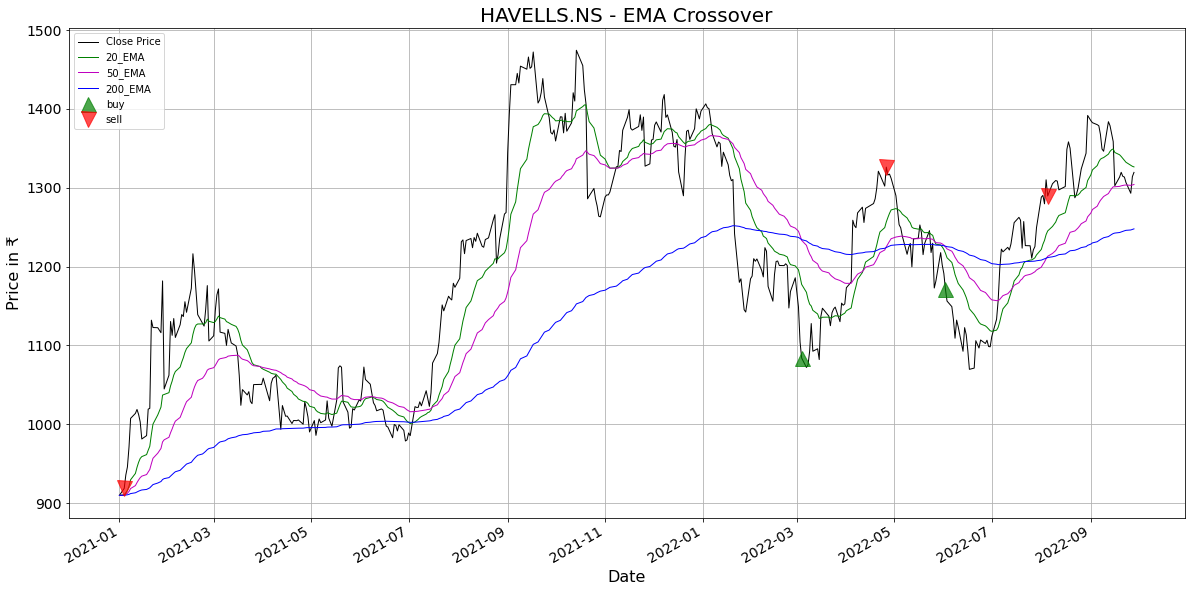

HAVELLS.NS
+---------------------+---------------+----------+----------+-----------+----------+------------+
| Date                |   Close Price |   20_EMA |   50_EMA |   200_EMA |   Signal | Position   |
|---------------------+---------------+----------+----------+-----------+----------+------------|
| 2021-01-04 00:00:00 |        918.8  |  910.748 |  910.249 |   909.989 |       -1 | Sell       |
| 2022-03-04 00:00:00 |       1084    | 1177.31  | 1233.18  |  1234.04  |        1 | Buy        |
| 2022-04-26 00:00:00 |       1325.95 | 1256.59  | 1225.05  |  1224.1   |       -1 | Sell       |
| 2022-06-02 00:00:00 |       1171.2  | 1216.84  | 1224.95  |  1225.82  |        1 | Buy        |
| 2022-08-05 00:00:00 |       1289.4  | 1245.07  | 1212.96  |  1211.38  |       -1 | Sell       |
+---------------------+---------------+----------+----------+-----------+----------+------------+
[*********************100%***********************]  1 of 1 completed


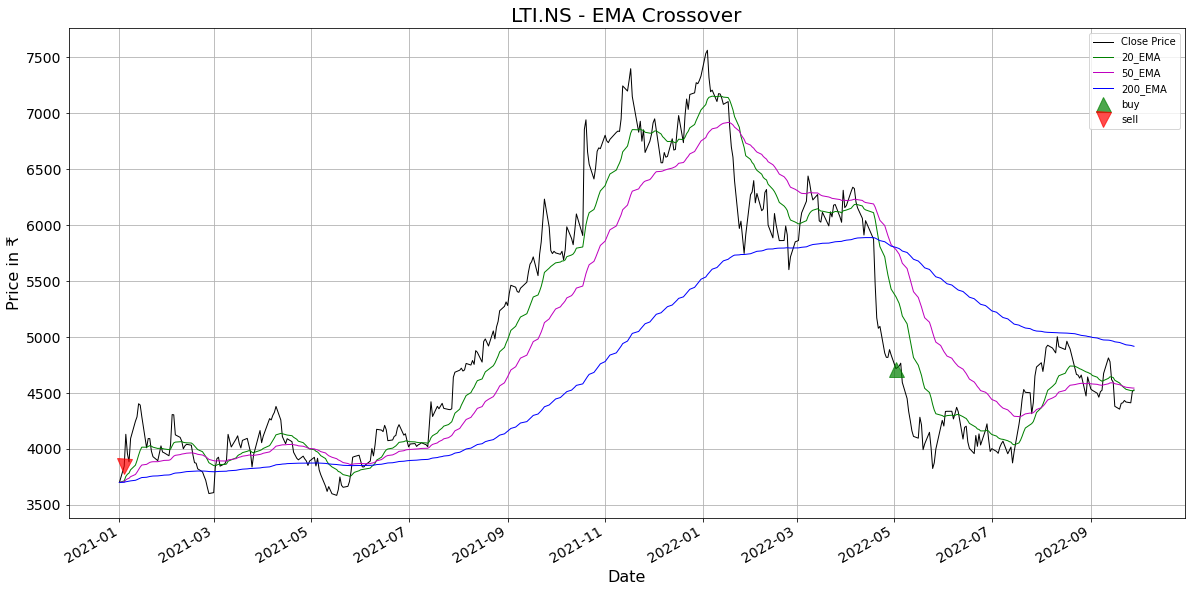

LTI.NS
+---------------------+---------------+----------+----------+-----------+----------+------------+
| Date                |   Close Price |   20_EMA |   50_EMA |   200_EMA |   Signal | Position   |
|---------------------+---------------+----------+----------+-----------+----------+------------|
| 2021-01-04 00:00:00 |       3845.35 |  3713.21 |  3705.03 |   3700.75 |       -1 | Sell       |
| 2022-05-02 00:00:00 |       4716.65 |  5359.62 |  5780.96 |   5800.03 |        1 | Buy        |
+---------------------+---------------+----------+----------+-----------+----------+------------+
[*********************100%***********************]  1 of 1 completed


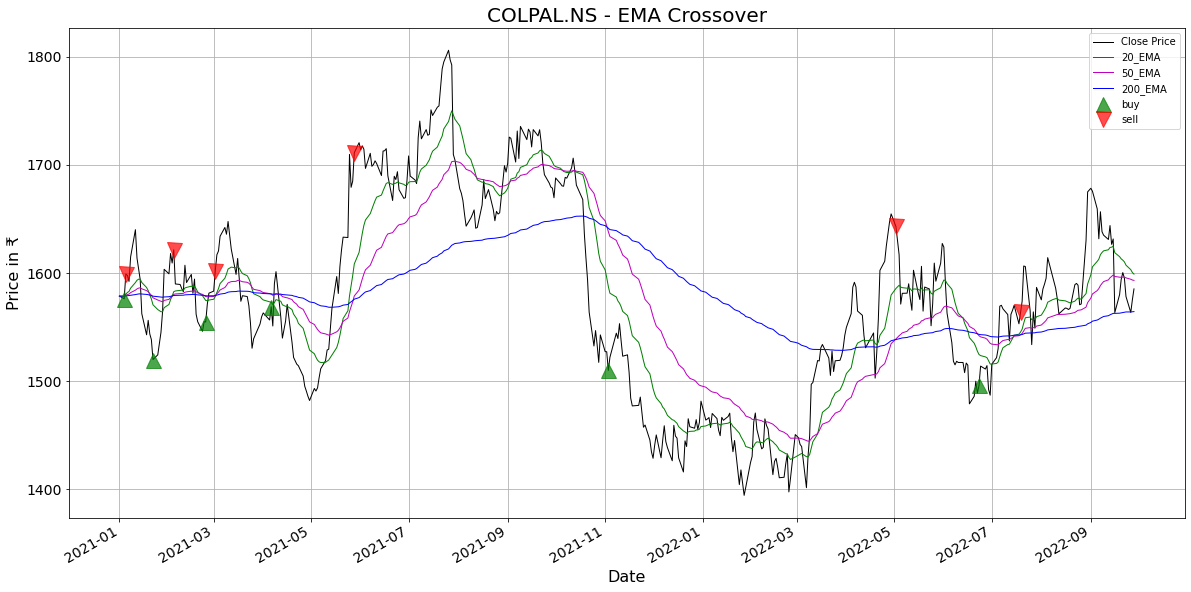

COLPAL.NS
+---------------------+---------------+----------+----------+-----------+----------+------------+
| Date                |   Close Price |   20_EMA |   50_EMA |   200_EMA |   Signal | Position   |
|---------------------+---------------+----------+----------+-----------+----------+------------|
| 2021-01-04 00:00:00 |       1576.1  |  1578.23 |  1578.36 |   1578.43 |        1 | Buy        |
| 2021-01-05 00:00:00 |       1598.95 |  1580.2  |  1579.17 |   1578.63 |       -1 | Sell       |
| 2021-01-22 00:00:00 |       1519.8  |  1570.47 |  1576.96 |   1578.45 |        1 | Buy        |
| 2021-02-04 00:00:00 |       1621.4  |  1582.58 |  1580.08 |   1579.05 |       -1 | Sell       |
| 2021-02-24 00:00:00 |       1554.55 |  1574.5  |  1578.13 |   1578.83 |        1 | Buy        |
| 2021-03-02 00:00:00 |       1602.15 |  1578.14 |  1579.12 |   1579.05 |       -1 | Sell       |
| 2021-04-06 00:00:00 |       1568.6  |  1572.76 |  1580.35 |   1580.55 |        1 | Buy        |
| 2021-05-

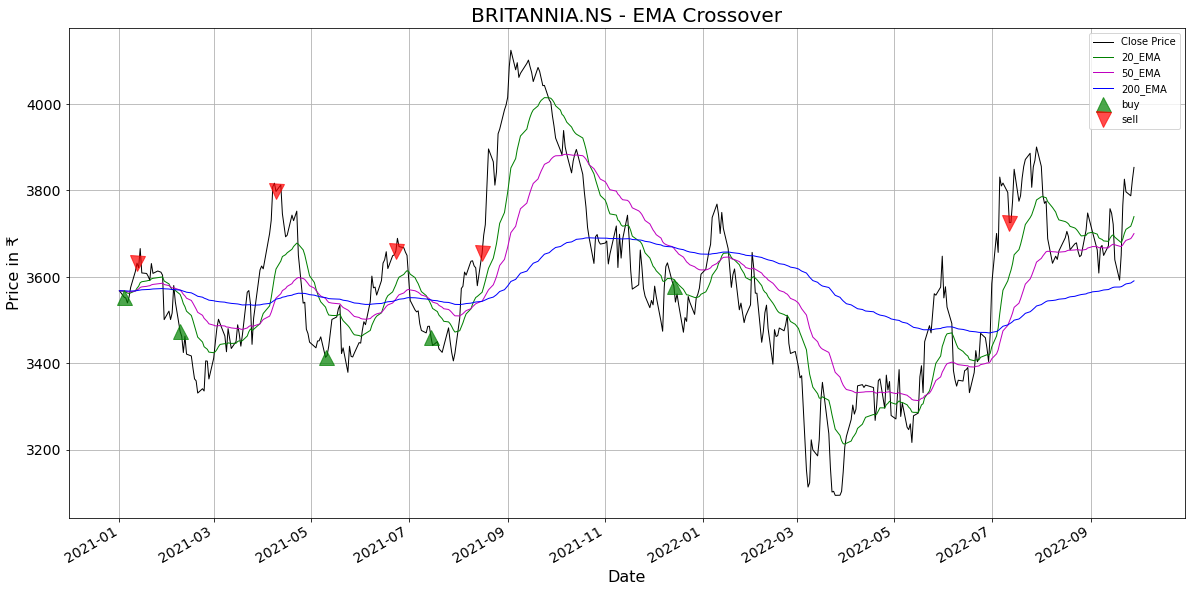

BRITANNIA.NS
+---------------------+---------------+----------+----------+-----------+----------+------------+
| Date                |   Close Price |   20_EMA |   50_EMA |   200_EMA |   Signal | Position   |
|---------------------+---------------+----------+----------+-----------+----------+------------|
| 2021-01-04 00:00:00 |       3552.9  |  3566.38 |  3567.22 |   3567.65 |        1 | Buy        |
| 2021-01-12 00:00:00 |       3631.65 |  3573.75 |  3569.81 |   3568.24 |       -1 | Sell       |
| 2021-02-08 00:00:00 |       3473.7  |  3559.35 |  3569.4  |   3569.44 |        1 | Buy        |
| 2021-04-09 00:00:00 |       3797.7  |  3618.02 |  3550.62 |   3548.35 |       -1 | Sell       |
| 2021-05-10 00:00:00 |       3413.8  |  3529.94 |  3550.15 |   3552.04 |        1 | Buy        |
| 2021-06-23 00:00:00 |       3659.3  |  3581.59 |  3548.41 |   3545.6  |       -1 | Sell       |
| 2021-07-15 00:00:00 |       3460.85 |  3535.95 |  3545.83 |   3546.73 |        1 | Buy        |
| 2021-

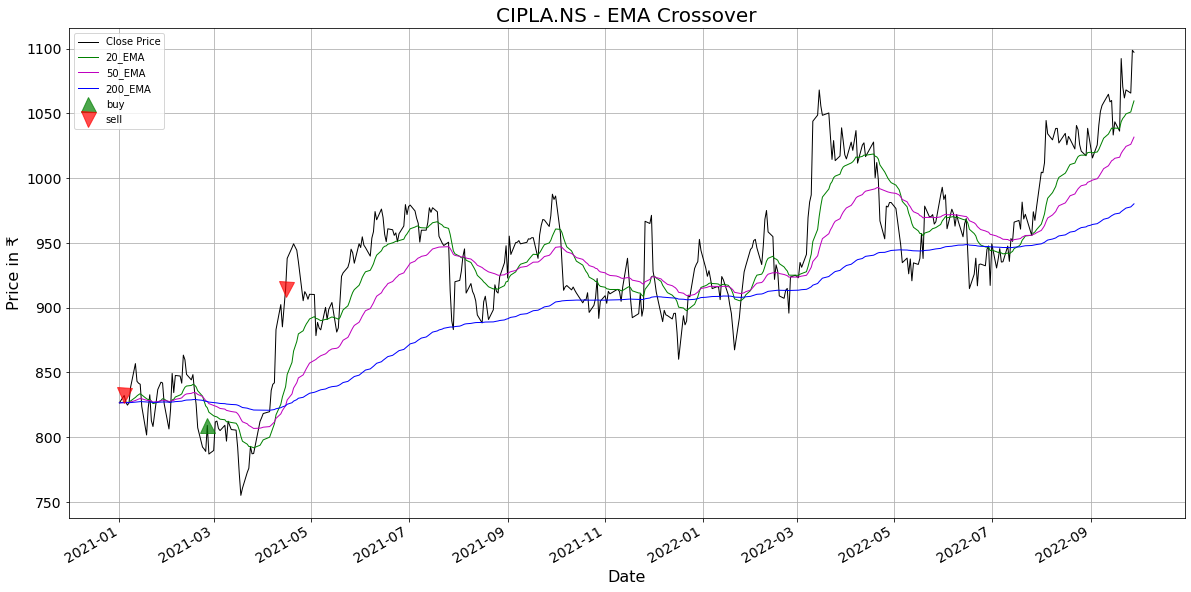

CIPLA.NS
+---------------------+---------------+----------+----------+-----------+----------+------------+
| Date                |   Close Price |   20_EMA |   50_EMA |   200_EMA |   Signal | Position   |
|---------------------+---------------+----------+----------+-----------+----------+------------|
| 2021-01-04 00:00:00 |        832.25 |  827.138 |  826.822 |   826.656 |       -1 | Sell       |
| 2021-02-25 00:00:00 |        809.15 |  822.734 |  827.547 |   827.561 |        1 | Buy        |
| 2021-04-15 00:00:00 |        914.2  |  839.014 |  824.335 |   824.331 |       -1 | Sell       |
+---------------------+---------------+----------+----------+-----------+----------+------------+
[*********************100%***********************]  1 of 1 completed


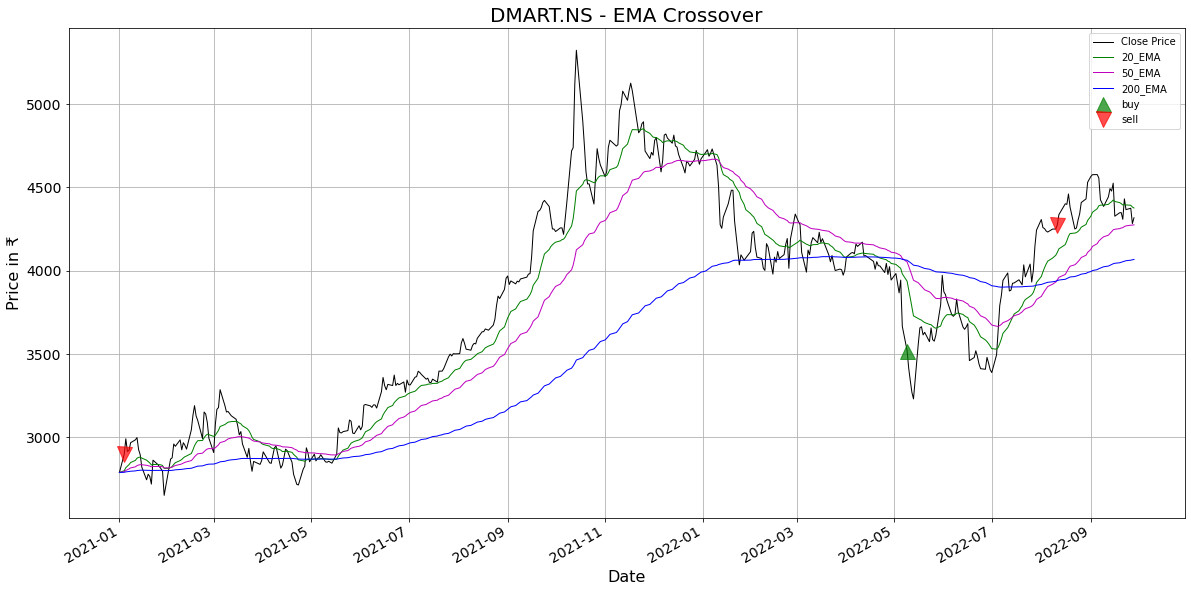

DMART.NS
+---------------------+---------------+----------+----------+-----------+----------+------------+
| Date                |   Close Price |   20_EMA |   50_EMA |   200_EMA |   Signal | Position   |
|---------------------+---------------+----------+----------+-----------+----------+------------|
| 2021-01-04 00:00:00 |       2898.45 |  2799.51 |  2793.39 |   2790.19 |       -1 | Sell       |
| 2022-05-09 00:00:00 |       3520.3  |  3937.34 |  4052.6  |   4062.9  |        1 | Buy        |
| 2022-08-11 00:00:00 |       4274.85 |  4109.75 |  3945.18 |   3940.25 |       -1 | Sell       |
+---------------------+---------------+----------+----------+-----------+----------+------------+
[*********************100%***********************]  1 of 1 completed


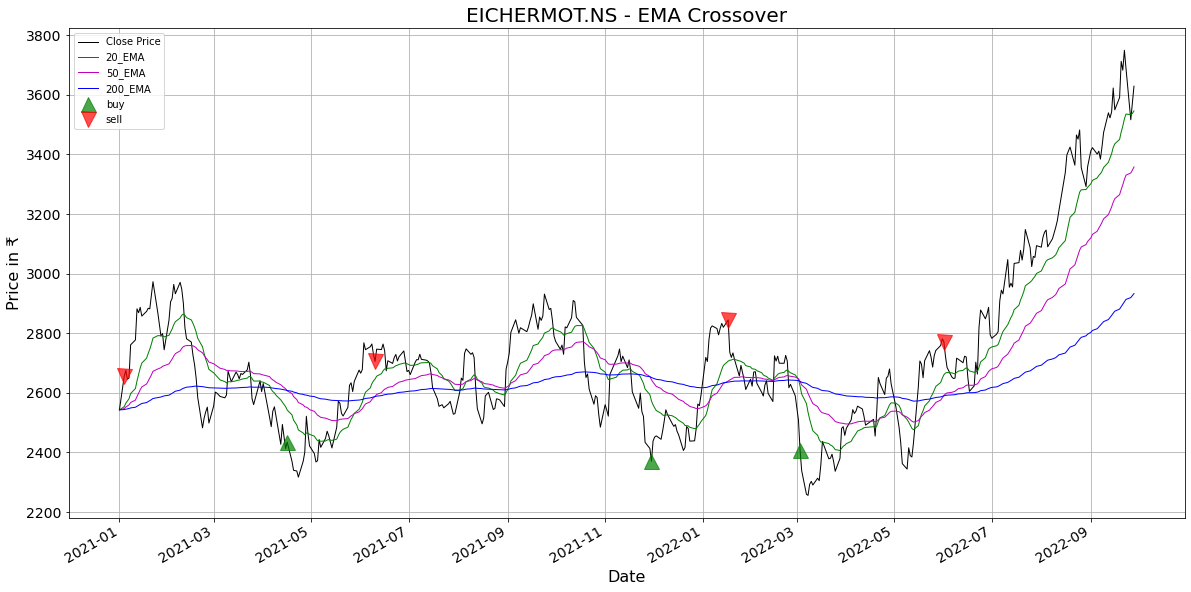

EICHERMOT.NS
+---------------------+---------------+----------+----------+-----------+----------+------------+
| Date                |   Close Price |   20_EMA |   50_EMA |   200_EMA |   Signal | Position   |
|---------------------+---------------+----------+----------+-----------+----------+------------|
| 2021-01-04 00:00:00 |       2655.7  |  2553.46 |  2547.13 |   2543.82 |       -1 | Sell       |
| 2021-04-16 00:00:00 |       2434.85 |  2542.3  |  2606.62 |   2607.55 |        1 | Buy        |
| 2021-06-10 00:00:00 |       2705.05 |  2646.15 |  2588.34 |   2587.27 |       -1 | Sell       |
| 2021-11-30 00:00:00 |       2370.45 |  2572.5  |  2643.53 |   2651.2  |        1 | Buy        |
| 2022-01-17 00:00:00 |       2844.3  |  2706.21 |  2639.21 |   2635.69 |       -1 | Sell       |
| 2022-03-03 00:00:00 |       2409.5  |  2622.96 |  2637.89 |   2638.39 |        1 | Buy        |
| 2022-06-01 00:00:00 |       2771.7  |  2660.26 |  2590.8  |   2589.84 |       -1 | Sell       |
+------

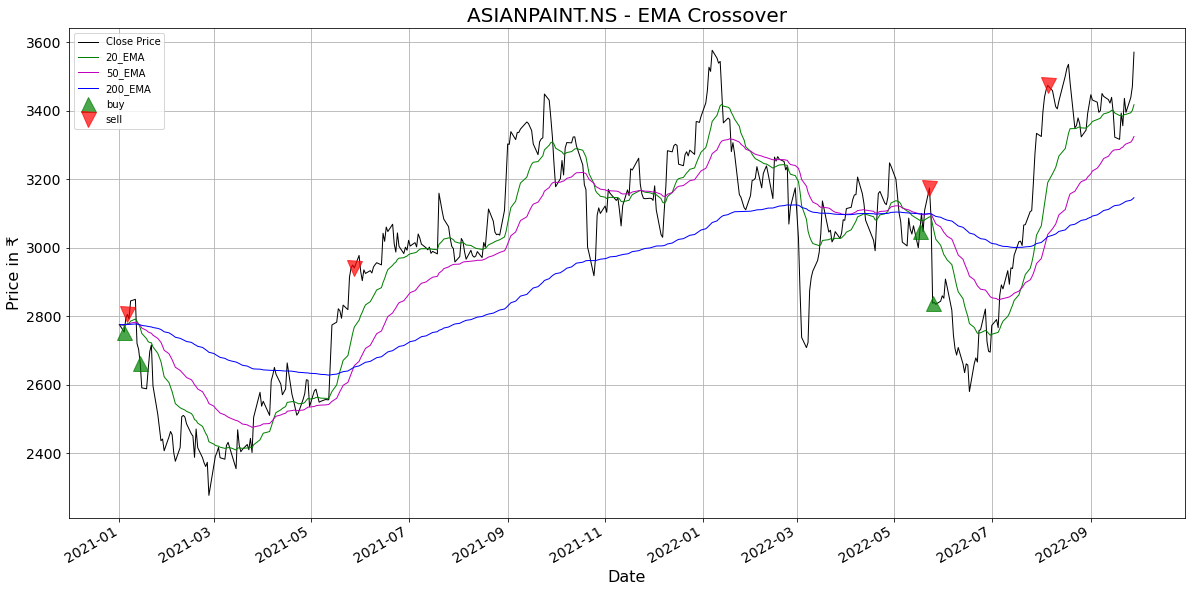

ASIANPAINT.NS
+---------------------+---------------+----------+----------+-----------+----------+------------+
| Date                |   Close Price |   20_EMA |   50_EMA |   200_EMA |   Signal | Position   |
|---------------------+---------------+----------+----------+-----------+----------+------------|
| 2021-01-04 00:00:00 |       2753.7  |  2773.47 |  2774.69 |   2775.33 |        1 | Buy        |
| 2021-01-06 00:00:00 |       2805.35 |  2778.26 |  2776.62 |   2775.81 |       -1 | Sell       |
| 2021-01-14 00:00:00 |       2663.9  |  2766.5  |  2772.72 |   2774.97 |        1 | Buy        |
| 2021-05-28 00:00:00 |       2940.7  |  2768.42 |  2655.79 |   2651.79 |       -1 | Sell       |
| 2022-05-17 00:00:00 |       3050    |  3079.67 |  3097.91 |   3098.8  |        1 | Buy        |
| 2022-05-23 00:00:00 |       3174.2  |  3090.17 |  3099.59 |   3099.17 |       -1 | Sell       |
| 2022-05-25 00:00:00 |       2838.05 |  3065.87 |  3088.85 |   3096.45 |        1 | Buy        |
| 2022

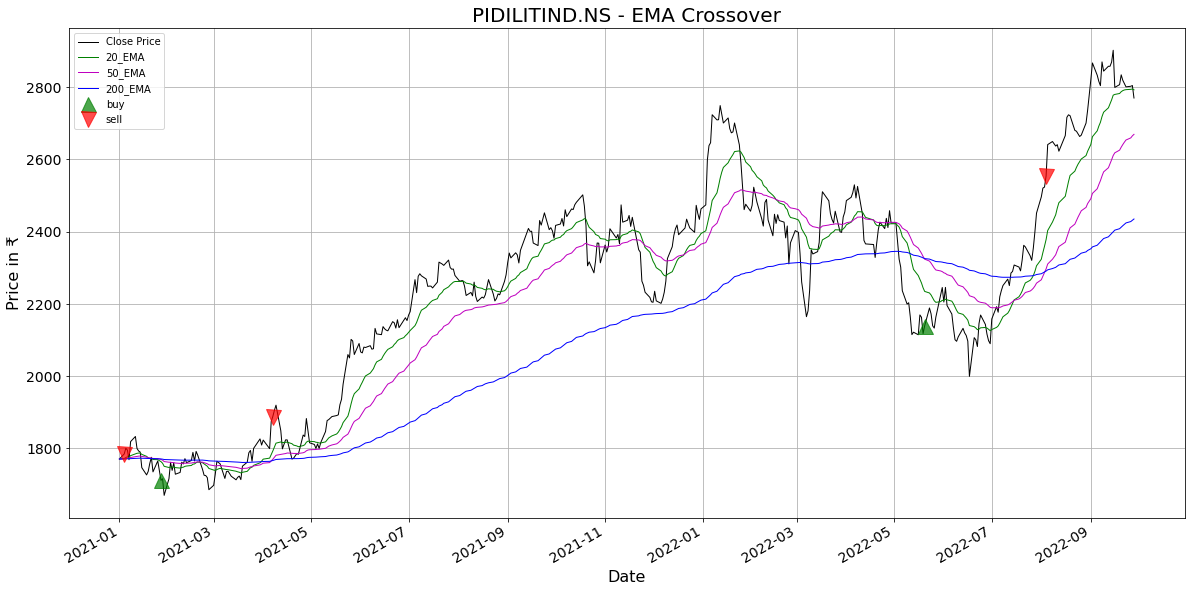

PIDILITIND.NS
+---------------------+---------------+----------+----------+-----------+----------+------------+
| Date                |   Close Price |   20_EMA |   50_EMA |   200_EMA |   Signal | Position   |
|---------------------+---------------+----------+----------+-----------+----------+------------|
| 2021-01-04 00:00:00 |       1784.95 |  1772.15 |  1771.35 |   1770.94 |       -1 | Sell       |
| 2021-01-27 00:00:00 |       1711.9  |  1763.61 |  1769.71 |   1770.98 |        1 | Buy        |
| 2021-04-07 00:00:00 |       1888.4  |  1792.94 |  1770.15 |   1766.65 |       -1 | Sell       |
| 2022-05-20 00:00:00 |       2139.45 |  2234.61 |  2323.84 |   2325.37 |        1 | Buy        |
| 2022-08-04 00:00:00 |       2554.1  |  2378.08 |  2296.91 |   2290.84 |       -1 | Sell       |
+---------------------+---------------+----------+----------+-----------+----------+------------+
[*********************100%***********************]  1 of 1 completed


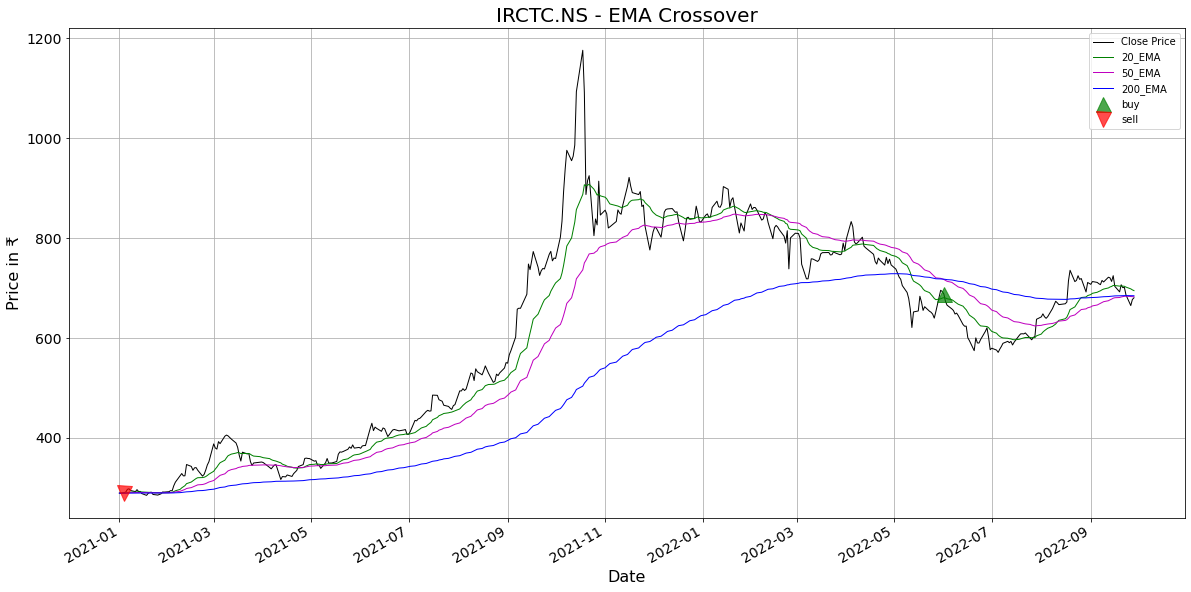

IRCTC.NS
+---------------------+---------------+----------+----------+-----------+----------+------------+
| Date                |   Close Price |   20_EMA |   50_EMA |   200_EMA |   Signal | Position   |
|---------------------+---------------+----------+----------+-----------+----------+------------|
| 2021-01-04 00:00:00 |        290.21 |  289.115 |  289.047 |   289.012 |       -1 | Sell       |
| 2022-06-01 00:00:00 |        687.8  |  680.295 |  716.807 |   717.394 |        1 | Buy        |
+---------------------+---------------+----------+----------+-----------+----------+------------+
[*********************100%***********************]  1 of 1 completed


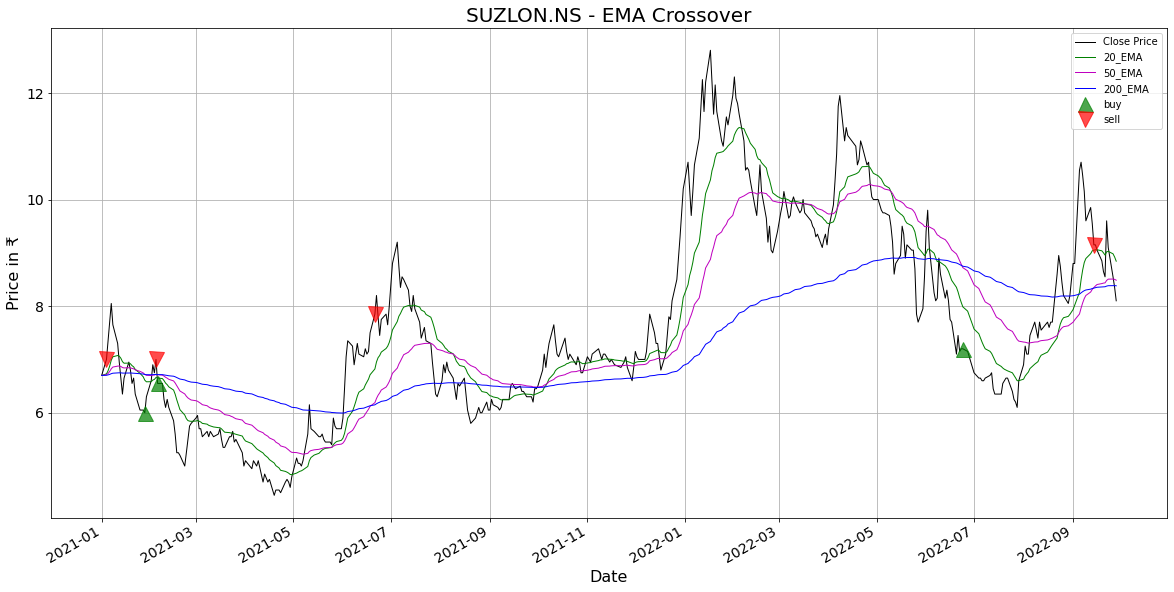

SUZLON.NS
+---------------------+---------------+----------+----------+-----------+----------+------------+
| Date                |   Close Price |   20_EMA |   50_EMA |   200_EMA |   Signal | Position   |
|---------------------+---------------+----------+----------+-----------+----------+------------|
| 2021-01-04 00:00:00 |          7    |  6.72857 |  6.71176 |   6.70298 |       -1 | Sell       |
| 2021-01-28 00:00:00 |          6    |  6.61005 |  6.71823 |   6.71827 |        1 | Buy        |
| 2021-02-04 00:00:00 |          7    |  6.66136 |  6.71897 |   6.71802 |       -1 | Sell       |
| 2021-02-05 00:00:00 |          6.55 |  6.65075 |  6.71234 |   6.71635 |        1 | Buy        |
| 2021-06-21 00:00:00 |          7.85 |  6.82124 |  6.18874 |   6.14832 |       -1 | Sell       |
| 2022-06-24 00:00:00 |          7.2  |  7.98614 |  8.72236 |   8.74875 |        1 | Buy        |
| 2022-09-14 00:00:00 |          9.15 |  9.04871 |  8.34774 |   8.33881 |       -1 | Sell       |
+---------

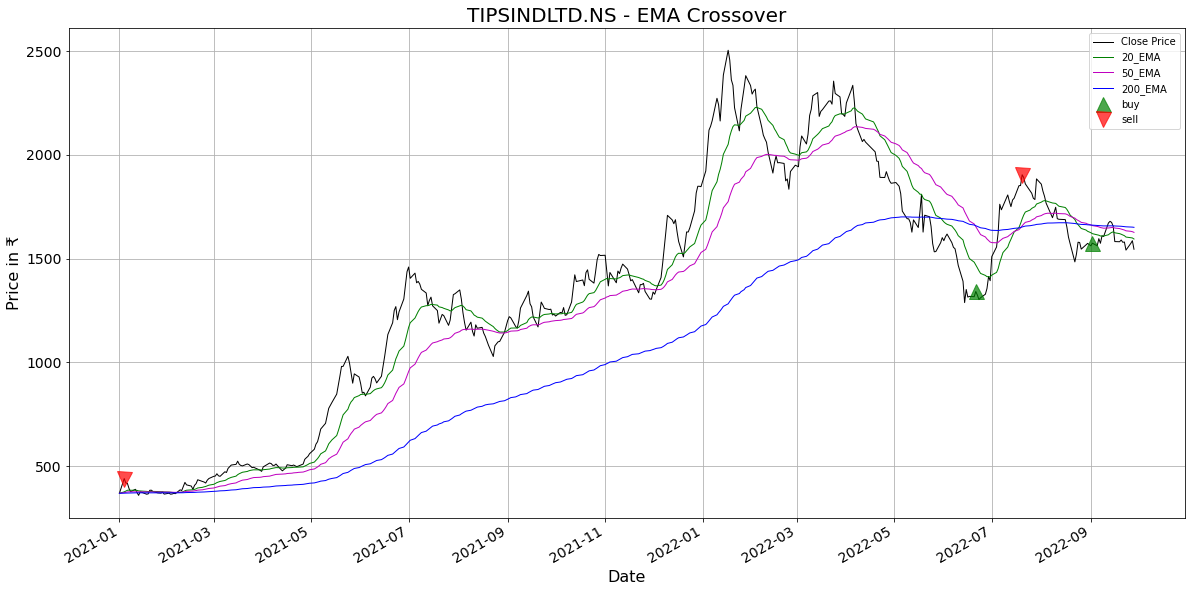

TIPSINDLTD.NS
+---------------------+---------------+----------+----------+-----------+----------+------------+
| Date                |   Close Price |   20_EMA |   50_EMA |   200_EMA |   Signal | Position   |
|---------------------+---------------+----------+----------+-----------+----------+------------|
| 2021-01-04 00:00:00 |         439.8 |  375.652 |   371.68 |   369.605 |       -1 | Sell       |
| 2022-06-21 00:00:00 |        1341.4 | 1468.93  |  1653.84 |  1658.33  |        1 | Buy        |
| 2022-07-20 00:00:00 |        1903.8 | 1690.85  |  1657.58 |  1652.08  |       -1 | Sell       |
| 2022-09-02 00:00:00 |        1574   | 1619.74  |  1658.58 |  1660.66  |        1 | Buy        |
+---------------------+---------------+----------+----------+-----------+----------+------------+


In [9]:
table = True

for stock_id in stock_ids:
    start_date = '2021-01-01'
    plot_buy_sell(stock_id, start_date, table)

In [10]:
def get_buy_sell_signal(stock_symbol, start_date, end_date, moving_avg, short_window, mid_window,long_window):

    stock_df = web.DataReader(stock_symbol,  data_source='yahoo', start = start_date, end = end_date)['Close']
    stock_df = pd.DataFrame(stock_df) # convert Series object to dataframe 
    stock_df.columns = {'Close Price'} # assign new colun name
    stock_df.dropna(axis = 0, inplace = True) # remove any null rows 

    # column names for long and short moving average columns
    short_window_col = str(short_window) + '_' + moving_avg
    mid_window_col = str(mid_window) + '_' + moving_avg
    long_window_col = str(long_window) + '_' + moving_avg  

    if moving_avg == 'SMA':
        # Create a short simple moving average column
        stock_df[short_window_col] = stock_df['Close Price'].rolling(window = short_window, min_periods = 1).mean()
        
        stock_df[mid_window_col] = stock_df['Close Price'].rolling(window = mid_window, min_periods = 1).mean()

        # Create a long simple moving average column
        stock_df[long_window_col] = stock_df['Close Price'].rolling(window = long_window, min_periods = 1).mean()

    elif moving_avg == 'EMA':
        # Create short exponential moving average column
        stock_df[short_window_col] = stock_df['Close Price'].ewm(span = short_window, adjust = False).mean()
        
        stock_df[mid_window_col] = stock_df['Close Price'].rolling(window = mid_window, min_periods = 1).mean()

        # Create a long exponential moving average column
        stock_df[long_window_col] = stock_df['Close Price'].ewm(span = long_window, adjust = False).mean()

    # create a new column 'Signal' such that if faster moving average is greater than slower moving average 
    # then set Signal as 1 else 0.
    stock_df['Signal'] = 0.0  
    stock_df['Signal'] = np.where((stock_df[mid_window_col] < stock_df[long_window_col]), 1.0, stock_df['Signal']) 
    
    stock_df['Signal'] = np.where((stock_df[mid_window_col] > stock_df[long_window_col]), -1.0, stock_df['Signal']) 

    # create a new column 'Position' which is a day-to-day difference of the 'Signal' column. 
    stock_df['Position'] = stock_df['Signal'].diff()
    
    df_pos = stock_df[(stock_df['Position'] >= 1) | (stock_df['Position'] <= -1)]
    df_pos['Position'] = df_pos['Position'].apply(lambda x: 'Buy' if x >= 1 else 'Sell')
    df_pos = df_pos[df_pos['Signal'] != 0]
    df_pos['Prev_Signal'] = df_pos['Signal'].shift(1)
    df_pos = df_pos[df_pos['Signal'] != df_pos['Prev_Signal']]
    df_pos.drop('Prev_Signal', axis=1, inplace=True)
        
    df_pos['Stock'] = stock_symbol
    return df_pos.tail(1)

In [11]:
start_date = '2021-01-01'
end_date = (datetime.date.today() + datetime.timedelta(days=1)).strftime('%Y-%m-%d')
moving_avg = 'EMA'
short_window = 20
mid_window = 50
long_window = 200

df_buy_sell = pd.DataFrame()

for stock_id in stock_ids:
    #stock_id = stock_id.upper() + '.NS'
    tmp = get_buy_sell_signal(stock_id, start_date, end_date, moving_avg, short_window, mid_window, long_window)
    df_buy_sell = df_buy_sell.append(tmp)
    
df_buy_sell.sort_index()

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

Close Price       20_EMA       50_EMA      200_EMA  Signal  \
Date                                                                     
2021-01-04    79.250000    77.530951    78.299999    77.368904    -1.0   
2021-02-03   629.200012   595.423193   597.510875   596.436767    -1.0   
2021-04-23   935.599976   879.775182   830.526000   830.104086    -1.0   
2021-06-15  2250.000000  2140.410117  2019.886001  2017.475229    -1.0   
2021-09-03  4898.549805  4745.727790  5026.732979  5033.117023     1.0   
...                 ...          ...          ...          ...     ...   
2022-09-09   784.849976   751.504667   718.687000   718.183050    -1.0   
2022-09-13  1923.400024  1894.423734  1830.210999  1828.453967    -1.0   
2022-09-15  1520.699951  1488.028187  1441.426008  1440.016670    -1.0   
2022-09-21   873.150024   831.962788   812.883003   812.566600    -1.0   
2022-09-23  6139.950195  6526.537493  6492.872979  6490.361739    -1.0   

           Position          Stock  
Date                                
2021-01-04     Sell   TATAPOWER.NS  
2021-02-03     Sell   SUNPHARMA.NS  
2021-04-23     Sell       CIPLA.NS  
2021-06-15     Sell    RELIANCE.NS  
2021-09-03      Buy     DRREDDY.NS  
...             ...            ...  
2022-09-09     Sell    AXISBANK.NS  
2022-09-13     Sell   KOTAKBANK.NS  
2022-09-15     Sell    HDFCBANK.NS  
2022-09-21     Sell  MCDOWELL-N.NS  
2022-09-23     Sell  ULTRACEMCO.NS  

[61 rows x 7 columns]

[*********************100%***********************]  1 of 1 completed


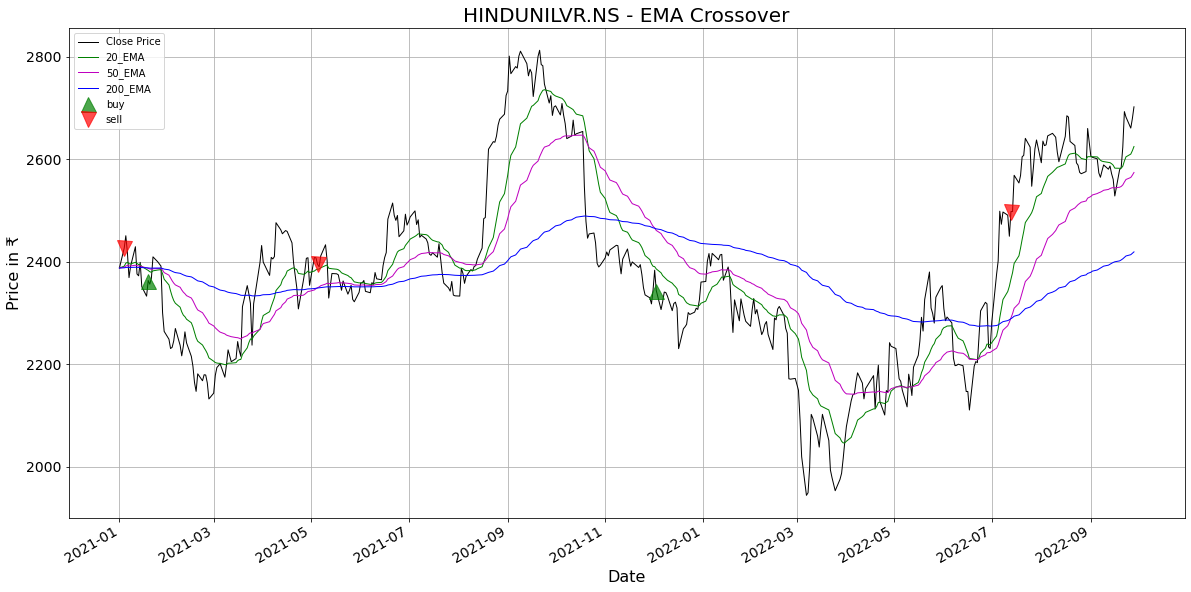

HINDUNILVR.NS
+---------------------+---------------+----------+----------+-----------+----------+------------+
| Date                |   Close Price |   20_EMA |   50_EMA |   200_EMA |   Signal | Position   |
|---------------------+---------------+----------+----------+-----------+----------+------------|
| 2021-01-04 00:00:00 |       2426.5  |  2391.26 |  2389.08 |   2387.94 |       -1 | Sell       |
| 2021-01-19 00:00:00 |       2363.15 |  2382.92 |  2387.02 |   2387.7  |        1 | Buy        |
| 2021-05-05 00:00:00 |       2394.65 |  2385.12 |  2349.06 |   2348.54 |       -1 | Sell       |
| 2021-12-03 00:00:00 |       2343.65 |  2385.79 |  2460.86 |   2463.97 |        1 | Buy        |
| 2022-07-13 00:00:00 |       2497.75 |  2365.82 |  2290.32 |   2288.69 |       -1 | Sell       |
+---------------------+---------------+----------+----------+-----------+----------+------------+


In [12]:
plot_buy_sell('HINDUNILVR.NS', '2021-01-01', True)